In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import   seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [270]:
df_Rose=pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')

In [271]:
df_Rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [272]:
df_Rose1.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [273]:
df_Rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [274]:
df_Sparkling=pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')

In [275]:
df_Sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [276]:
df_Sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [277]:
df_Rose.isnull().sum()

Rose    2
dtype: int64

In [278]:
df_Sparkling.isnull().sum()

Sparkling    0
dtype: int64

In [279]:
df_Rose.isna().sum()

Rose    2
dtype: int64

In [280]:
df_Sparkling.isna().sum()

Sparkling    0
dtype: int64

In [281]:
df_Rose.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [282]:
df_Sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [283]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,12

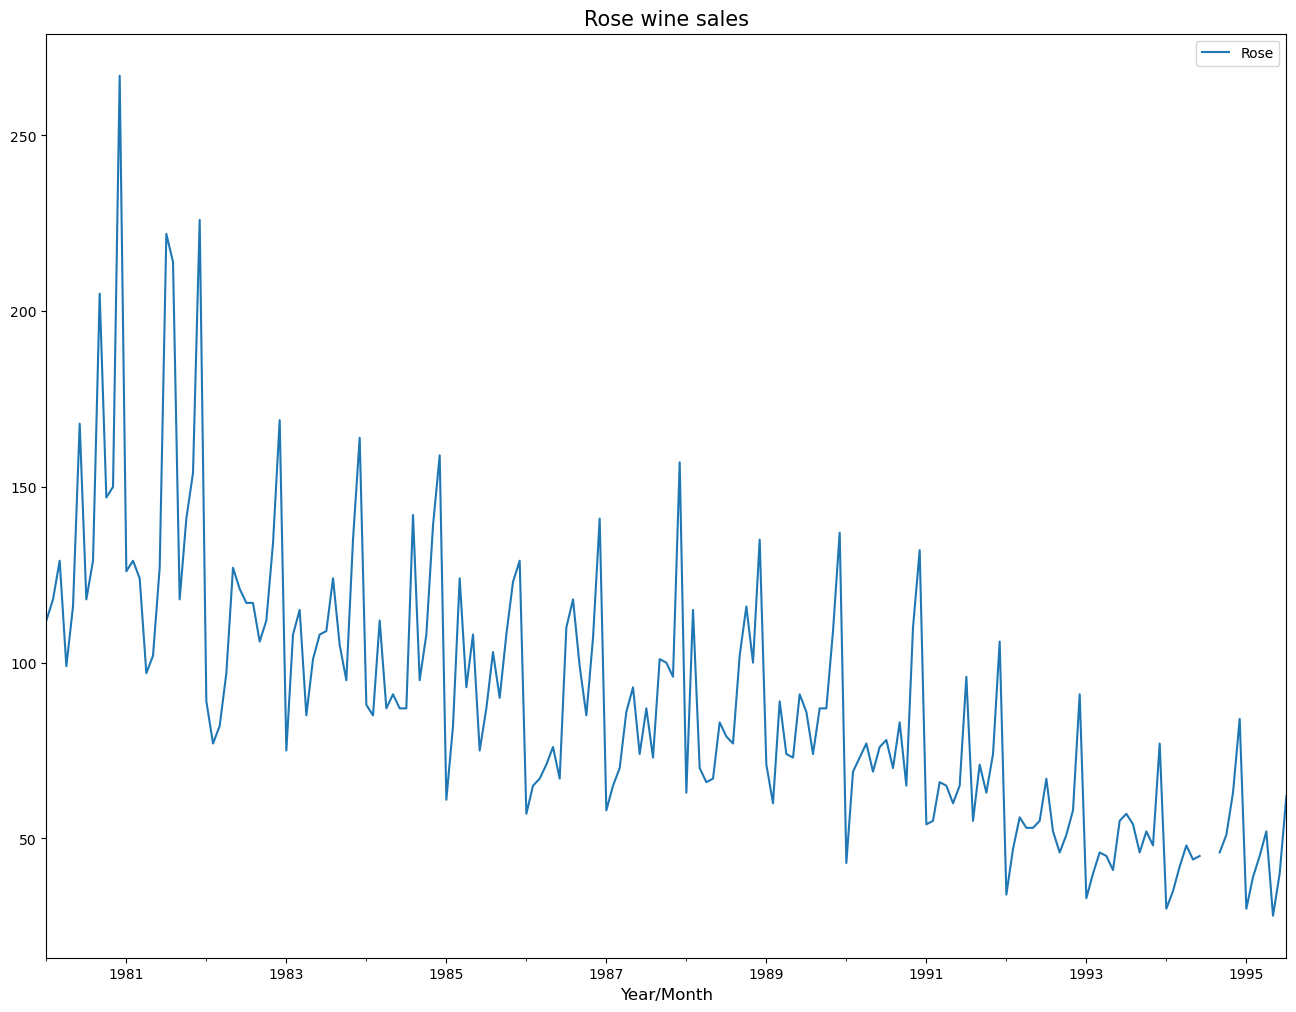

In [284]:
df_Rose.plot()
plt.title('Rose wine sales',fontsize=15)
plt.xlabel('Year/Month',fontsize=12);


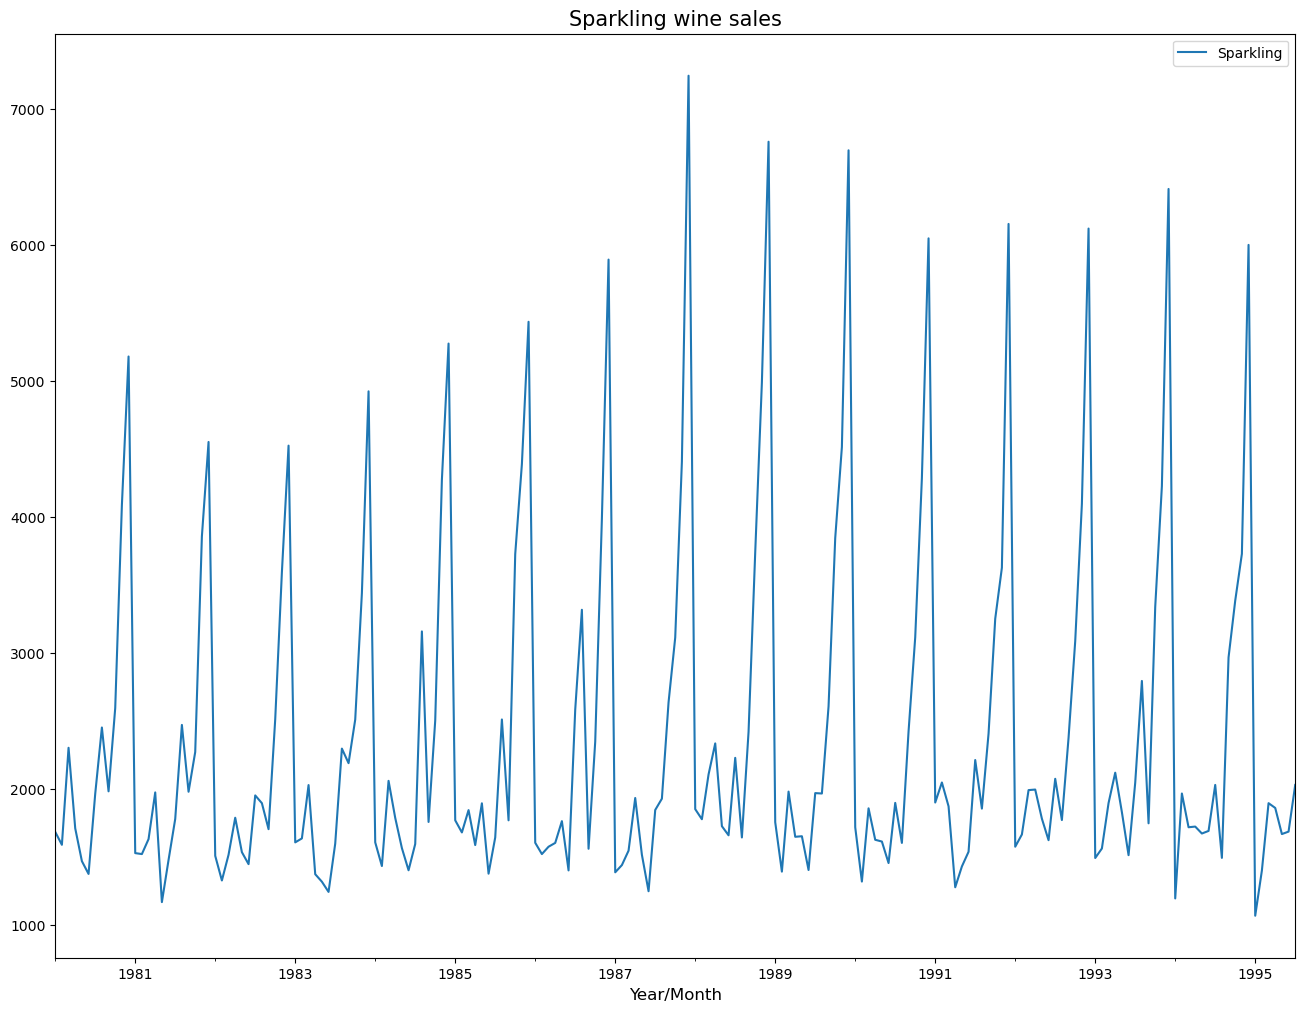

In [285]:
df_Sparkling.plot()
plt.title('Sparkling wine sales',fontsize=15)
plt.xlabel('Year/Month',fontsize=12);

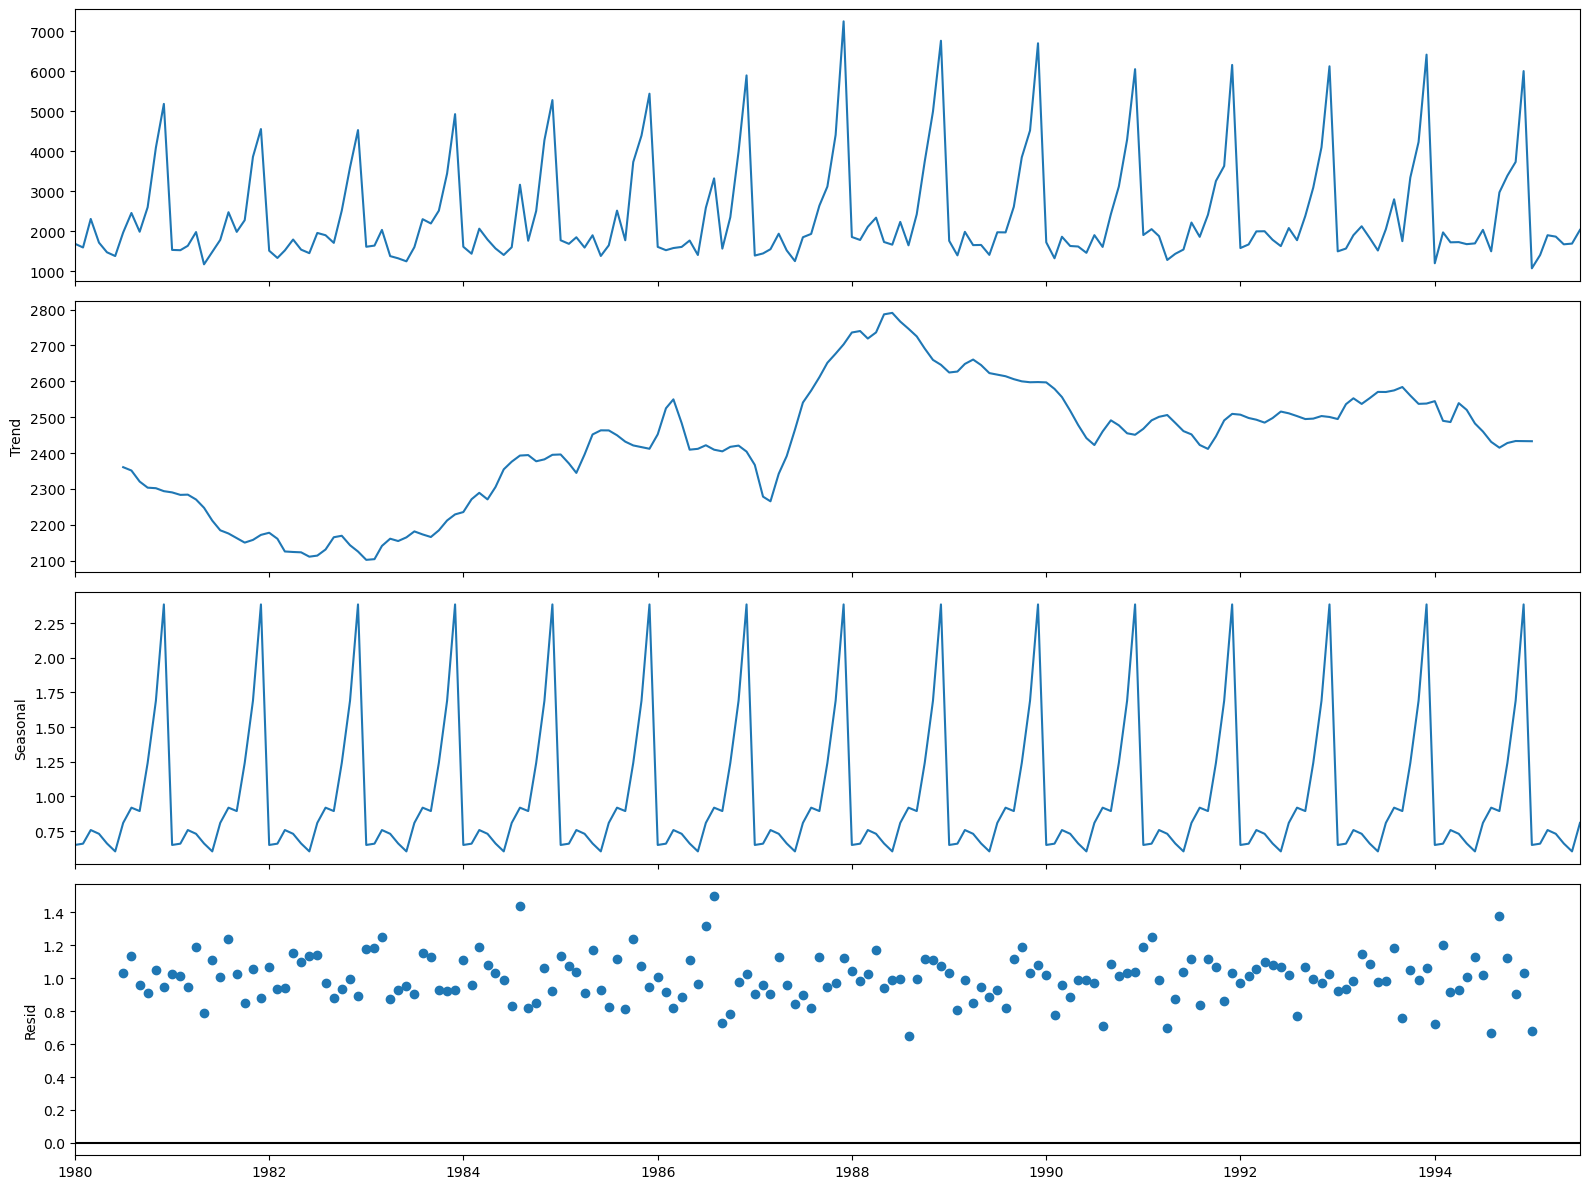

In [286]:
decomposition1 = seasonal_decompose(df_Sparkling,model='multiplicative')
decomposition1.plot();

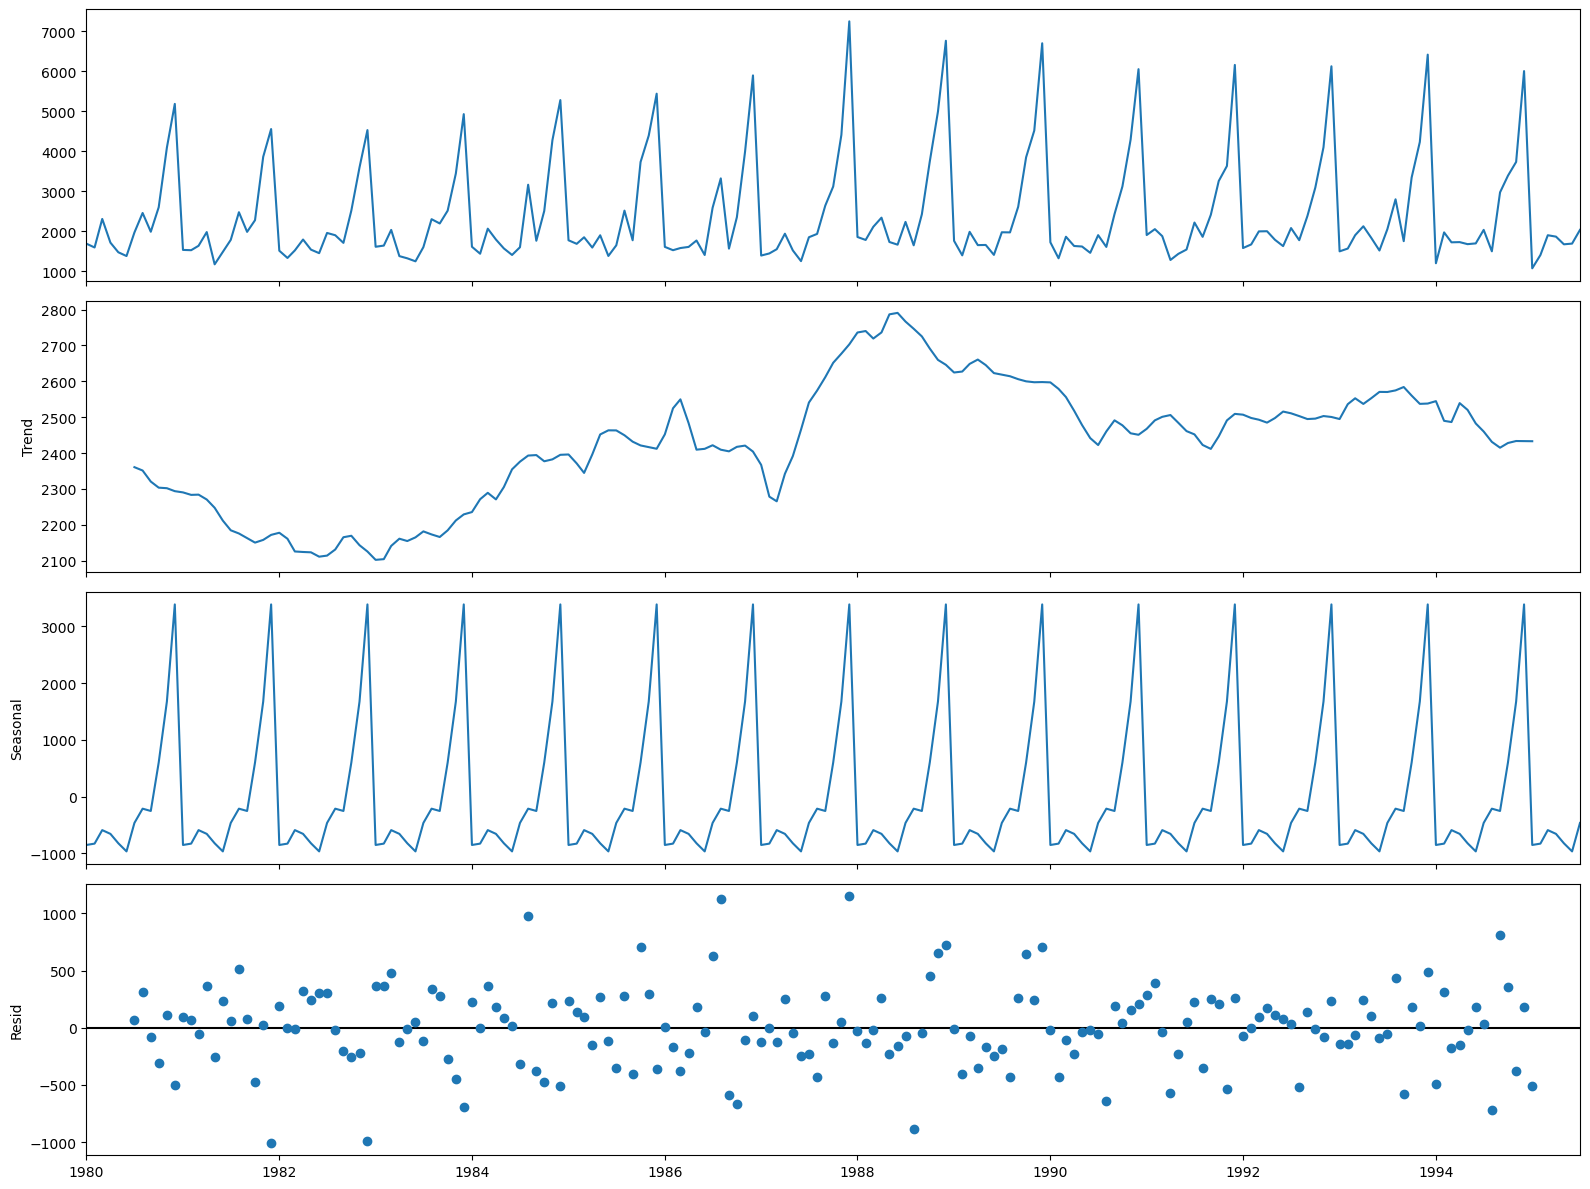

In [287]:
decomposition1 = seasonal_decompose(df_Sparkling,model='additive')
decomposition1.plot();

In [288]:
df_Rose = df_Rose.interpolate(method = 'polynomial', order =3)

## After treating the missing values

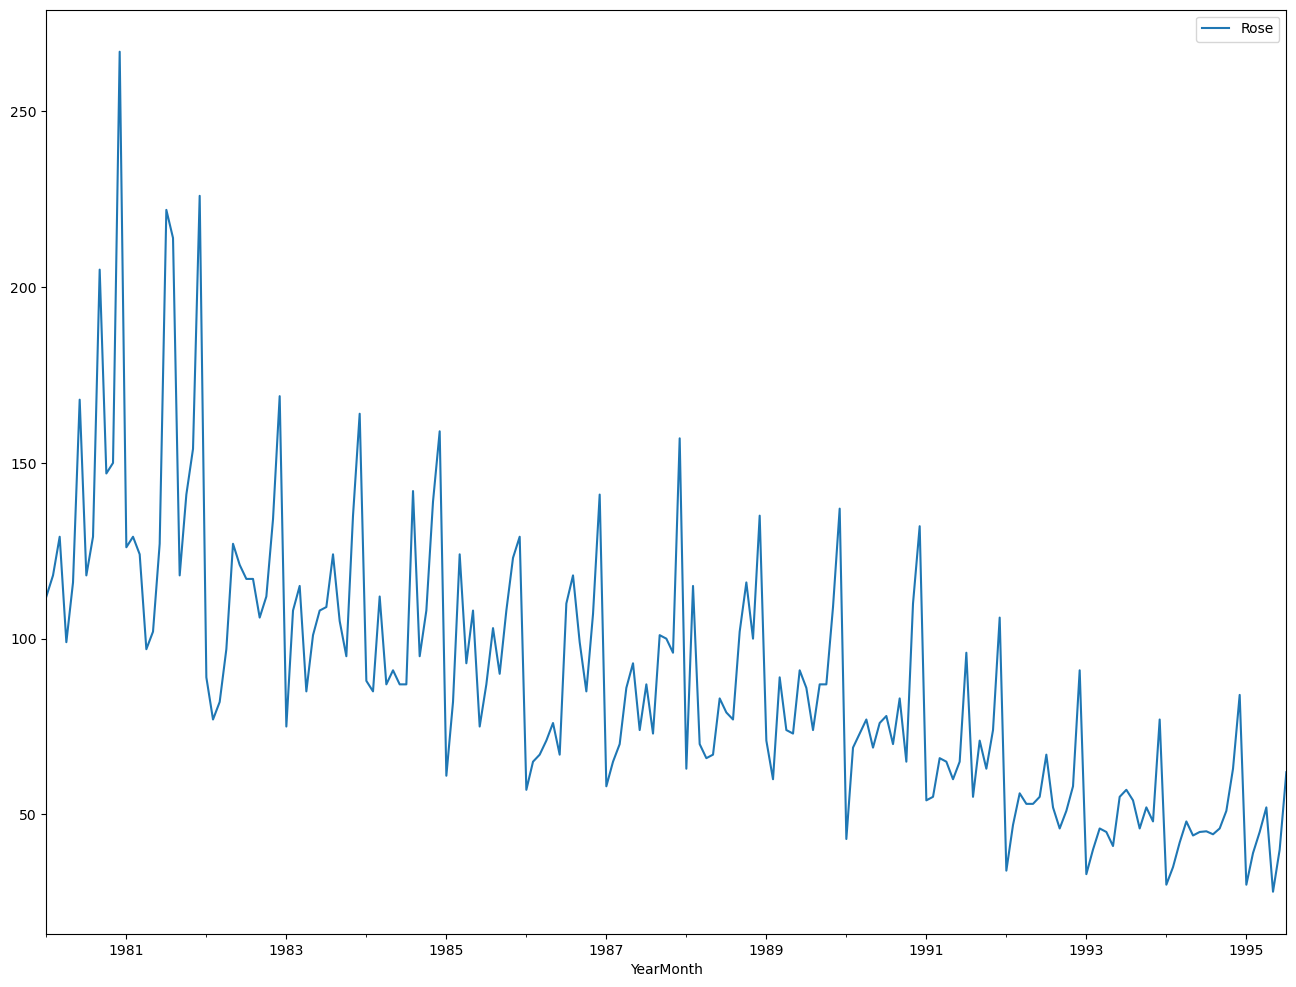

In [289]:
df_Rose.plot();


In [290]:
df_Rose.isnull().sum()

Rose    0
dtype: int64

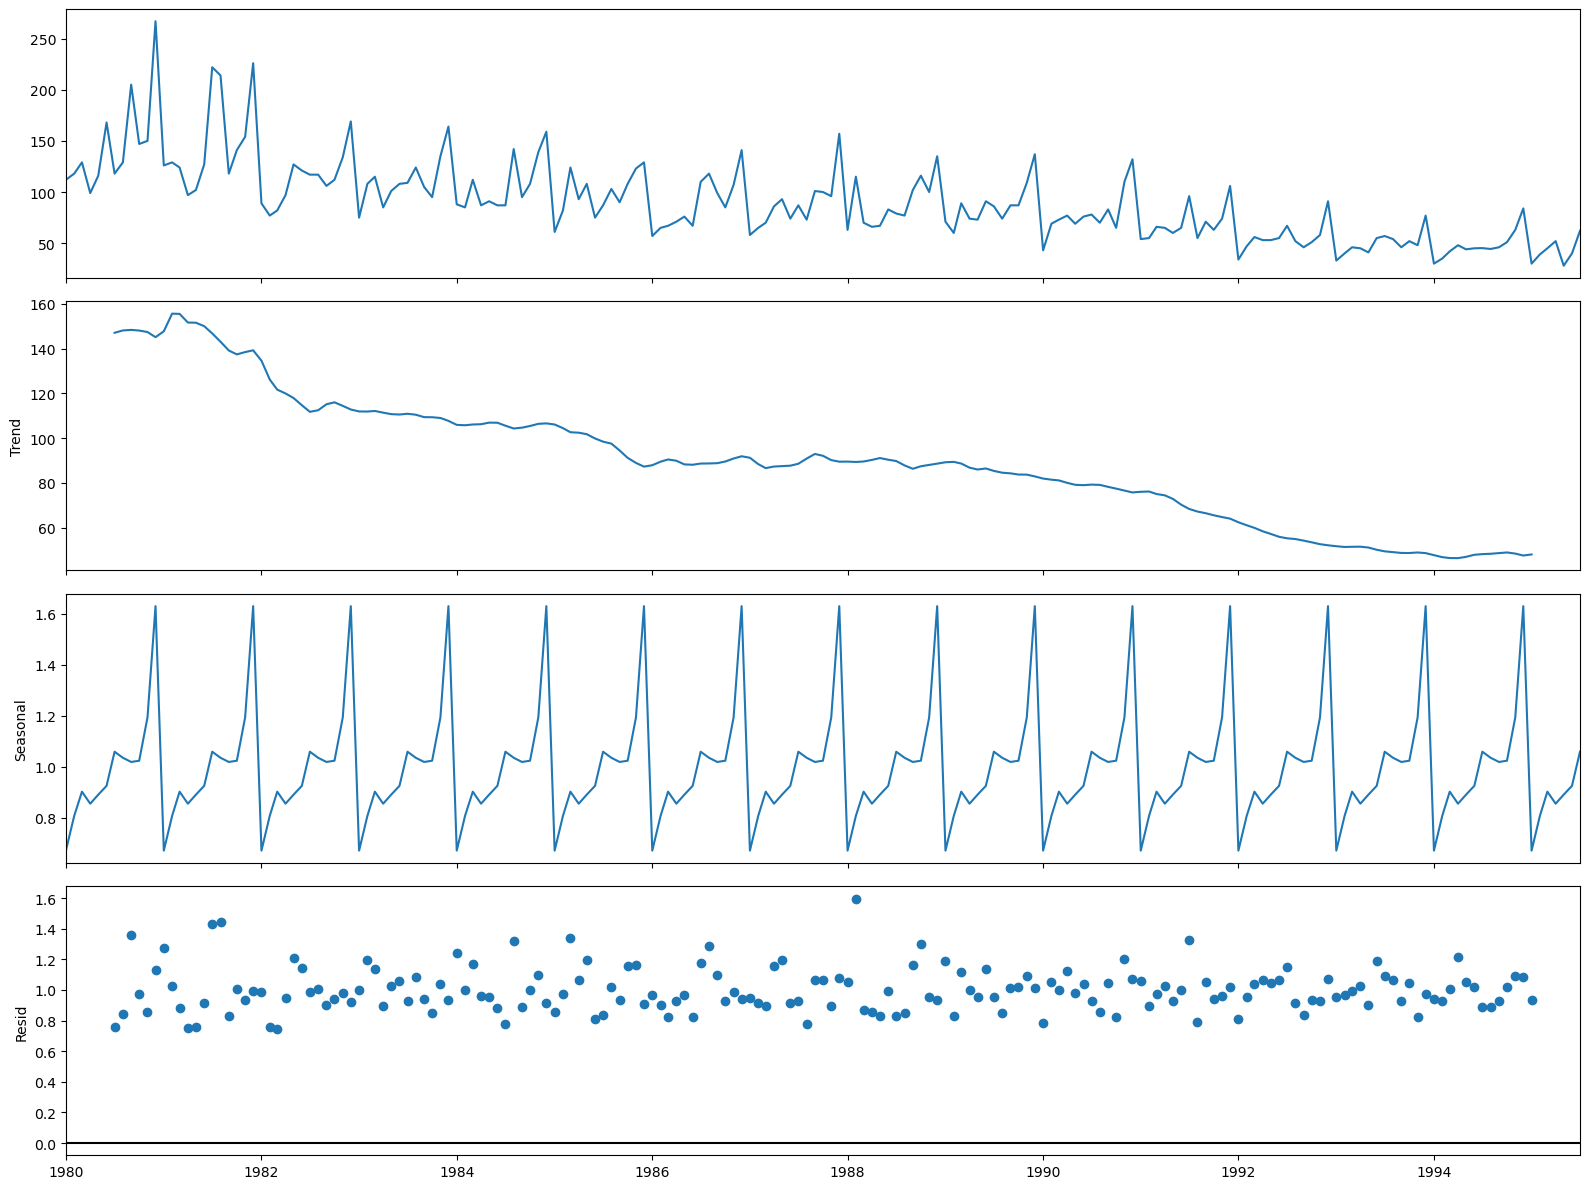

In [291]:
decomposition2 = seasonal_decompose(df_Rose,model='multiplicative')
decomposition2.plot();

## While using Multiplicative seasonality ,the errors are less 

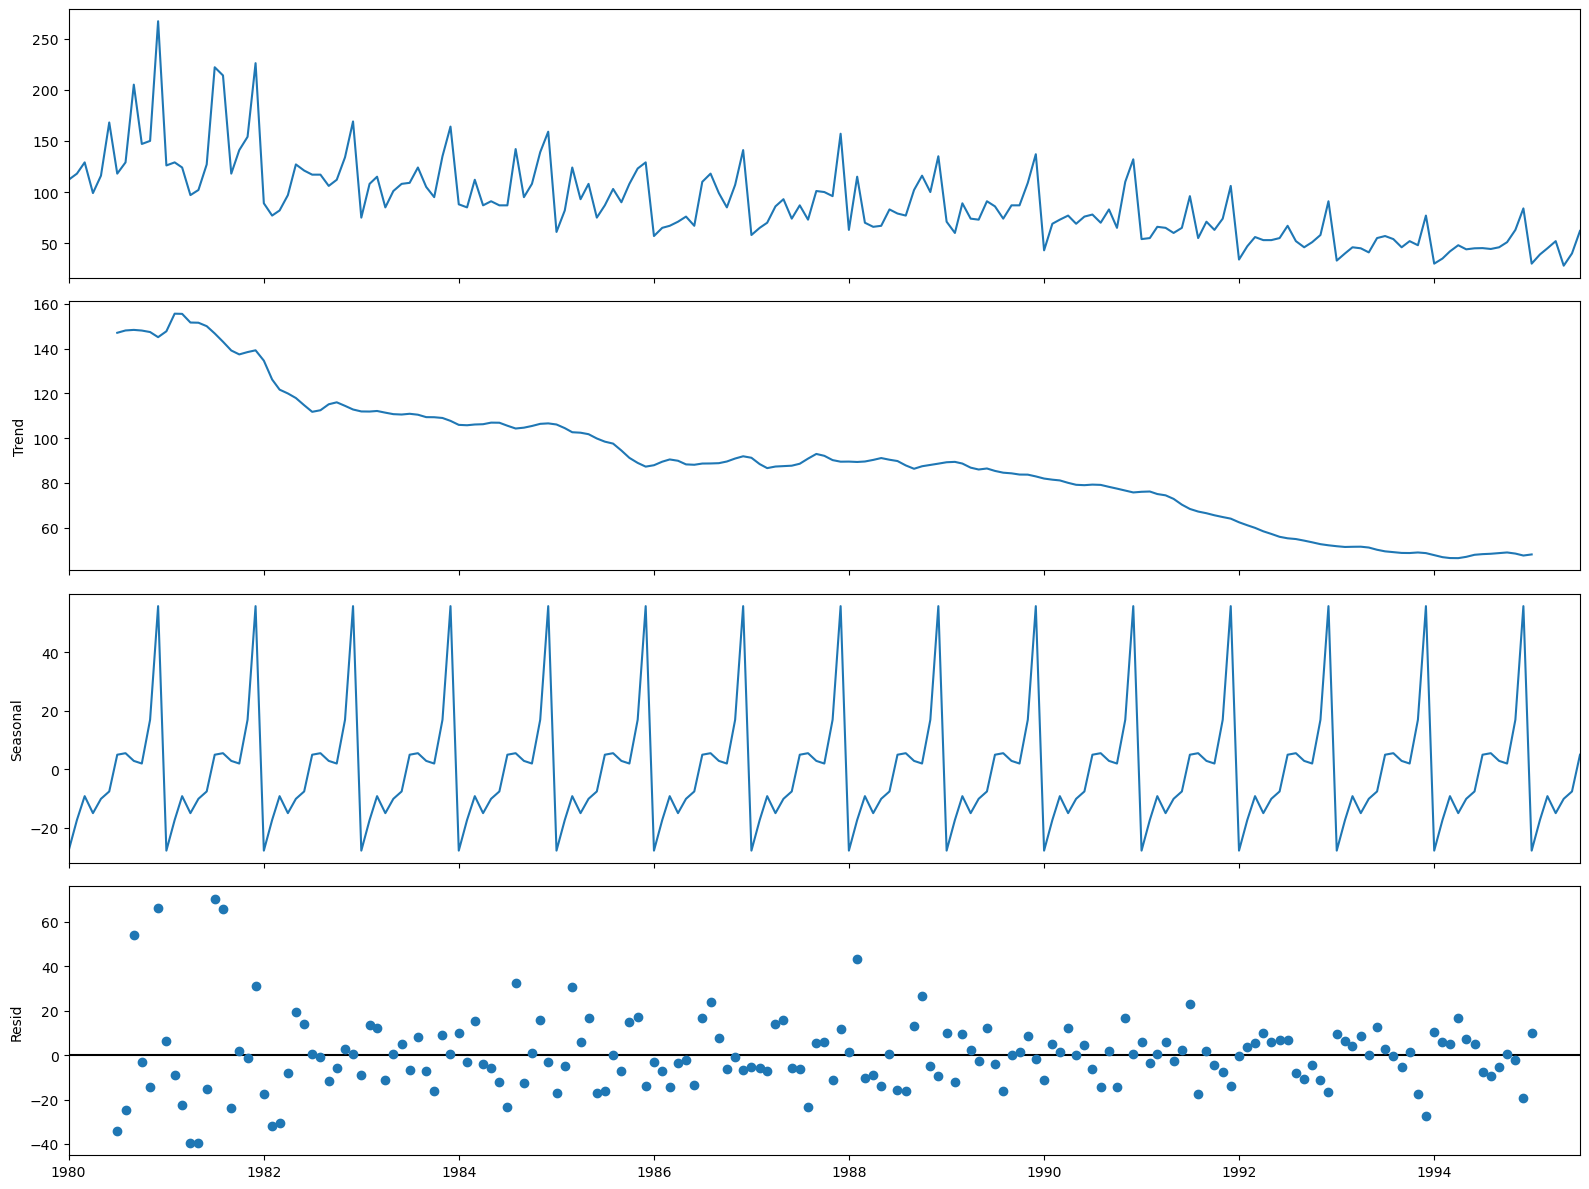

In [292]:
decomposition2 = seasonal_decompose(df_Rose,model='additive')
decomposition2.plot();

## EDA

### Rose Wine

In [293]:
df_Rose.describe()

Rose
count  187.000000
mean    89.906608
std     39.247329
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [294]:
df_Rose1=df_Rose.copy()

In [295]:
df_Rose['month'] = df_Rose.index.month

In [296]:
import calendar

In [297]:
df_Rose['month'] = df_Rose['month'].apply(lambda x: calendar.month_abbr[x]) 

In [298]:
df_Rose.head()

Rose month
YearMonth              
1980-01-01  112.0   Jan
1980-02-01  118.0   Feb
1980-03-01  129.0   Mar
1980-04-01   99.0   Apr
1980-05-01  116.0   May

In [299]:
df_Rose['year'] = df_Rose.index.year

In [300]:
month_order = df_Rose.groupby('month')['Rose'].median().sort_values(ascending=False).index


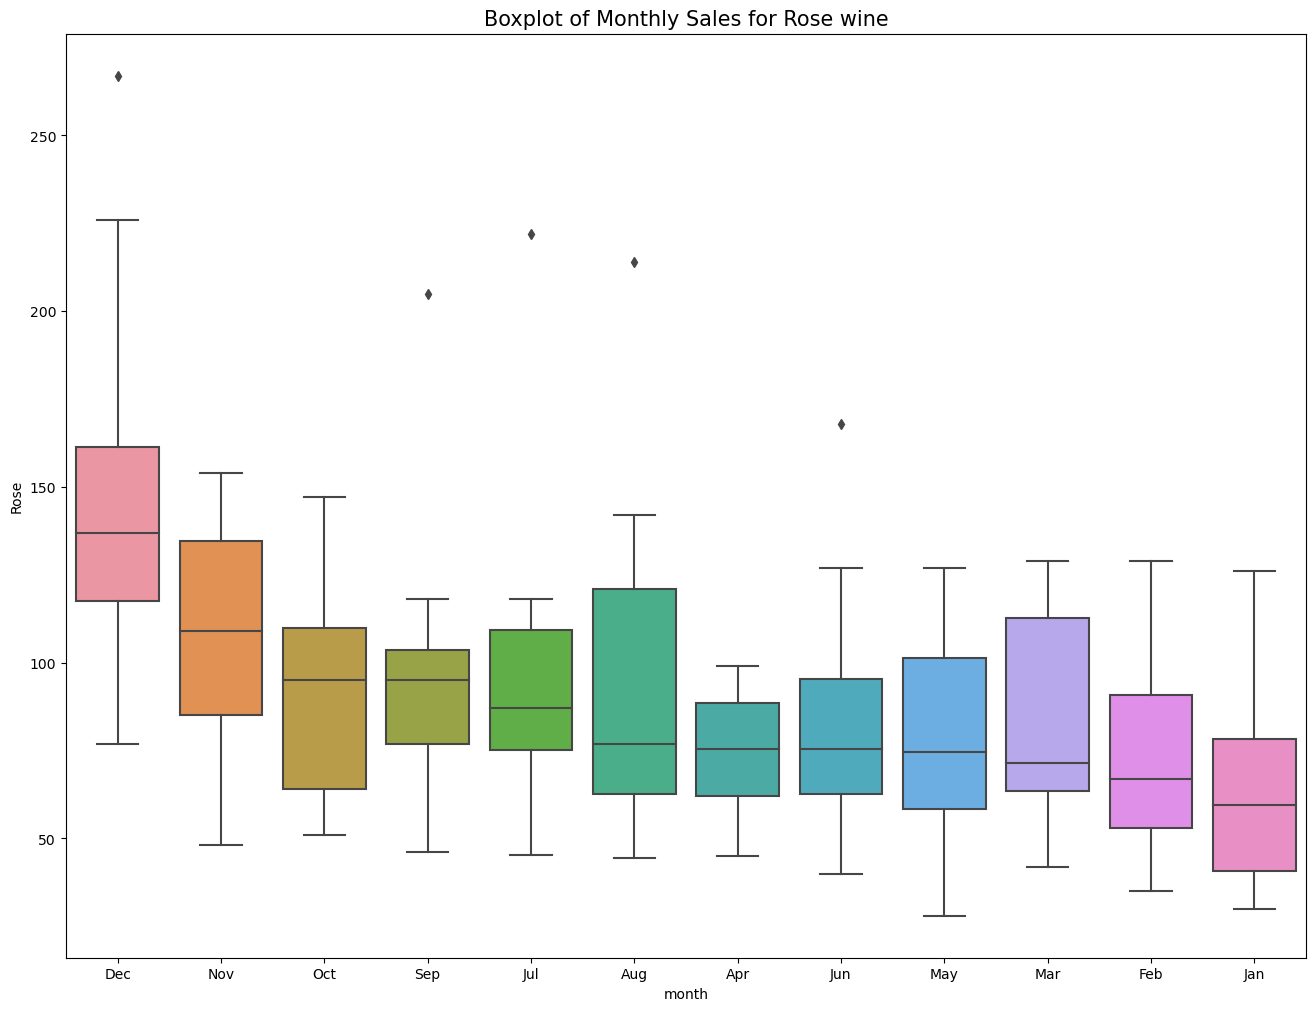

In [301]:
sns.boxplot(x =df_Rose['month'],y=df_Rose['Rose'],order=month_order)
plt.title('Boxplot of Monthly Sales for Rose wine',fontsize=15);

In [302]:
year_order=df_Rose.groupby('year')['Rose'].median().sort_values(ascending=False).index

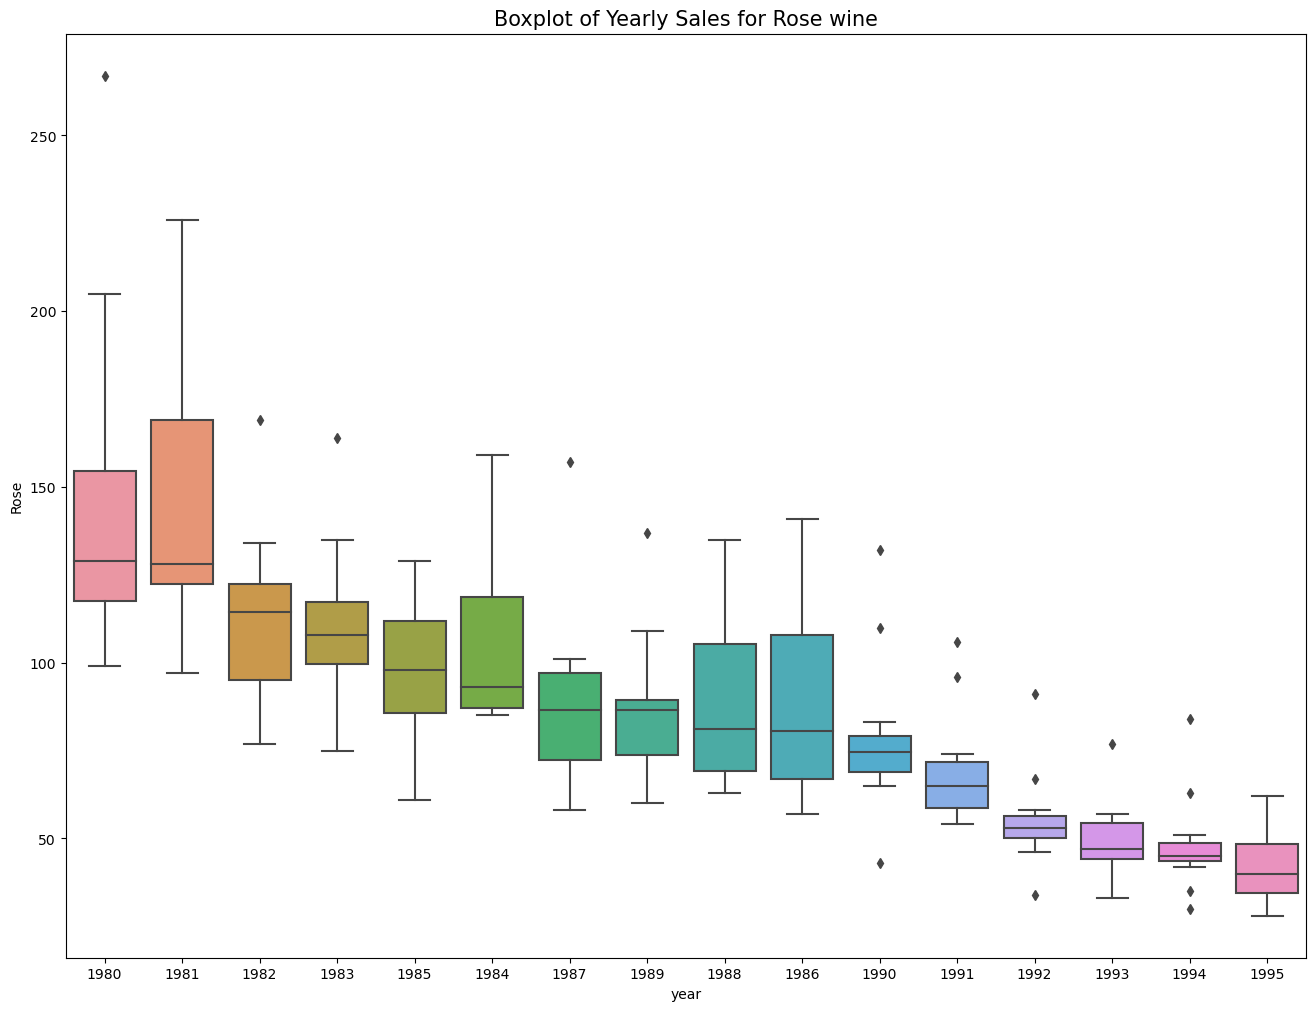

In [303]:
sns.boxplot(x =df_Rose['year'],y=df_Rose['Rose'],order=year_order)
plt.title('Boxplot of Yearly Sales for Rose wine',fontsize=15);

In [304]:
pivot1=pd.pivot_table(df_Rose,values = "Rose", columns = "year", index = "month")
pivot1 = pivot1.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pivot1

year    1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
month                                                                         
Jan    112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   71.0   
Feb    118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   60.0   
Mar    129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   89.0   
Apr     99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   74.0   
May    116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   73.0   
Jun    168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   91.0   
Jul    118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   86.0   
Aug    129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   74.0   
Sep    205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   87.0   
Oct    147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   87.0   
Nov    150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0  109.0   
Dec    267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0  137.0   

year    1990   1991  1992  1993       1994  1995  
month                                             
Jan     43.0   54.0  34.0  33.0  30.000000  30.0  
Feb     69.0   55.0  47.0  40.0  35.000000  39.0  
Mar     73.0   66.0  56.0  46.0  42.000000  45.0  
Apr     77.0   65.0  53.0  45.0  48.000000  52.0  
May     69.0   60.0  53.0  41.0  44.000000  28.0  
Jun     76.0   65.0  55.0  55.0  45.000000  40.0  
Jul     78.0   96.0  67.0  57.0  45.191702  62.0  
Aug     70.0   55.0  52.0  54.0  44.343965   NaN  
Sep     83.0   71.0  46.0  46.0  46.000000   NaN  
Oct     65.0   63.0  51.0  52.0  51.000000   NaN  
Nov    110.0   74.0  58.0  48.0  63.000000   NaN  
Dec    132.0  106.0  91.0  77.0  84.000000   NaN

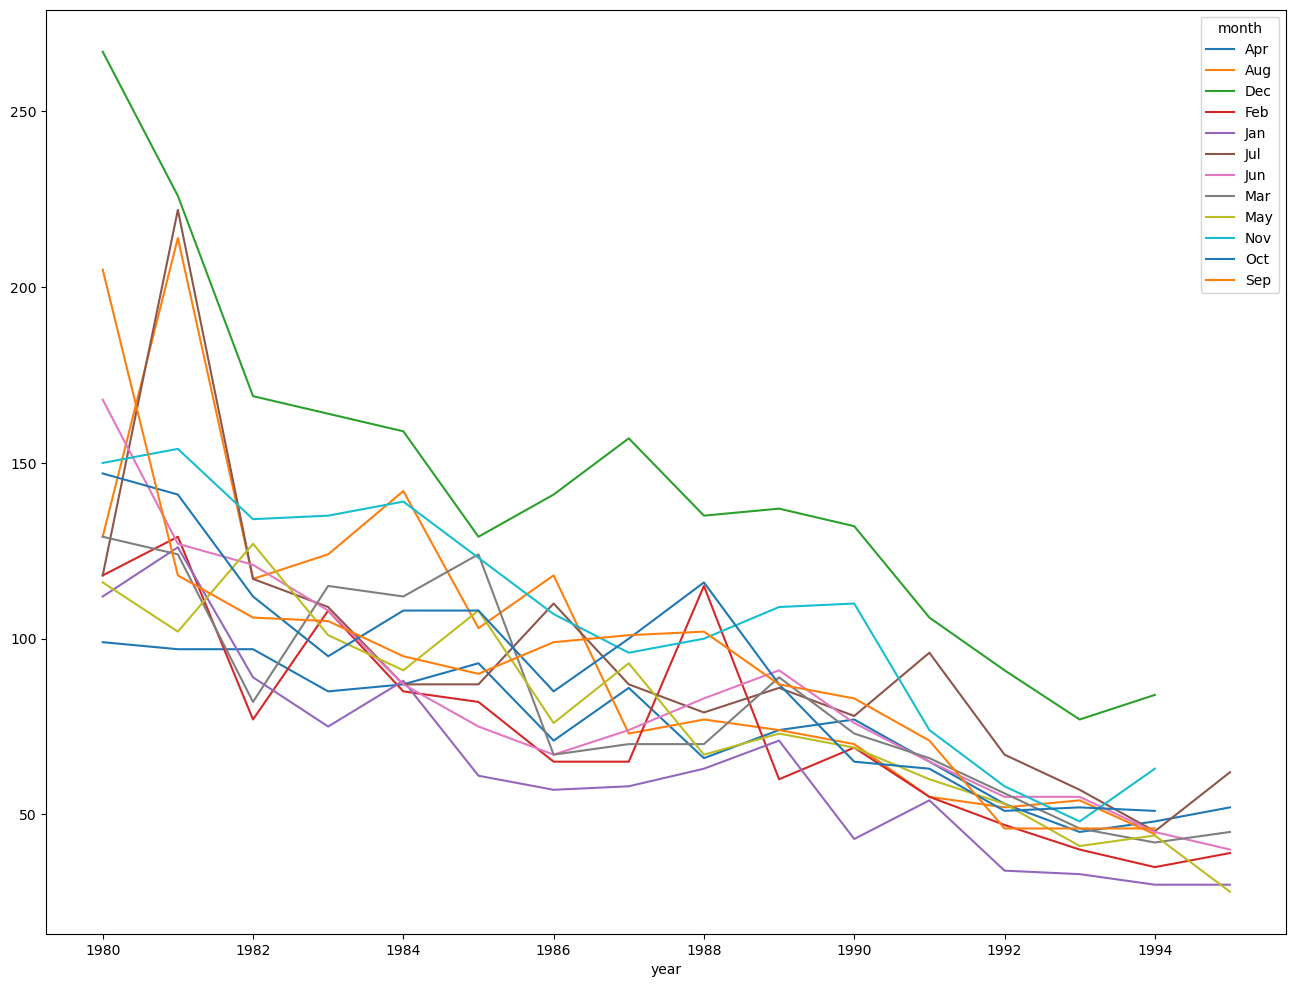

In [305]:
pivot2=pd.pivot_table(df_Rose,values = "Rose", columns = "month", index = "year")
pivot2.plot();

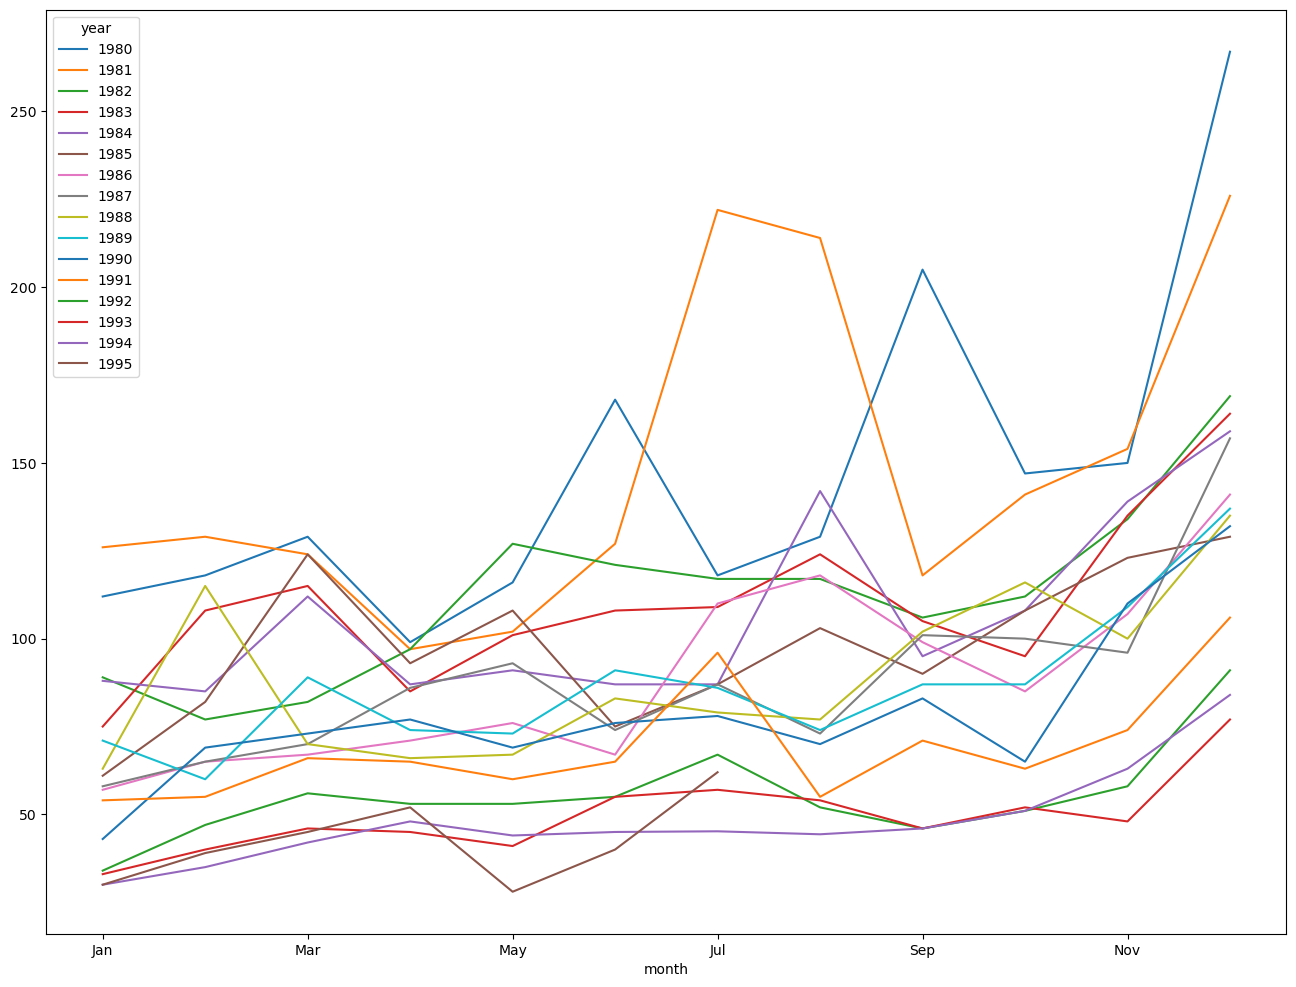

In [306]:
pivot1.plot();

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


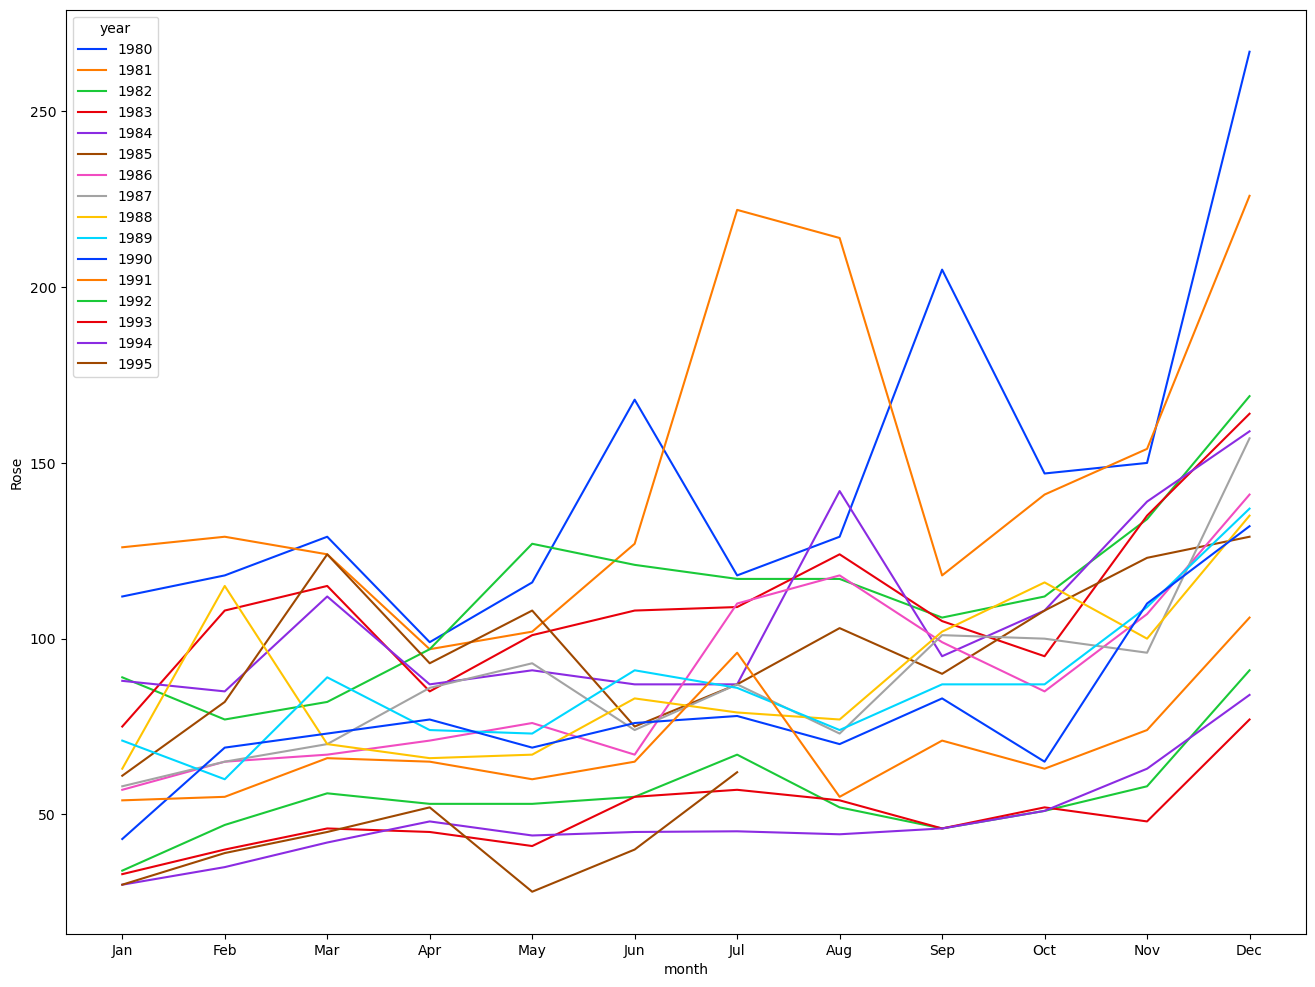

In [307]:
sns.lineplot(data=df_Rose,x='month',y='Rose',hue='year',palette="bright");

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


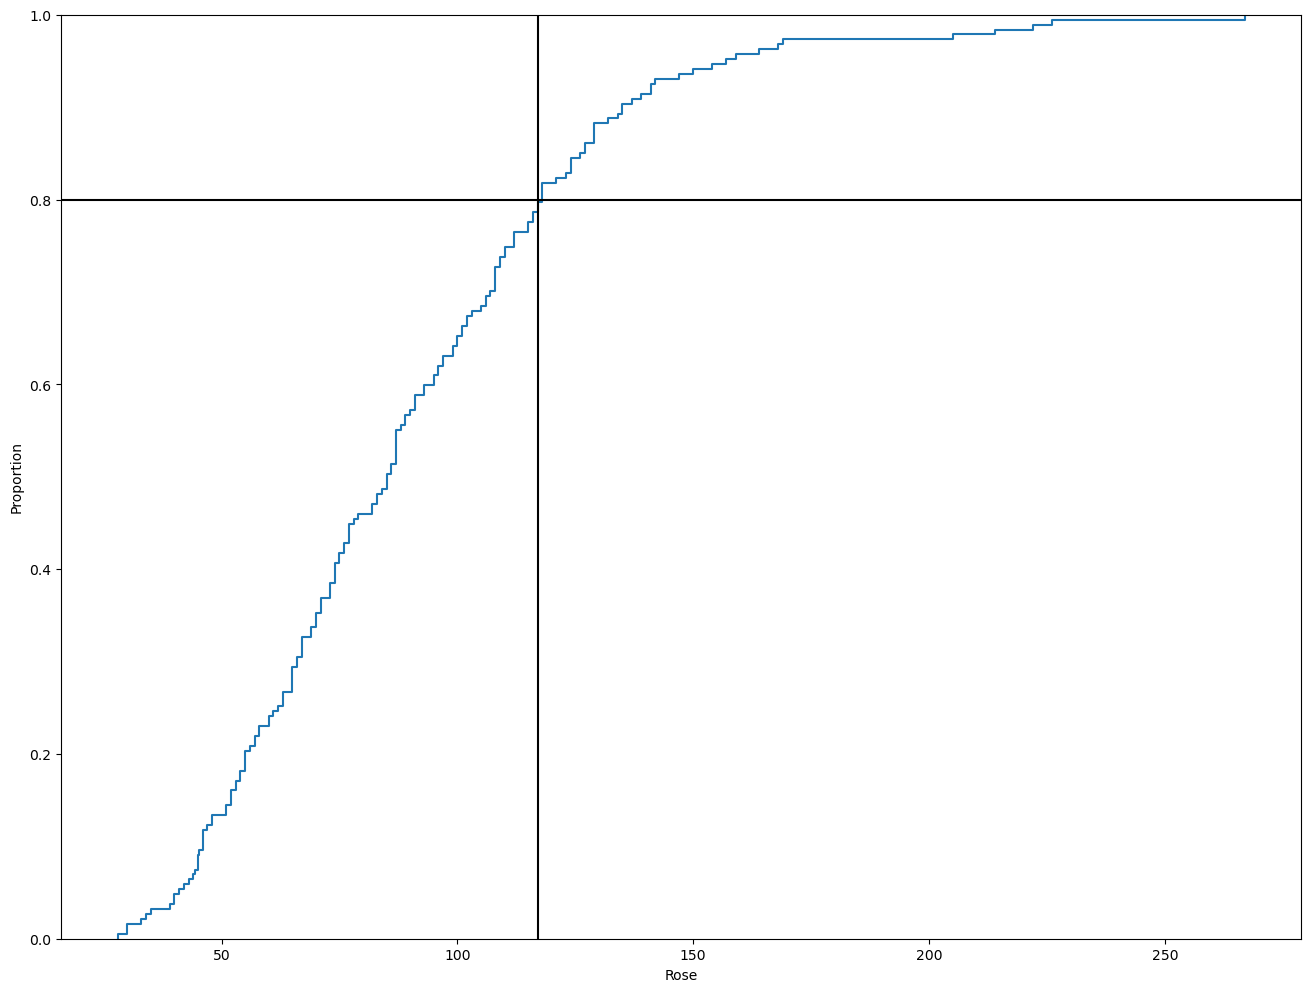

In [308]:
sns.ecdfplot(data=df_Rose,x='Rose')
plt.axhline(0.8,c='black')
plt.axvline(117,c='black');

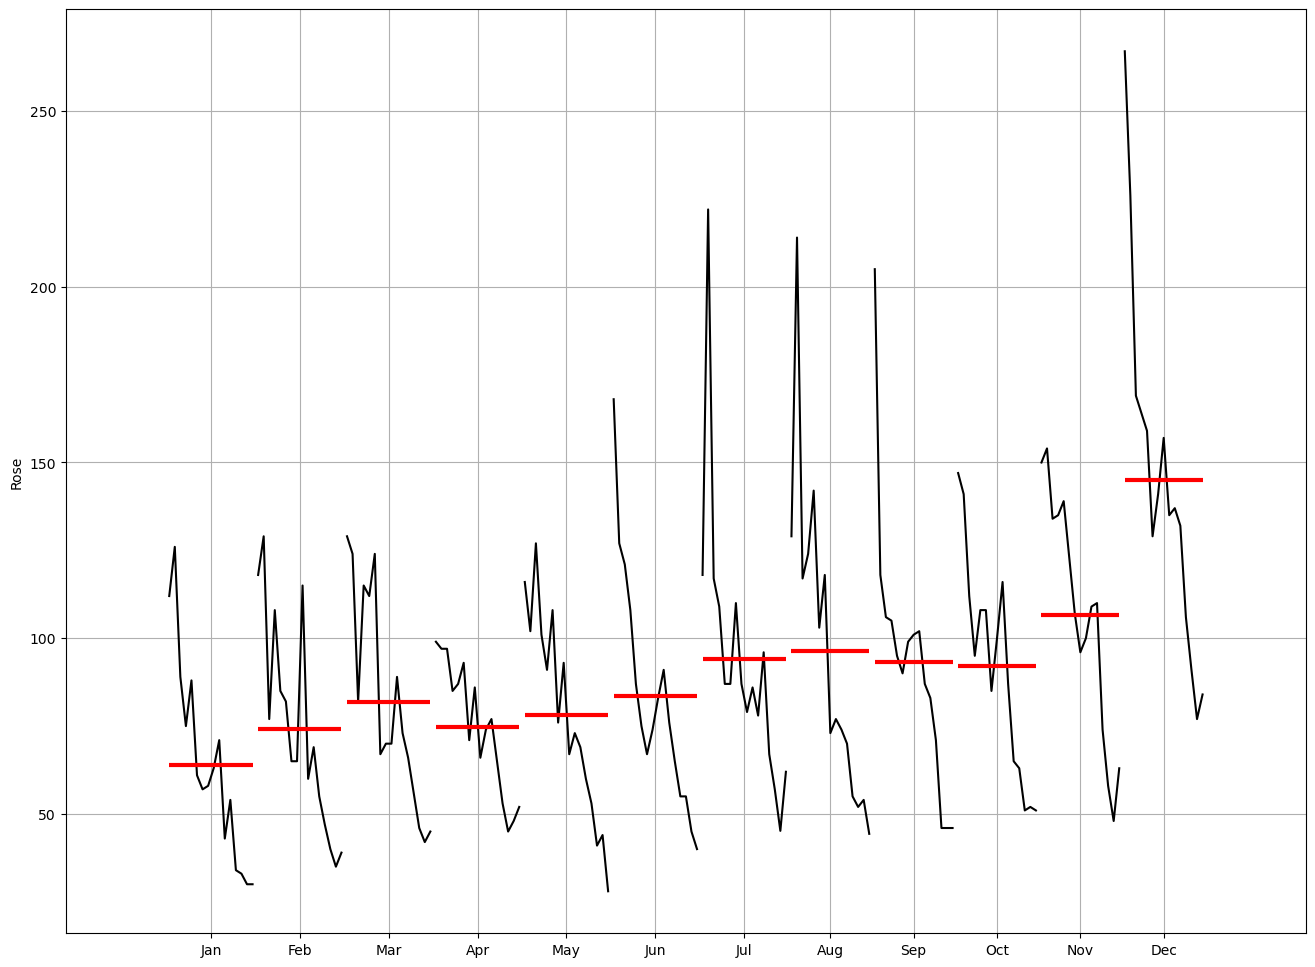

In [309]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_Rose['Rose'],ylabel='Rose')
plt.grid();

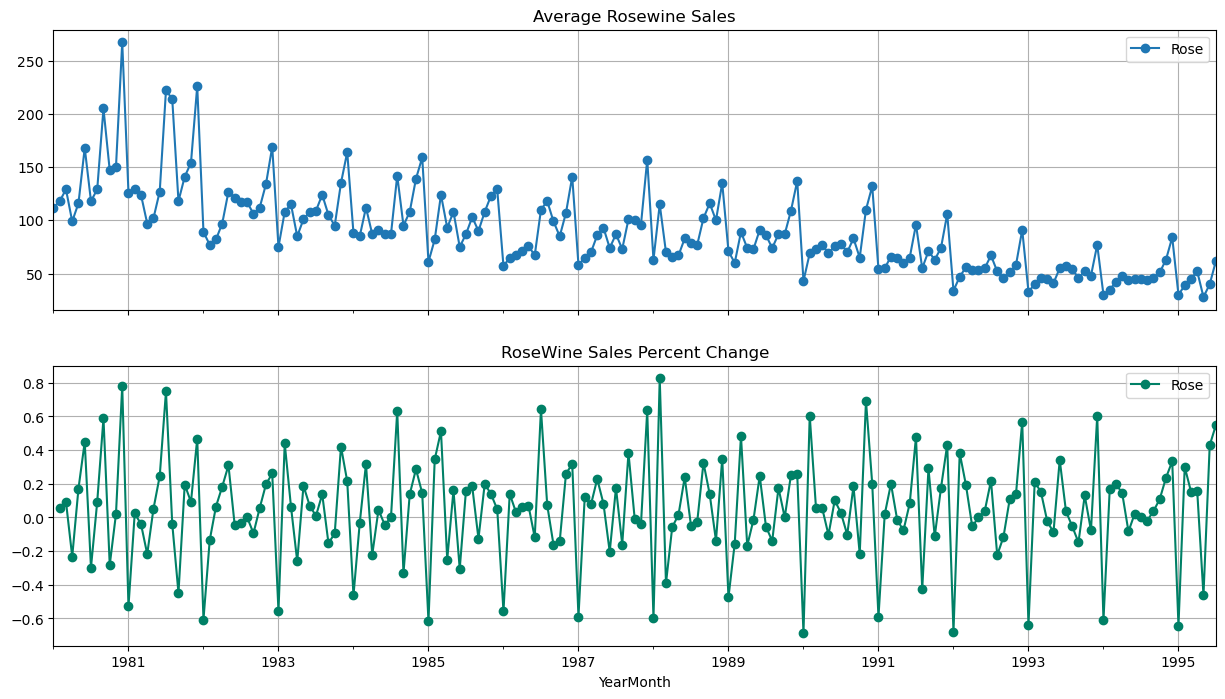

In [310]:
Average    = df_Rose.groupby(df_Rose.index)["Rose"].mean()
pct_change = df_Rose.groupby(df_Rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = Average.plot(legend=True,ax=axis1,marker='o',title="Average Rosewine Sales",grid=True)
ax1.set_xticks(range(len(Average)))
ax1.set_xticklabels(Average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RoseWine Sales Percent Change",grid=True)

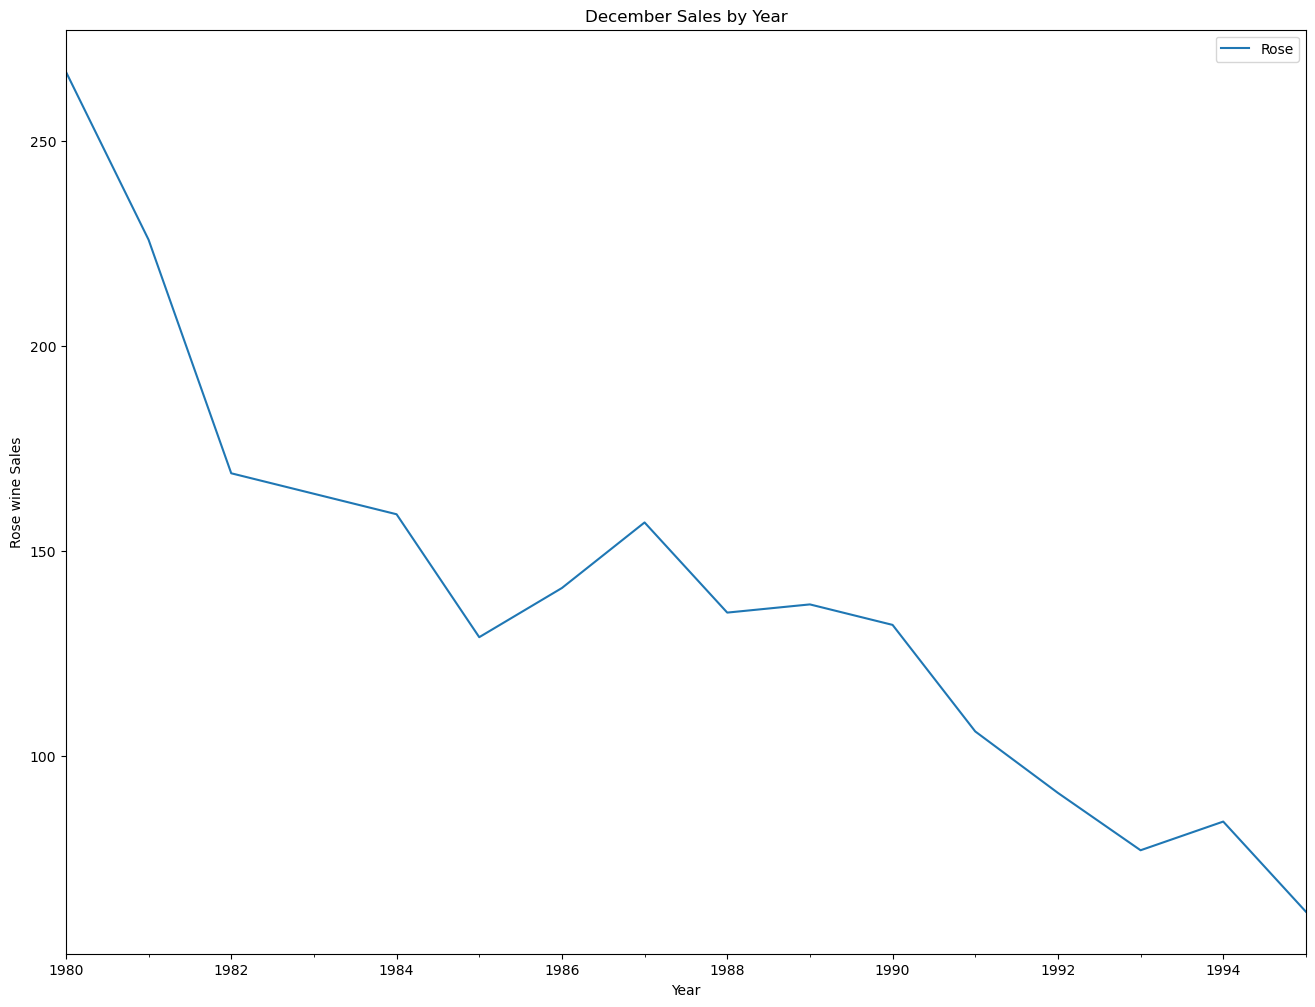

In [311]:
df_Rose1.resample(rule='A').max().plot()
plt.title('December Sales by Year')
plt.xlabel('Year',fontsize=10)
plt.ylabel('Rose wine Sales',fontsize=10);

### From the box plot, we observed that December had the highest sales every year. However, if we break it down further, we see that the sales for this most profitable month have been decreasing each year.

## Sparkling wine

In [312]:
df_Sparkling1=df_Sparkling.copy()

In [313]:
df_Sparkling1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [314]:
df_Sparkling['Month']=df_Sparkling.index.month
df_Sparkling['Month'] = df_Sparkling['Month'].apply(lambda x: calendar.month_abbr[x])
df_Sparkling['Year']=df_Sparkling.index.year

In [315]:
df_Sparkling.head()

Sparkling Month  Year
YearMonth                        
1980-01-01       1686   Jan  1980
1980-02-01       1591   Feb  1980
1980-03-01       2304   Mar  1980
1980-04-01       1712   Apr  1980
1980-05-01       1471   May  1980

In [316]:
month_order1=df_Sparkling.groupby('Month')['Sparkling'].median().sort_values(ascending=False).index

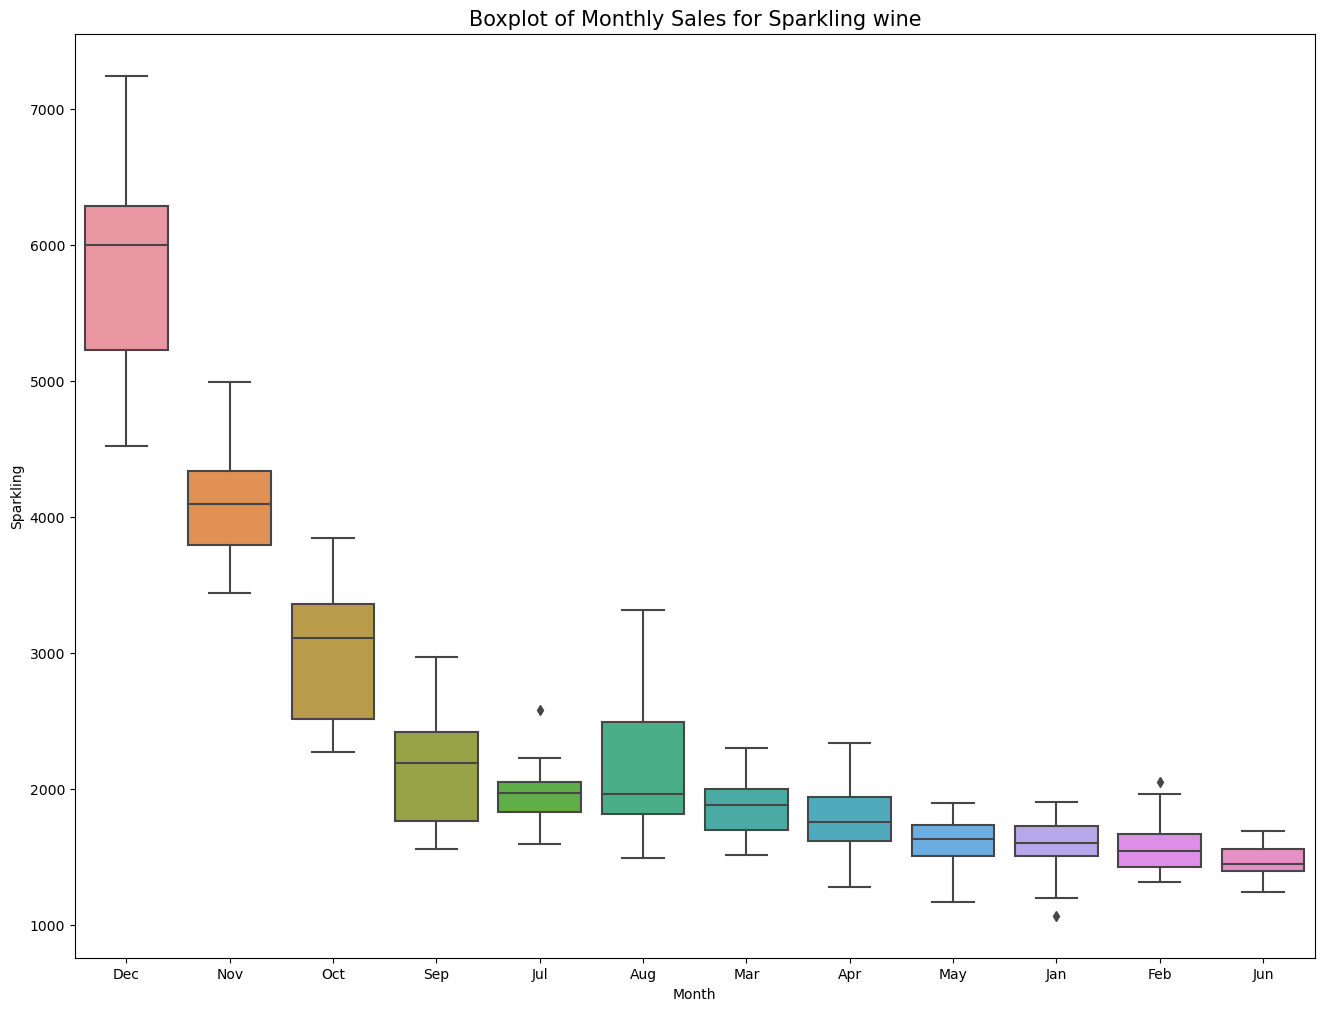

In [317]:
sns.boxplot(x =df_Sparkling['Month'],y=df_Sparkling['Sparkling'],order=month_order1)
plt.title('Boxplot of Monthly Sales for Sparkling wine',fontsize=15);

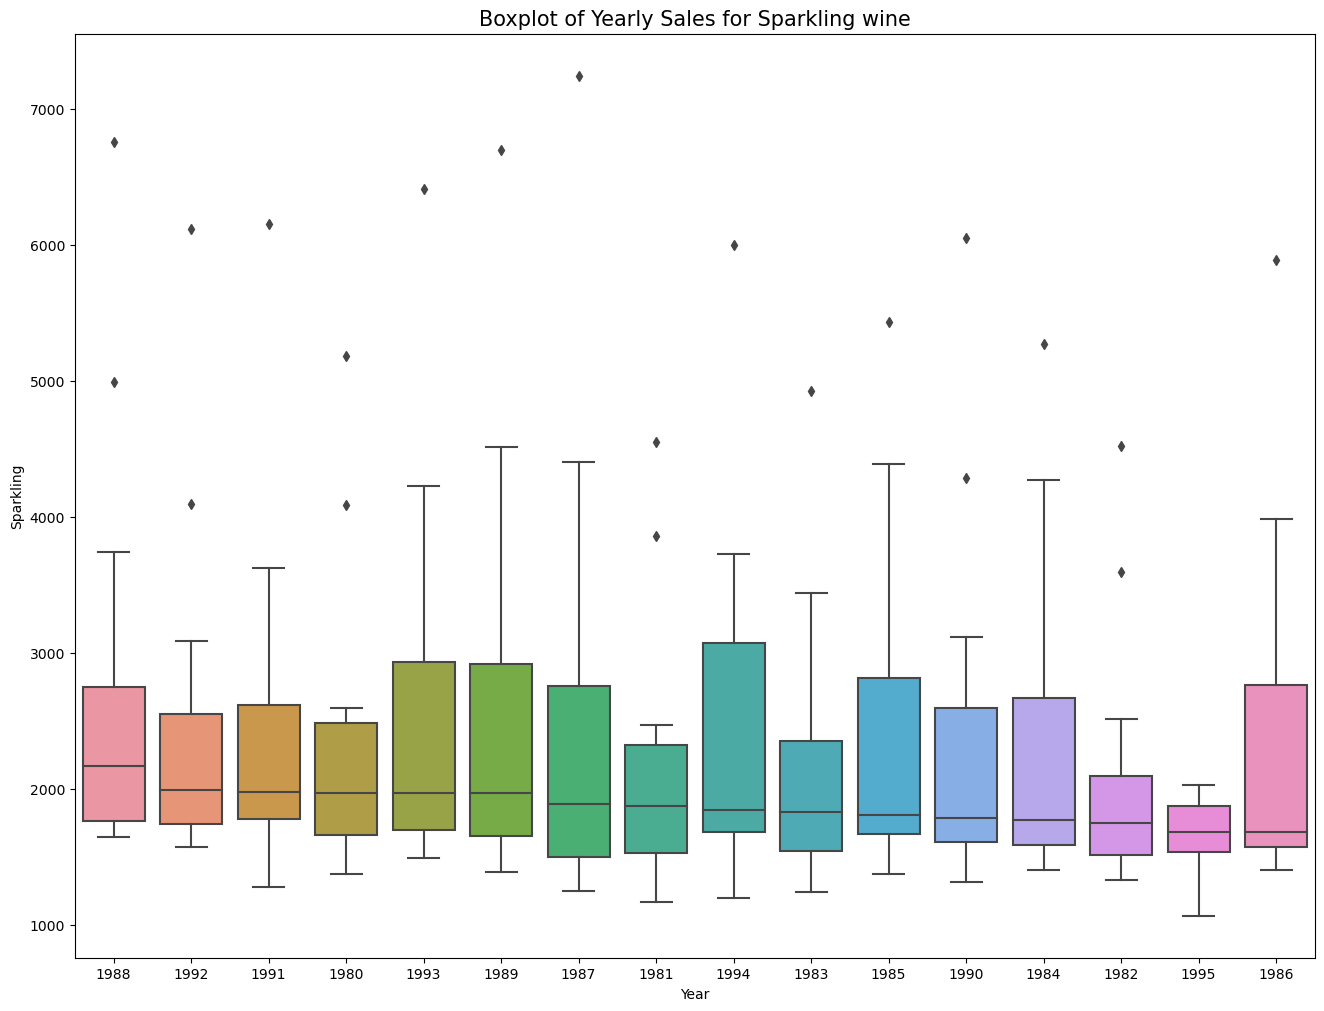

In [318]:
year_order1=df_Sparkling.groupby('Year')['Sparkling'].median().sort_values(ascending=False).index
sns.boxplot(x =df_Sparkling['Year'],y=df_Sparkling['Sparkling'],order=year_order1)
plt.title('Boxplot of Yearly Sales for Sparkling wine',fontsize=15);

## From the boxplot it is clear that,the sales follows no trend whereas the seasonality has a significant effect.

In [319]:
pivot3=pd.pivot_table(df_Sparkling,values = "Sparkling", columns = "Year", index = "Month")
pivot3 = pivot3.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pivot3

Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
Jan    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
Feb    1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
Mar    2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
Apr    1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
May    1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
Jun    1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
Jul    1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
Aug    2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
Sep    1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   
Oct    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
Nov    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
Dec    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
Jan    1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Feb    1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Mar    1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
Apr    1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
May    1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Jun    1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Jul    1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Aug    1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Sep    2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
Oct    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Nov    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Dec    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

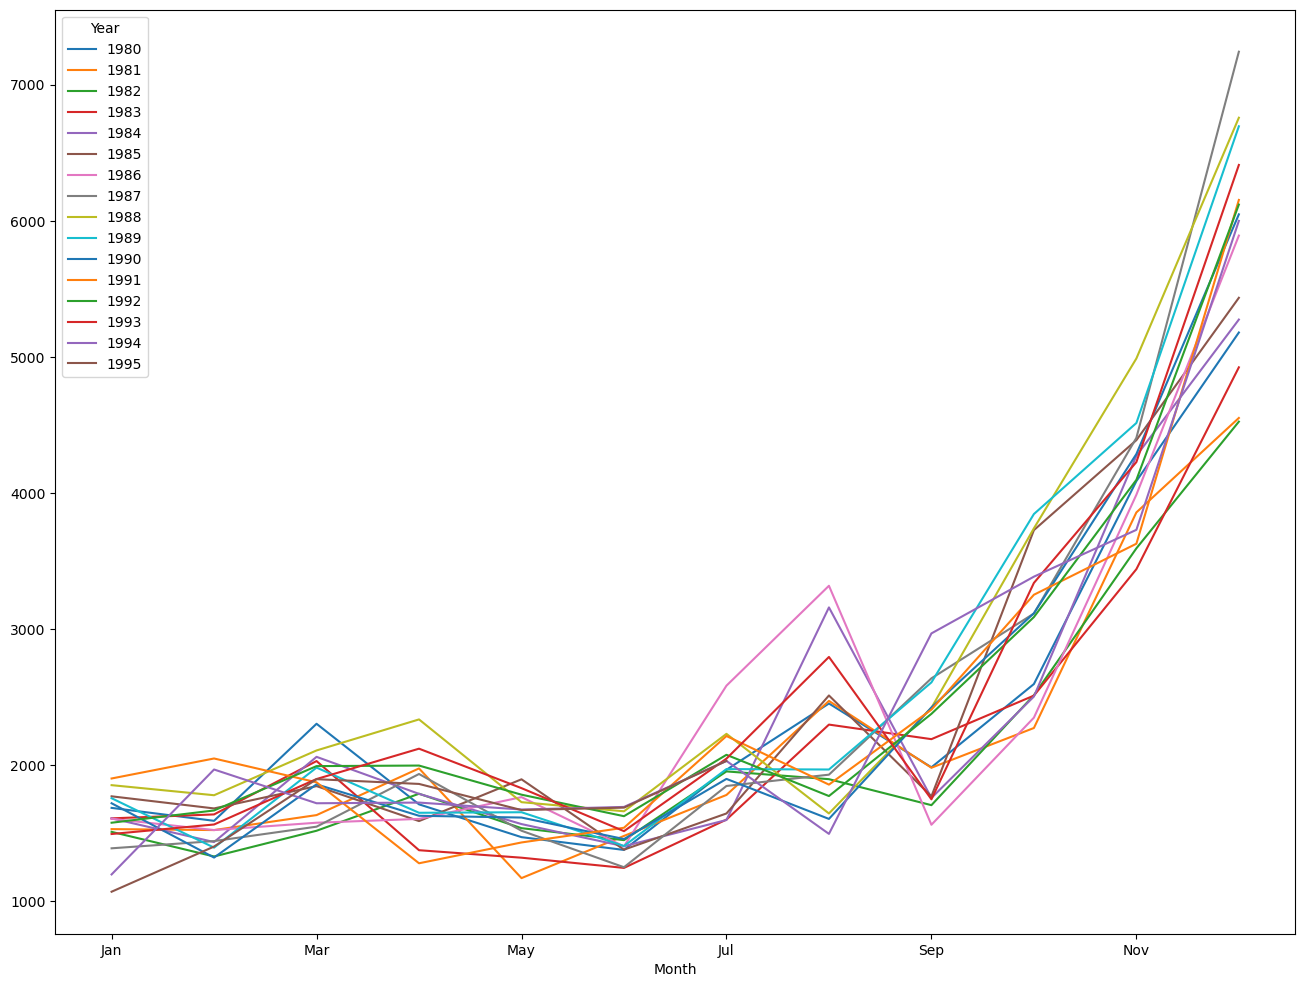

In [320]:
pivot3.plot();

In [321]:
pivot4=pd.pivot_table(df_Sparkling,values = "Sparkling", columns = "Month", index = "Year")
pivot4


Month     Apr     Aug     Dec     Feb     Jan     Jul     Jun     Mar     May  \
Year                                                                            
1980   1712.0  2453.0  5179.0  1591.0  1686.0  1966.0  1377.0  2304.0  1471.0   
1981   1976.0  2472.0  4551.0  1523.0  1530.0  1781.0  1480.0  1633.0  1170.0   
1982   1790.0  1897.0  4524.0  1329.0  1510.0  1954.0  1449.0  1518.0  1537.0   
1983   1375.0  2298.0  4923.0  1638.0  1609.0  1600.0  1245.0  2030.0  1320.0   
1984   1789.0  3159.0  5274.0  1435.0  1609.0  1597.0  1404.0  2061.0  1567.0   
1985   1589.0  2512.0  5434.0  1682.0  1771.0  1645.0  1379.0  1846.0  1896.0   
1986   1605.0  3318.0  5891.0  1523.0  1606.0  2584.0  1403.0  1577.0  1765.0   
1987   1935.0  1930.0  7242.0  1442.0  1389.0  1847.0  1250.0  1548.0  1518.0   
1988   2336.0  1645.0  6757.0  1779.0  1853.0  2230.0  1661.0  2108.0  1728.0   
1989   1650.0  1968.0  6694.0  1394.0  1757.0  1971.0  1406.0  1982.0  1654.0   
1990   1628.0  1605.0  6047.0  1321.0  1720.0  1899.0  1457.0  1859.0  1615.0   
1991   1279.0  1857.0  6153.0  2049.0  1902.0  2214.0  1540.0  1874.0  1432.0   
1992   1997.0  1773.0  6119.0  1667.0  1577.0  2076.0  1625.0  1993.0  1783.0   
1993   2121.0  2795.0  6410.0  1564.0  1494.0  2048.0  1515.0  1898.0  1831.0   
1994   1725.0  1495.0  5999.0  1968.0  1197.0  2031.0  1693.0  1720.0  1674.0   
1995   1862.0     NaN     NaN  1402.0  1070.0  2031.0  1688.0  1897.0  1670.0   

Month     Nov     Oct     Sep  
Year                           
1980   4087.0  2596.0  1984.0  
1981   3857.0  2273.0  1981.0  
1982   3593.0  2514.0  1706.0  
1983   3440.0  2511.0  2191.0  
1984   4273.0  2504.0  1759.0  
1985   4388.0  3727.0  1771.0  
1986   3987.0  2349.0  1562.0  
1987   4405.0  3114.0  2638.0  
1988   4988.0  3740.0  2421.0  
1989   4514.0  3845.0  2608.0  
1990   4286.0  3116.0  2424.0  
1991   3627.0  3252.0  2408.0  
1992   4096.0  3088.0  2377.0  
1993   4227.0  3339.0  1749.0  
1994   3729.0  3385.0  2968.0  
1995      NaN     NaN     NaN

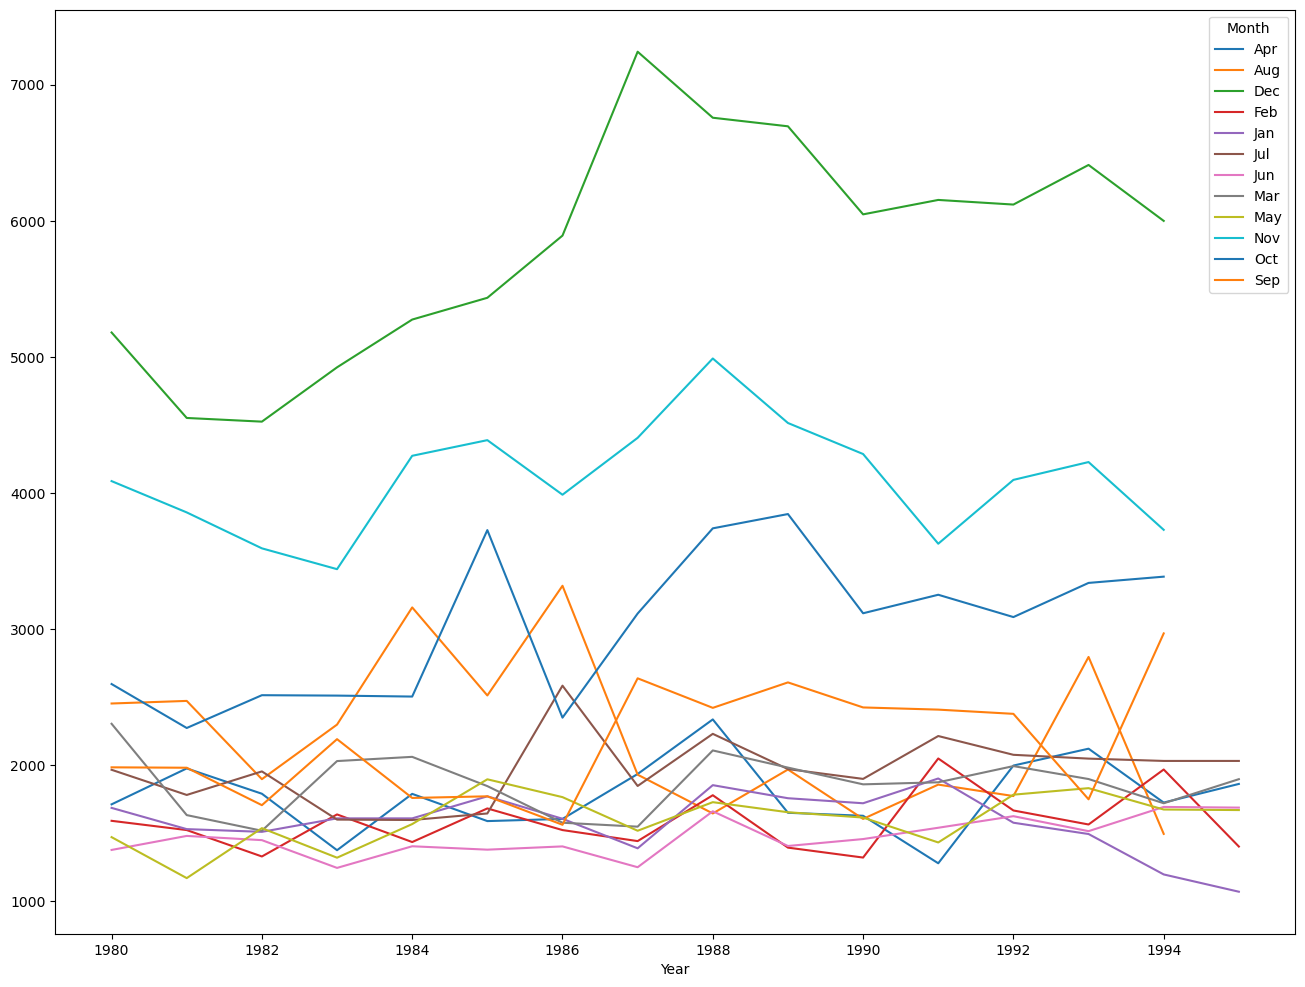

In [322]:
pivot4.plot();

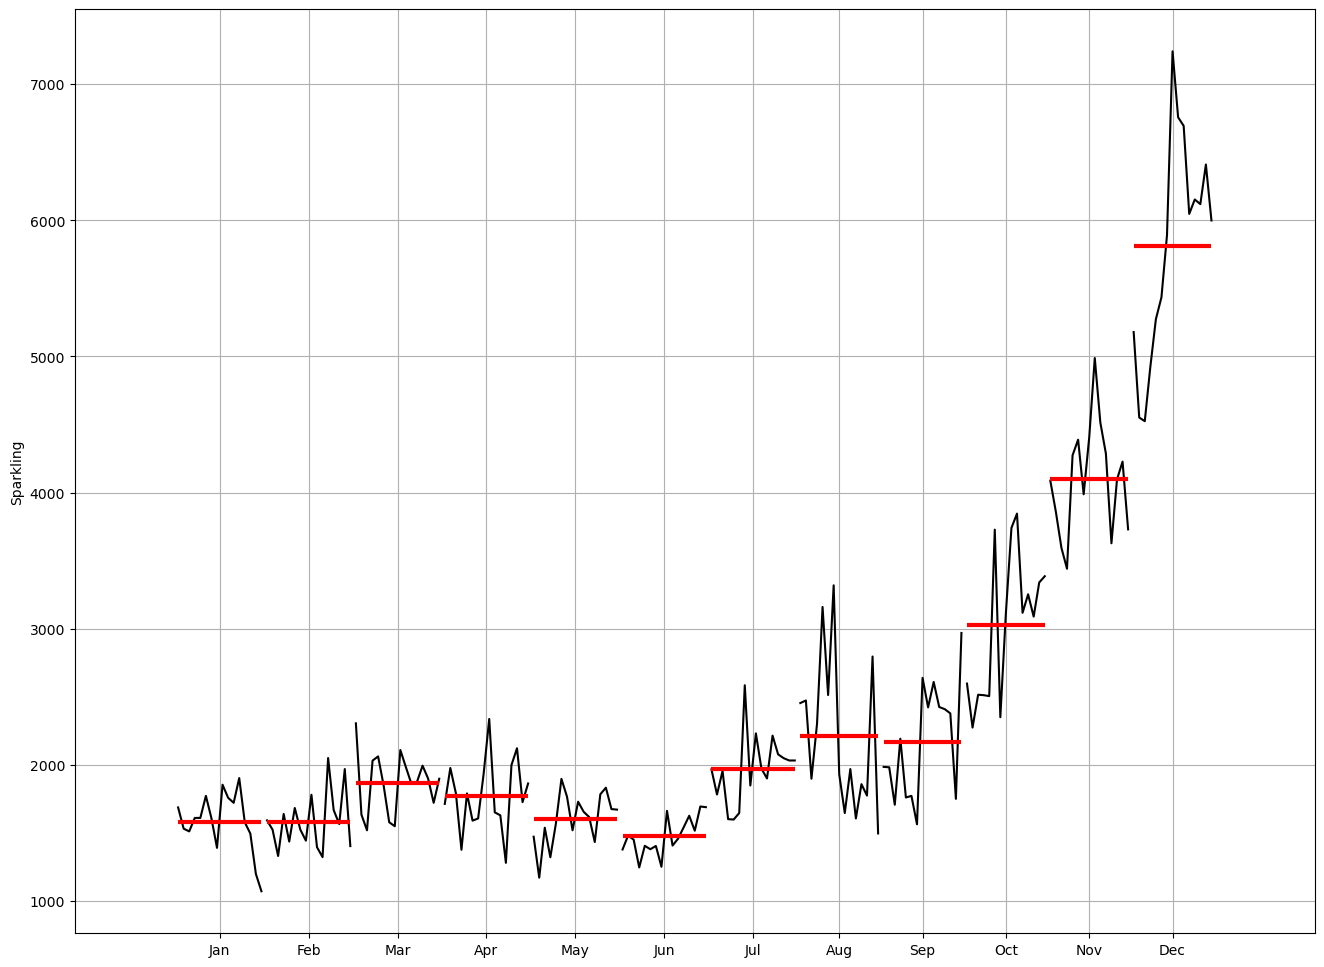

In [323]:
month_plot(df_Sparkling['Sparkling'],ylabel='Sparkling')
plt.grid();

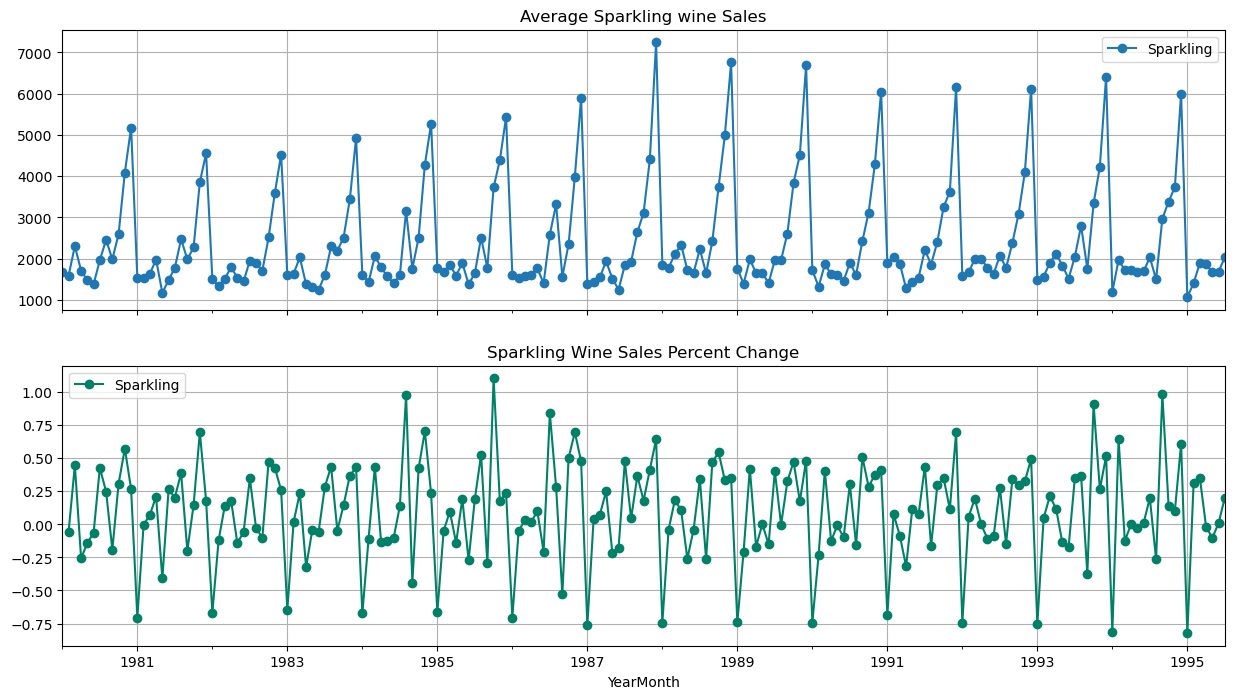

In [324]:
Average    = df_Sparkling.groupby(df_Sparkling.index)["Sparkling"].mean()
pct_change = df_Sparkling.groupby(df_Sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = Average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling wine Sales",grid=True)
ax1.set_xticks(range(len(Average)))
ax1.set_xticklabels(Average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

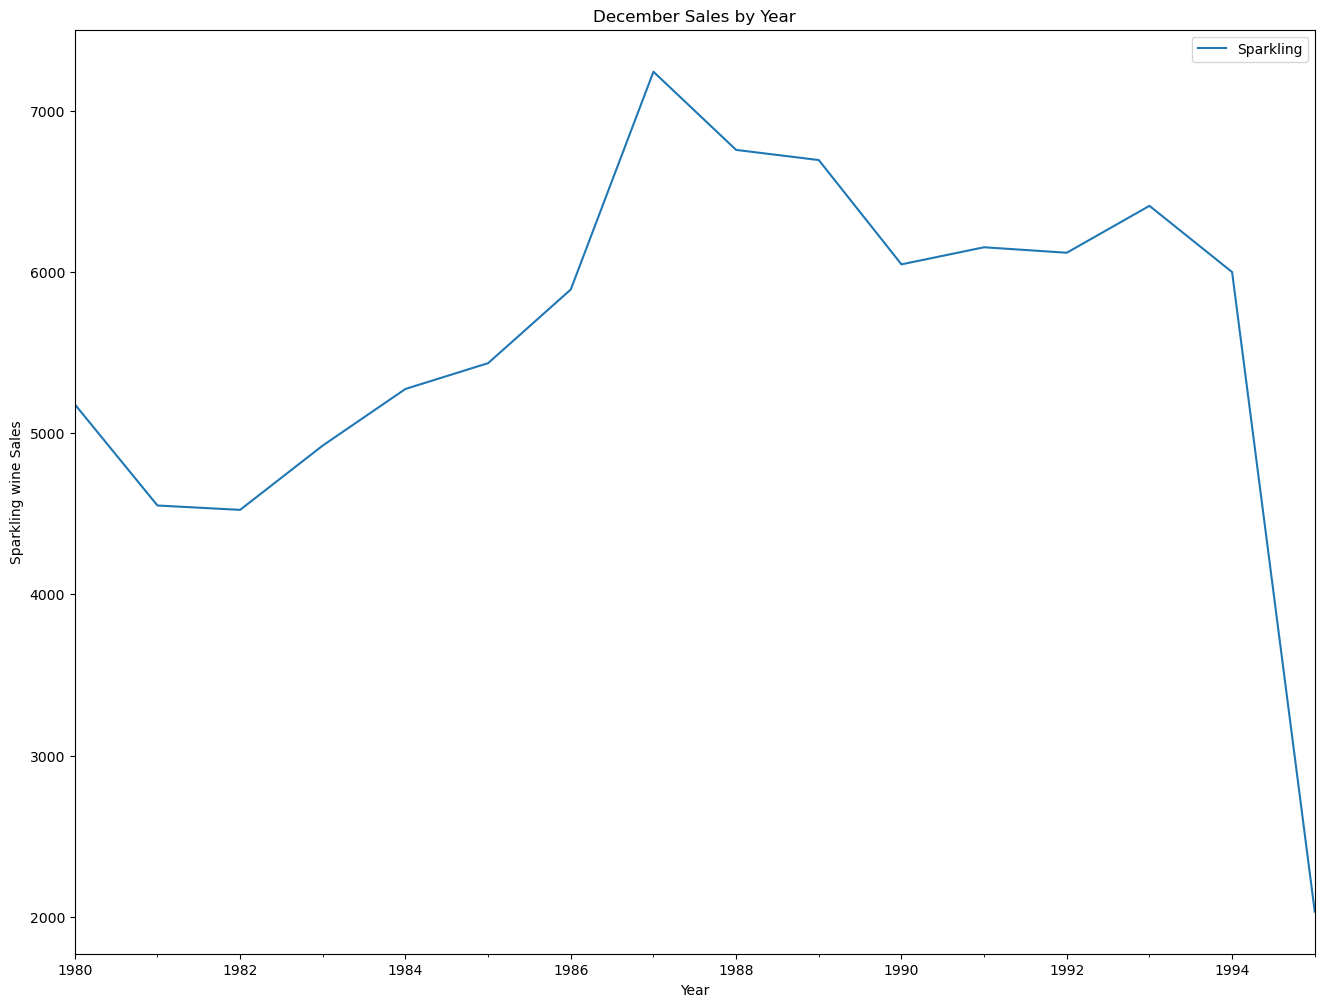

In [325]:
df_Sparkling1.resample(rule='A').max().plot()
plt.title('December Sales by Year')
plt.xlabel('Year',fontsize=10)
plt.ylabel('Sparkling wine Sales',fontsize=10);

## Train Test split

In [326]:
train_rose=df_Rose1[df_Rose1.index.year < 1992]
test_rose=df_Rose1[df_Rose1.index.year >= 1992]

In [327]:
train_rose.tail()

Rose
YearMonth        
1991-08-01   55.0
1991-09-01   71.0
1991-10-01   63.0
1991-11-01   74.0
1991-12-01  106.0

In [328]:
len(train_rose)

144

In [329]:
len(test_rose)

43

In [330]:
test_rose.head()

Rose
YearMonth       
1992-01-01  34.0
1992-02-01  47.0
1992-03-01  56.0
1992-04-01  53.0
1992-05-01  53.0

# Linear regression

In [331]:
LinearRegression_train = train_rose.copy()
LinearRegression_test = test_rose.copy()

In [332]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+145 for i in range(len(test_rose))]

In [333]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [334]:
LinearRegression_train.head()

Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

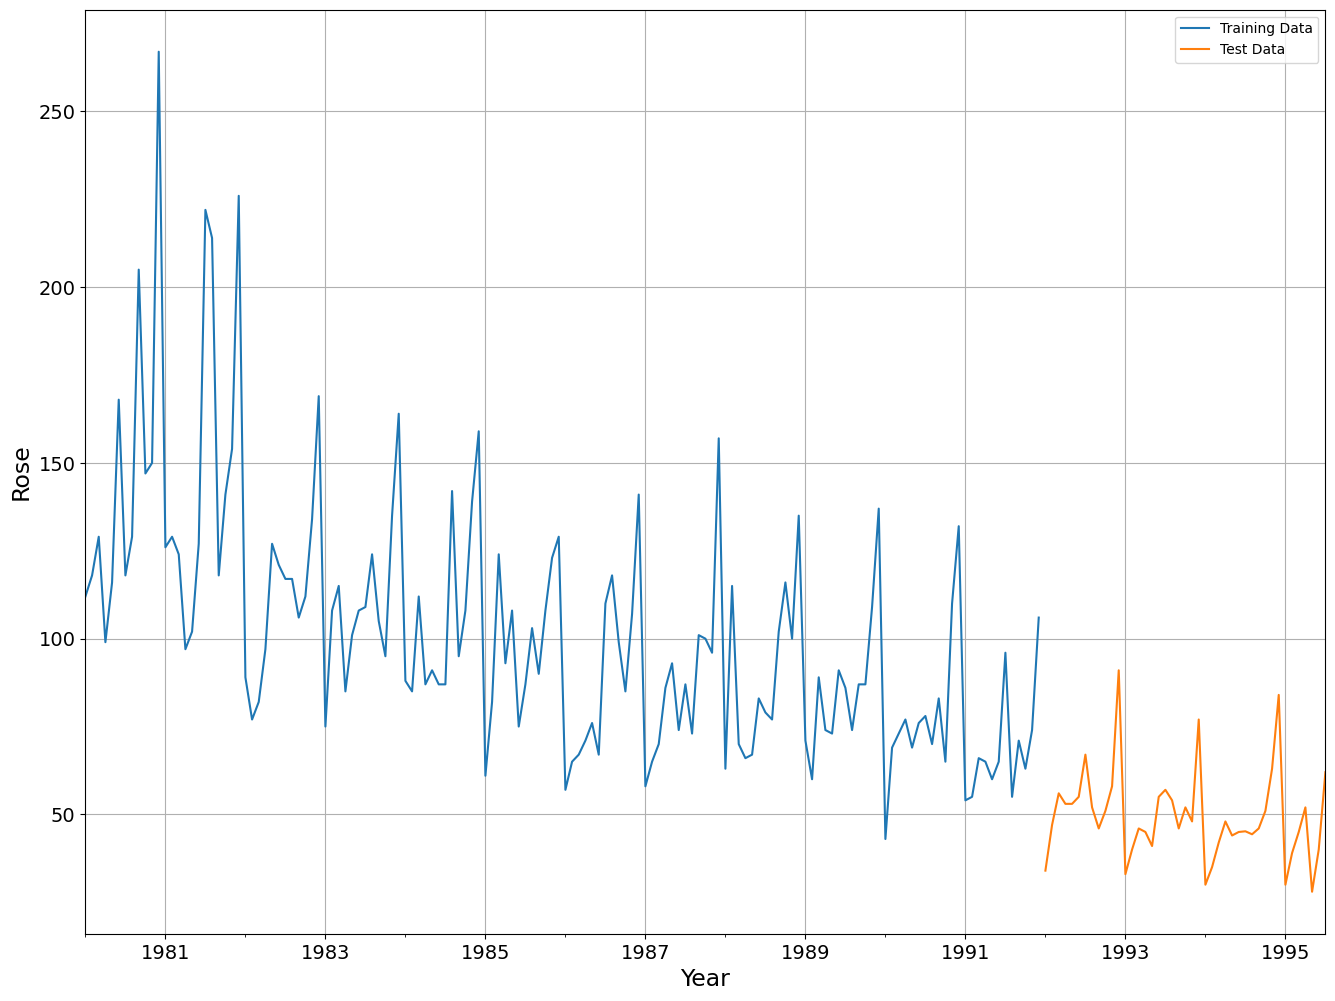

In [335]:
train_rose['Rose'].plot(fontsize=14)
test_rose['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.xlabel('Year',fontsize=17)
plt.ylabel('Rose',fontsize=17)
plt.show();

In [336]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

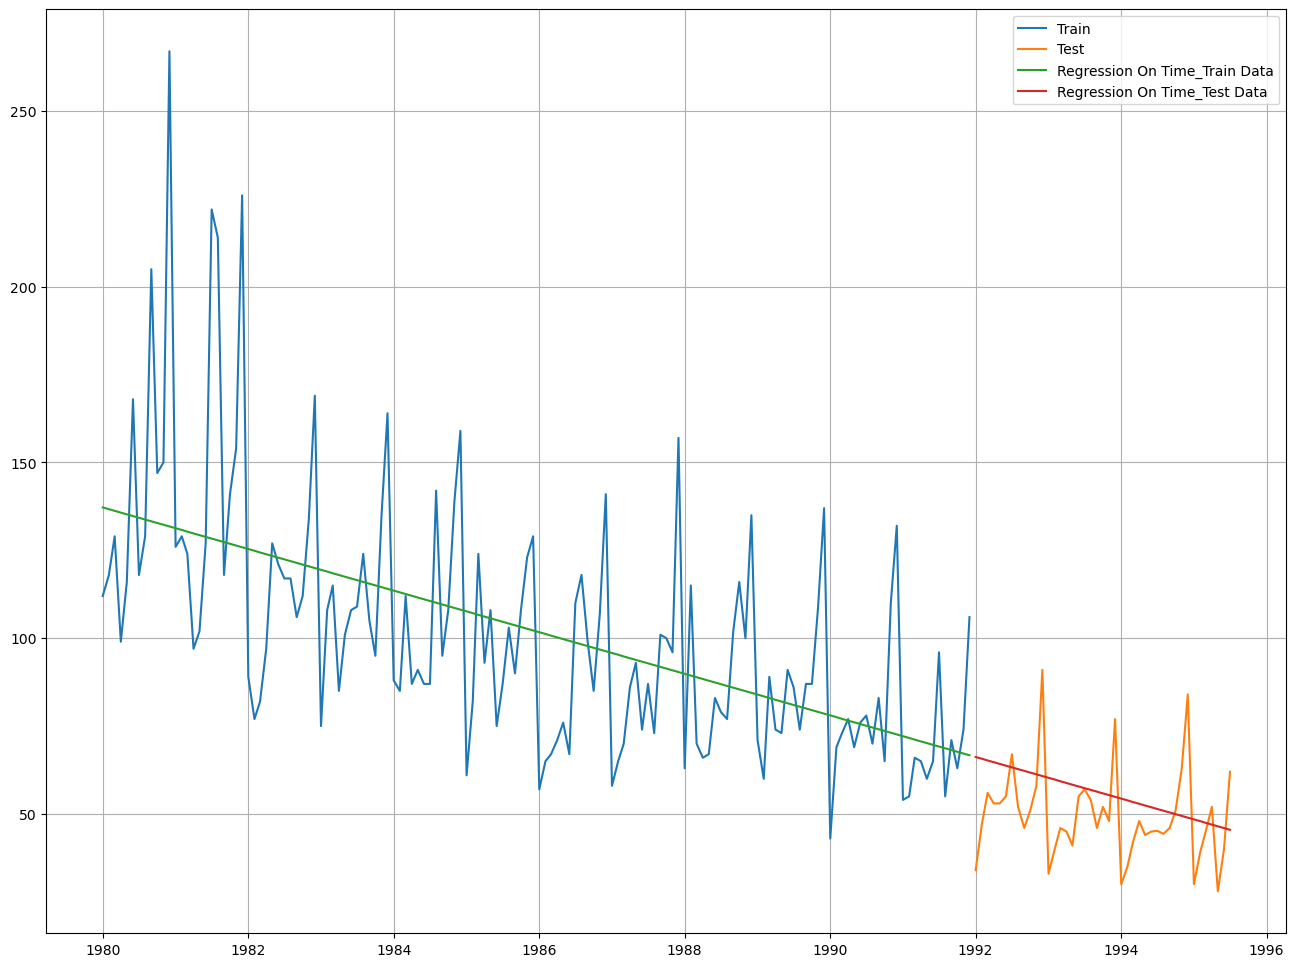

In [337]:
train_predictions_model        = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['Predictions'] = train_predictions_model

test_predictions_model        = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['Predictions'] = test_predictions_model

plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_train['Predictions'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['Predictions'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [338]:
from sklearn import metrics

In [339]:
rmse_lr=metrics.root_mean_squared_error(test_rose['Rose'],test_predictions_model)
print("For Regression On Time forecast on the Test Data,  RMSE is %3.3f " %(rmse_lr))

For Regression On Time forecast on the Test Data,  RMSE is 14.921 


In [340]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  14.920524

# Simple Average

In [341]:
SimpleAverage_train = train_rose.copy()
SimpleAverage_test = test_rose.copy()
SimpleAverage_test['Mean_Forecast'] = train_rose['Rose'].mean()
SimpleAverage_test.head()

Rose  Mean_Forecast
YearMonth                      
1992-01-01  34.0     101.958333
1992-02-01  47.0     101.958333
1992-03-01  56.0     101.958333
1992-04-01  53.0     101.958333
1992-05-01  53.0     101.958333

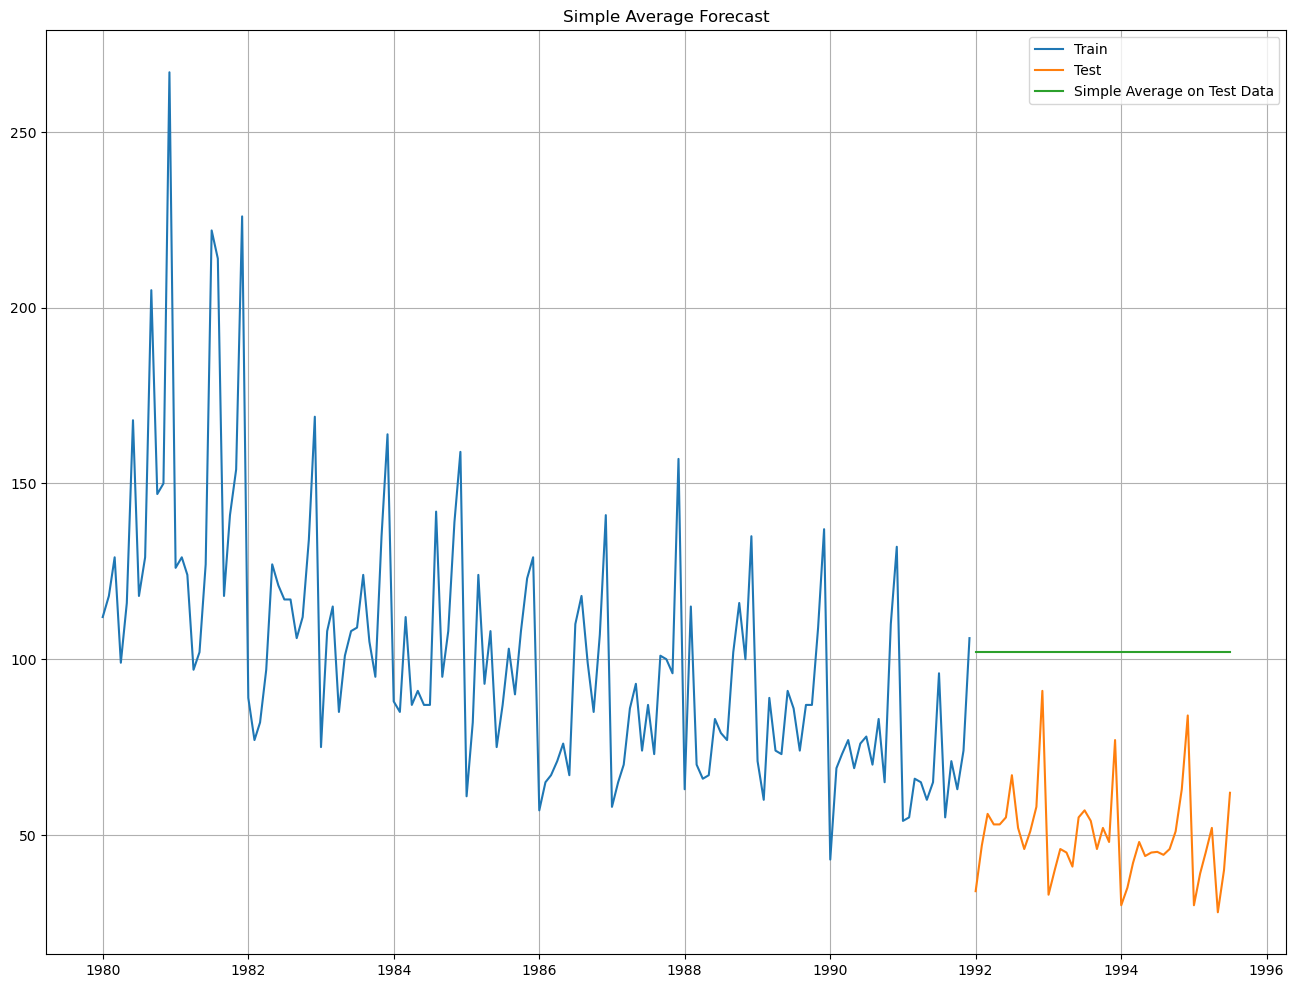

In [342]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['Mean_Forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [343]:
rmse_simple_average=metrics.root_mean_squared_error(test_rose['Rose'],SimpleAverage_test['Mean_Forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average))

For Simple Average forecast on the Test Data,  RMSE is 53.979


In [344]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_simple_average]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression     14.920524
Simple Average Model  53.979005

# Moving Average

In [345]:
MovingAverage_Rose = df_Rose1.copy()
MovingAverage_Rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [346]:
MovingAverage_Rose['Trailing_2'] = MovingAverage_Rose['Rose'].rolling(2).mean()
MovingAverage_Rose['Trailing_4'] = MovingAverage_Rose['Rose'].rolling(4).mean()
MovingAverage_Rose['Trailing_6'] = MovingAverage_Rose['Rose'].rolling(6).mean()
MovingAverage_Rose['Trailing_8'] = MovingAverage_Rose['Rose'].rolling(8).mean()
MovingAverage_Rose['Trailing_10'] = MovingAverage_Rose['Rose'].rolling(10).mean()



In [347]:
MovingAverage_Rose.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_8  Trailing_10
YearMonth                                                                     
1980-01-01  112.0         NaN         NaN         NaN         NaN          NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN          NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN          NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN          NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN          NaN
1980-06-01  168.0       142.0      128.00  123.666667         NaN          NaN
1980-07-01  118.0       143.0      125.25  124.666667         NaN          NaN
1980-08-01  129.0       123.5      132.75  126.500000     123.625          NaN
1980-09-01  205.0       167.0      155.00  139.166667     135.250          NaN
1980-10-01  147.0       176.0      149.75  147.166667     138.875        134.1

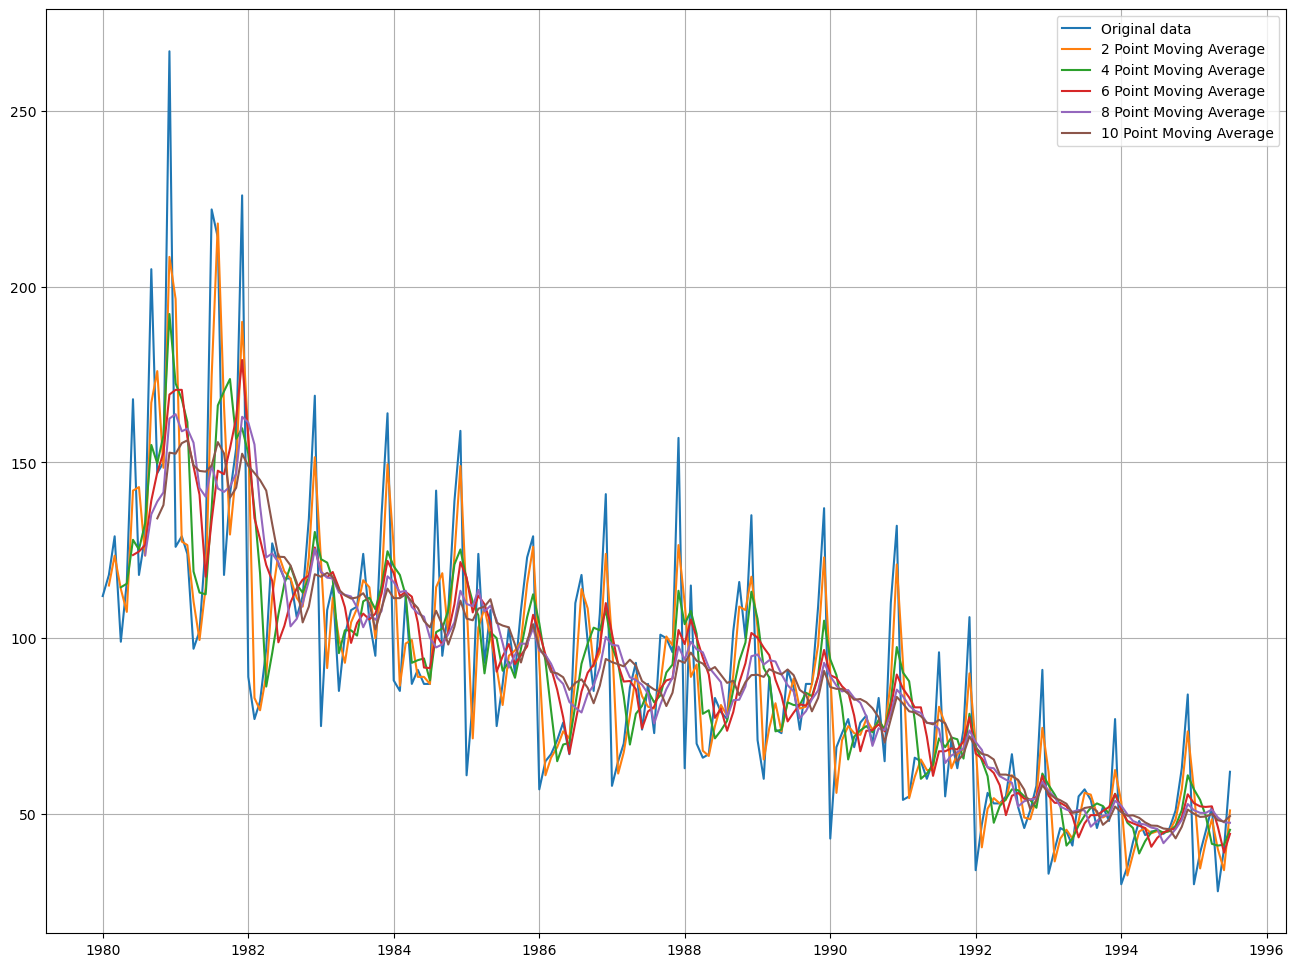

In [348]:

plt.plot(MovingAverage_Rose['Rose'], label='Original data')
plt.plot(MovingAverage_Rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_8'],label = '8 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_10'],label = '10 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [349]:
MovingAverage_Rose_train=MovingAverage_Rose[MovingAverage_Rose.index.year < 1992]
MovingAverage_Rose_test=MovingAverage_Rose[MovingAverage_Rose.index.year >= 1992]

In [350]:
MovingAverage_Rose_train.tail()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_8  Trailing_10
YearMonth                                                                     
1991-08-01   55.0        75.5       69.00   67.833333      64.500         75.8
1991-09-01   71.0        63.0       71.75   68.666667      66.625         71.9
1991-10-01   63.0        67.0       71.25   68.333333      67.625         65.0
1991-11-01   74.0        68.5       65.75   70.666667      68.625         67.0
1991-12-01  106.0        90.0       78.50   77.500000      73.750         72.1

In [351]:
MovingAverage_Rose_test.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_8  Trailing_10
YearMonth                                                                    
1992-01-01  34.0        70.0       69.25   67.166667       70.50         68.9
1992-02-01  47.0        40.5       65.25   65.833333       68.25         67.1
1992-03-01  56.0        51.5       60.75   63.333333       63.25         66.7
1992-04-01  53.0        54.5       47.50   61.666667       63.00         65.5
1992-05-01  53.0        53.0       52.25   58.166667       60.75         61.2

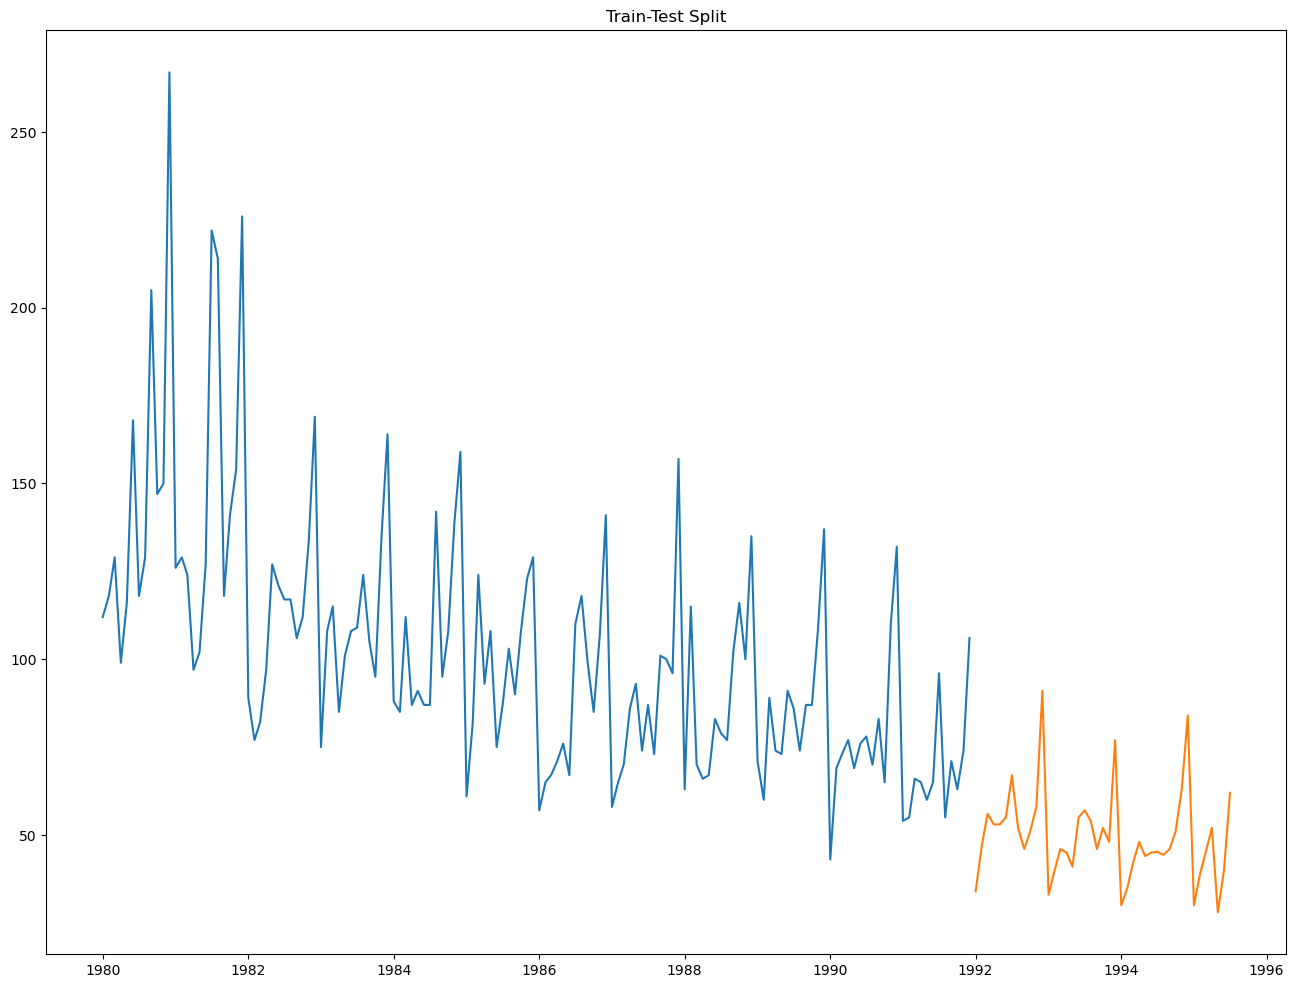

In [352]:
plt.plot(MovingAverage_Rose_train['Rose'], label='Train')
plt.plot(MovingAverage_Rose_test['Rose'], label='Test')
plt.title('Train-Test Split');


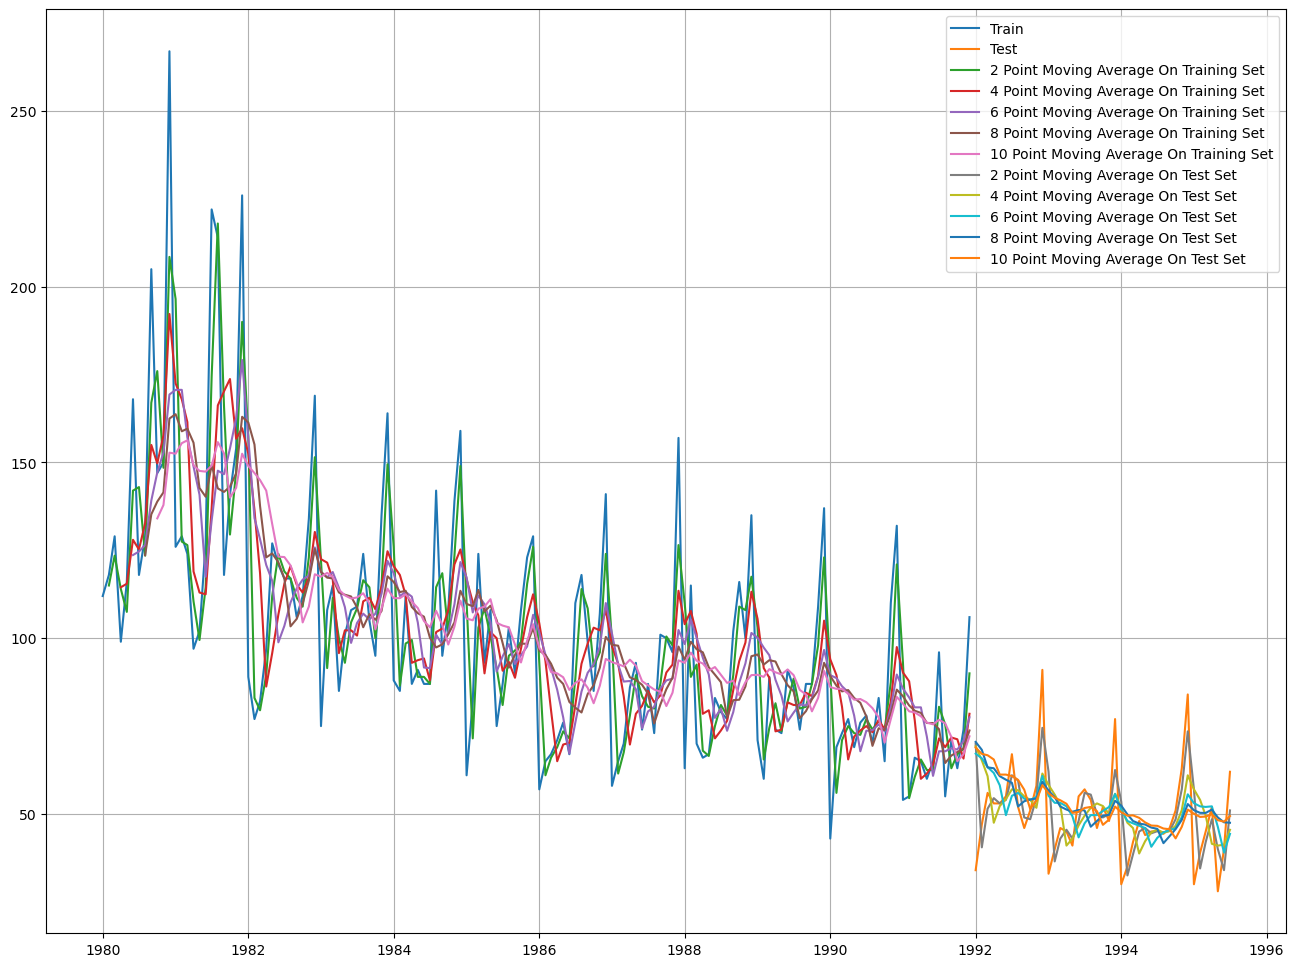

In [353]:
plt.plot(MovingAverage_Rose_train['Rose'], label='Train')
plt.plot(MovingAverage_Rose_test['Rose'], label='Test')

plt.plot(MovingAverage_Rose_train['Trailing_2'], label='2 Point Moving Average On Training Set')
plt.plot(MovingAverage_Rose_train['Trailing_4'], label='4 Point Moving Average On Training Set')
plt.plot(MovingAverage_Rose_train['Trailing_6'],label = '6 Point Moving Average On Training Set')
plt.plot(MovingAverage_Rose_train['Trailing_8'],label = '8 Point Moving Average On Training Set')
plt.plot(MovingAverage_Rose_train['Trailing_10'],label = '10 Point Moving Average On Training Set')

plt.plot(MovingAverage_Rose_test['Trailing_2'], label='2 Point Moving Average On Test Set')
plt.plot(MovingAverage_Rose_test['Trailing_4'], label='4 Point Moving Average On Test Set')
plt.plot(MovingAverage_Rose_test['Trailing_6'],label = '6 Point Moving Average On Test Set')
plt.plot(MovingAverage_Rose_test['Trailing_8'],label = '8 Point Moving Average On Test Set')
plt.plot(MovingAverage_Rose_test['Trailing_10'],label = '10 Point Moving Average On Test Set')

plt.legend(loc = 'best')
plt.grid();

## Model Evaluation

In [354]:
Rmse_MA_2 = metrics.root_mean_squared_error(test_rose['Rose'],MovingAverage_Rose_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(Rmse_MA_2))


Rmse_MA_4 = metrics.root_mean_squared_error(test_rose['Rose'],MovingAverage_Rose_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(Rmse_MA_4))


Rmse_MA_6 = metrics.root_mean_squared_error(test_rose['Rose'],MovingAverage_Rose_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(Rmse_MA_6))


Rmse_MA_8 = metrics.root_mean_squared_error(test_rose['Rose'],MovingAverage_Rose_test['Trailing_8'])
print("For 8 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(Rmse_MA_8))

Rmse_MA_10 = metrics.root_mean_squared_error(test_rose['Rose'],MovingAverage_Rose_test['Trailing_10'])
print("For 10 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(Rmse_MA_10))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 10.478
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 13.010
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 13.179
For 8 point Moving Average Model forecast on the Test Data,  RMSE is 13.723 
For 10 point Moving Average Model forecast on the Test Data,  RMSE is 13.857 


### Moving Average 2 has the least RMSE

In [355]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [Rmse_MA_2,Rmse_MA_4
                                          ,Rmse_MA_6,Rmse_MA_8,Rmse_MA_10]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','8pointTrailingMovingAverage','10pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression             14.920524
Simple Average Model          53.979005
2pointTrailingMovingAverage   10.477689
4pointTrailingMovingAverage   13.009639
6pointTrailingMovingAverage   13.179114
8pointTrailingMovingAverage   13.722744
10pointTrailingMovingAverage  13.856958

# Single Exponential Smoothening

In [356]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

In [357]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [358]:
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.09972330553818615,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.35922330517218,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [359]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rose))

In [360]:
SES_test.head()

Rose    predict
YearMonth                  
1992-01-01  34.0  76.724249
1992-02-01  47.0  76.724249
1992-03-01  56.0  76.724249
1992-04-01  53.0  76.724249
1992-05-01  53.0  76.724249

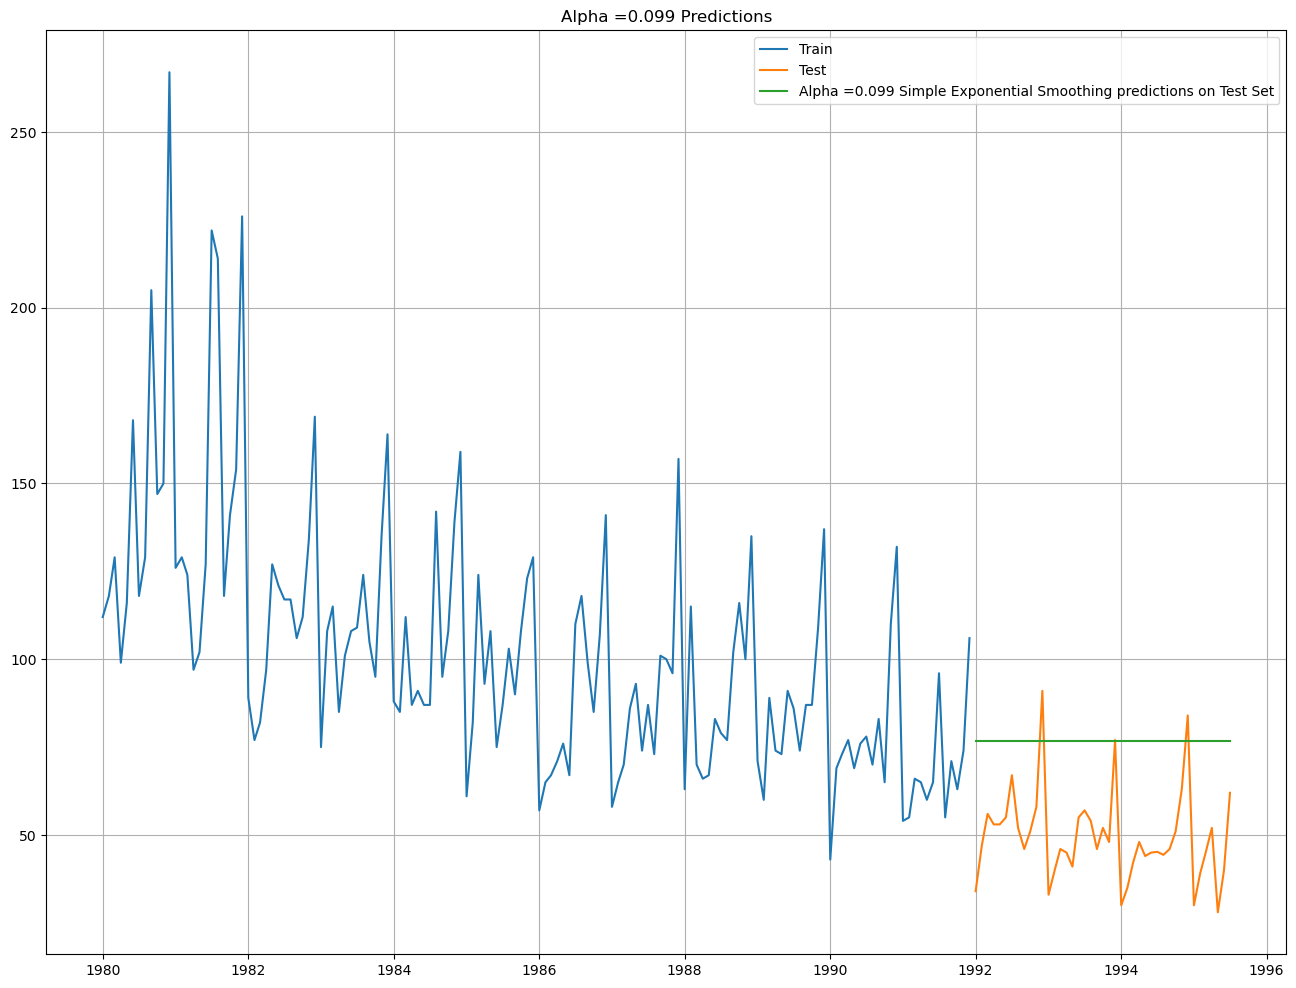

In [361]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.099 Predictions');

In [362]:
Rmse_SES=metrics.root_mean_squared_error(test_rose['Rose'],SES_test['predict'])
print("For Alpha =0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_SES))



For Alpha =0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 30.090


In [363]:
resultsDf_4=pd.DataFrame({'Test RMSE' :[Rmse_SES]},index=['Alpha =0.099 Simple Exponential Smoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression                          14.920524
Simple Average Model                       53.979005
2pointTrailingMovingAverage                10.477689
4pointTrailingMovingAverage                13.009639
6pointTrailingMovingAverage                13.179114
8pointTrailingMovingAverage                13.722744
10pointTrailingMovingAverage               13.856958
Alpha =0.099 Simple Exponential Smoothing  30.089953

# Double Exponential Smoothening

In [364]:
DES_train = train_rose.copy()
DES_test = test_rose.copy()

In [365]:
model_DES = Holt(DES_train,initialization_method='estimated')
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 3.598272693119714e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.70921284499383,
 'initial_trend': -0.4931155665258024,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [366]:
DES_test['predict']=model_DES_autofit.forecast(len(test_rose))

In [367]:
Rmse_Des=metrics.root_mean_squared_error(test_rose['Rose'],DES_test['predict'])
print("For Alpha =1.4901161193847656e-08 and Beta = 3.598272693119714e-09 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_Des))

For Alpha =1.4901161193847656e-08 and Beta = 3.598272693119714e-09 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 14.921


In [368]:
resultsDf_5=pd.DataFrame({'Test RMSE':[Rmse_Des]},index=['Alpha =1.49e-08 and Beta = 3.59e-09'])
resultsDf=pd.concat([resultsDf,resultsDf_5])

In [369]:
resultsDf

Test RMSE
Linear Regression                          14.920524
Simple Average Model                       53.979005
2pointTrailingMovingAverage                10.477689
4pointTrailingMovingAverage                13.009639
6pointTrailingMovingAverage                13.179114
8pointTrailingMovingAverage                13.722744
10pointTrailingMovingAverage               13.856958
Alpha =0.099 Simple Exponential Smoothing  30.089953
Alpha =1.49e-08 and Beta = 3.59e-09        14.920522

# Triple Exponential Smoothening Additive Seasonality

In [370]:
TES_train = train_rose.copy()
TES_test = test_rose.copy()

In [371]:
Model_TES=ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')
Model_TES_autofit=Model_TES.fit()
Model_TES_autofit.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.08843769105294025,
 'smoothing_trend': 3.7934426559563417e-07,
 'smoothing_seasonal': 3.660464583990049e-05,
 'damping_trend': nan,
 'initial_level': 146.8906693739815,
 'initial_trend': -0.5720078538029285,
 'initial_seasons': array([-30.3053029 , -18.8022038 , -10.45554906, -20.19349546,
        -12.43295378,  -6.92445838,   4.82035763,   7.06041575,
          4.78349178,   2.42058391,  19.98285483,  61.48248036]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [372]:
TES_test['predict']=Model_TES_autofit.forecast(len(test_rose))

In [373]:
TES_test.head()

Rose    predict
YearMonth                  
1992-01-01  34.0  33.631371
1992-02-01  47.0  44.562453
1992-03-01  56.0  52.337087
1992-04-01  53.0  42.027122
1992-05-01  53.0  49.215645

In [374]:
Rmse_TES=metrics.root_mean_squared_error(test_rose['Rose'],TES_test['predict'])
print("For Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-05 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_TES))

For Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-05 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 13.089


In [375]:
resultsDf_6=pd.DataFrame({'Test RMSE':[Rmse_TES]},index=['Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-05 TES Additive'])
resultsDf_6

Test RMSE
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792

In [376]:
resultsDf=pd.concat([resultsDf,resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   14.920524
Simple Average Model                                53.979005
2pointTrailingMovingAverage                         10.477689
4pointTrailingMovingAverage                         13.009639
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =0.099 Simple Exponential Smoothing           30.089953
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792

# Triple Exponential Smoothening Multiplicative Seasonality

In [377]:
Model_TES1=ExponentialSmoothing(TES_train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
Model_TES_autofit1=Model_TES1.fit()
Model_TES_autofit1.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.09958404512269121,
 'smoothing_trend': 0.00032437894139750585,
 'smoothing_seasonal': 1.0941135737395778e-06,
 'damping_trend': nan,
 'initial_level': 171.9004970623473,
 'initial_trend': -0.6828320235650057,
 'initial_seasons': array([0.63721011, 0.71721946, 0.78722322, 0.69379495, 0.77304307,
        0.83294332, 0.92958399, 0.97090567, 0.91849795, 0.90072151,
        1.04867582, 1.43885423]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [378]:
TES_test['predict_multiplicative']=Model_TES_autofit1.forecast(len(test_rose))

In [379]:
TES_test.head()

Rose    predict  predict_multiplicative
YearMonth                                          
1992-01-01  34.0  33.631371               47.358533
1992-02-01  47.0  44.562453               52.815662
1992-03-01  56.0  52.337087               57.433606
1992-04-01  53.0  42.027122               50.144011
1992-05-01  53.0  49.215645               55.344216

In [380]:
Rmse_TES1=metrics.root_mean_squared_error(test_rose['Rose'],TES_test['predict_multiplicative'])
print("For Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_TES1))

For Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 8.453


In [381]:
resultsDf_9=pd.DataFrame({'Test RMSE':[Rmse_TES1]},index=['Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 TES Multiplicative'])
resultsDf_9

Test RMSE
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768

In [382]:
resultsDf=pd.concat([resultsDf,resultsDf_9])
resultsDf

Test RMSE
Linear Regression                                   14.920524
Simple Average Model                                53.979005
2pointTrailingMovingAverage                         10.477689
4pointTrailingMovingAverage                         13.009639
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =0.099 Simple Exponential Smoothing           30.089953
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768

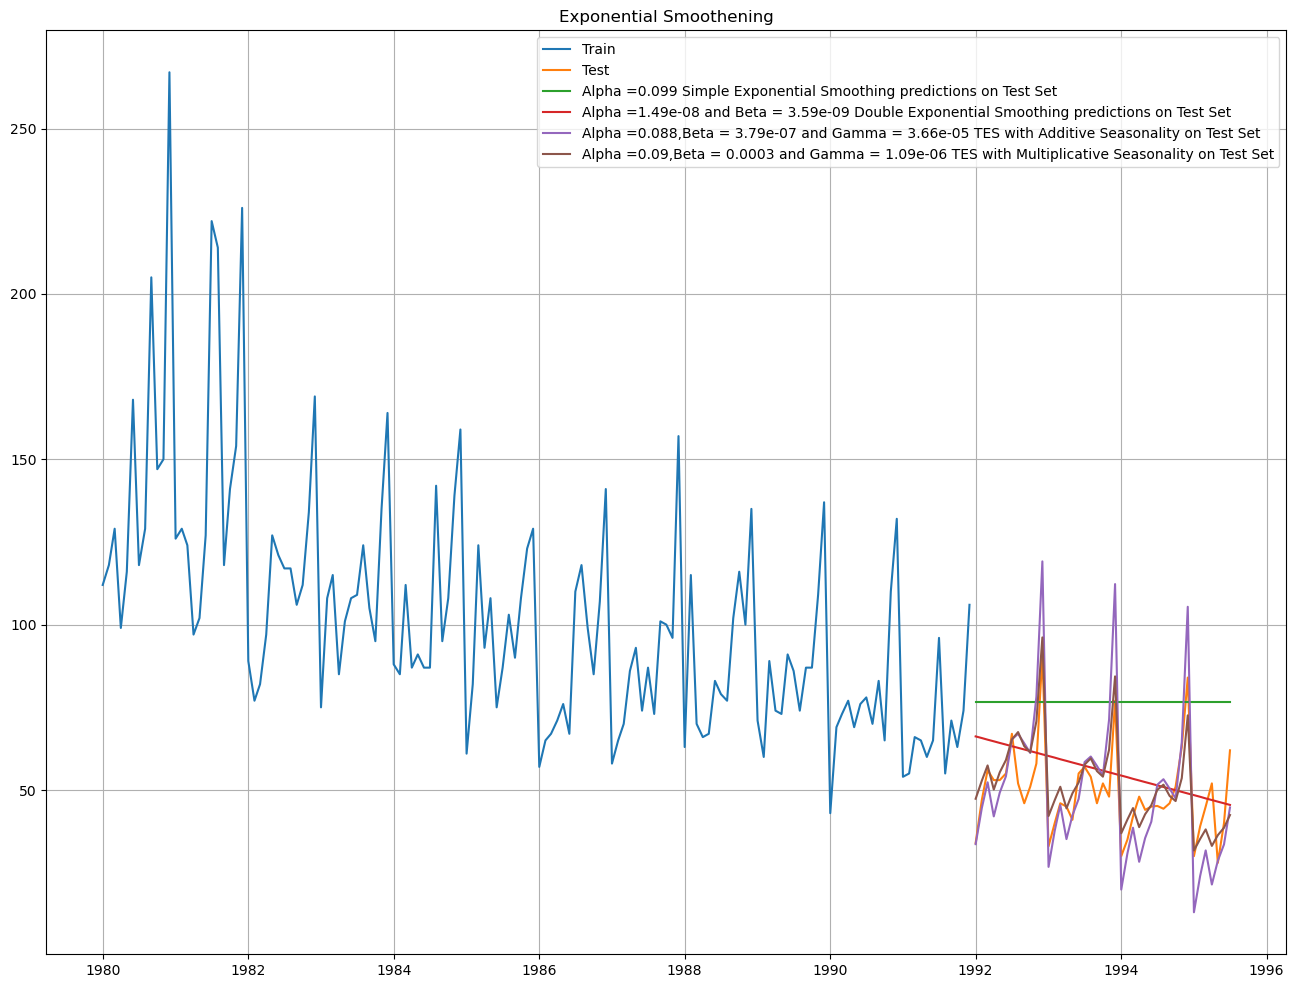

In [383]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'],label='Alpha =1.49e-08 and Beta = 3.59e-09 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['predict'],label='Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-05 TES with Additive Seasonality on Test Set')
plt.plot(TES_test['predict_multiplicative'],label='Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 TES with Multiplicative Seasonality on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Exponential Smoothening');

In [384]:
resultsDf

Test RMSE
Linear Regression                                   14.920524
Simple Average Model                                53.979005
2pointTrailingMovingAverage                         10.477689
4pointTrailingMovingAverage                         13.009639
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =0.099 Simple Exponential Smoothing           30.089953
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768

# Checking For Stationarity

# *<font color='blue'>Dickey-Fuller Test</font>*



- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*


In [385]:
dftest = adfuller(df_Rose1['Rose'])
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.873
DF test p-value is 0.3449


## We can see that the p-value is greater than 0.05,therefore the time series is not stationary

## Using plot

In [386]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=6).mean() 
    rolstd = timeseries.rolling(window=6).std()   

   
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

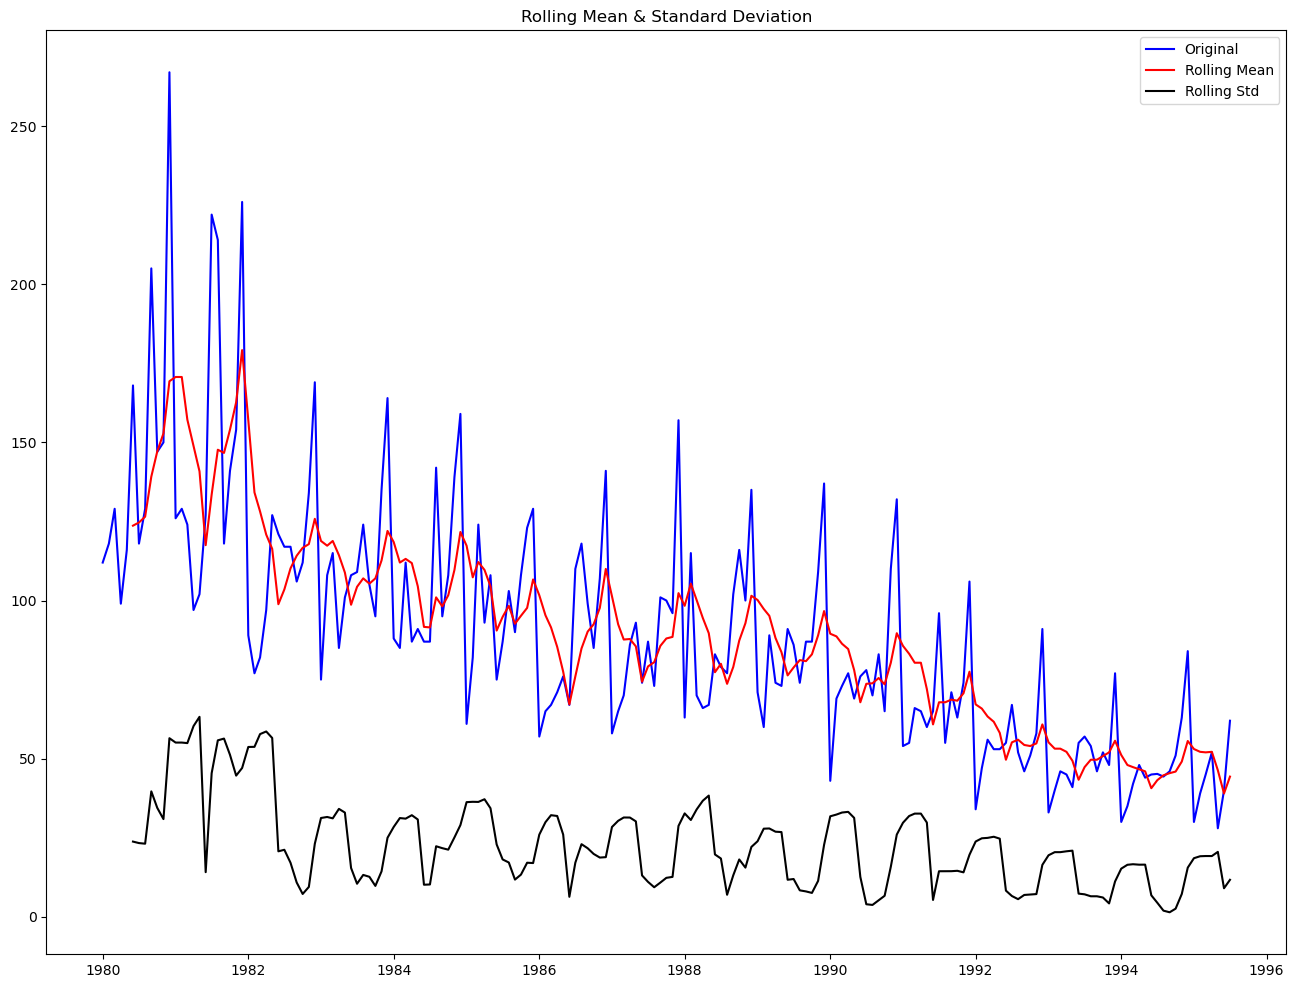

Results of Dickey-Fuller Test:
Test Statistic                  -1.872862
p-value                          0.344933
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [387]:
test_stationarity(df_Rose1['Rose'])

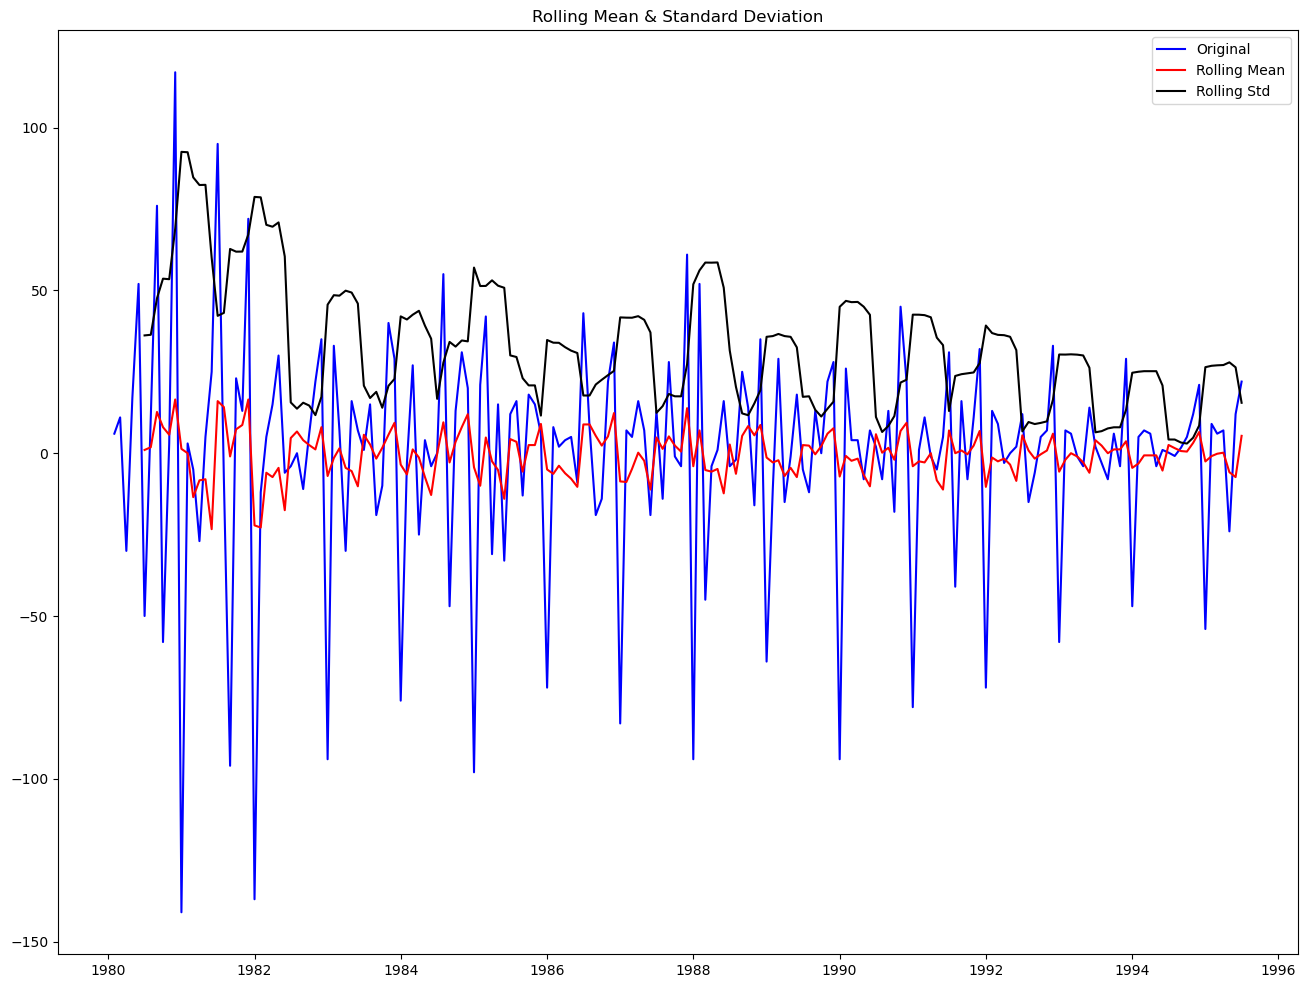

Results of Dickey-Fuller Test:
Test Statistic                -8.044041e+00
p-value                        1.814617e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [388]:
test_stationarity(df_Rose1['Rose'].diff().dropna())

## We can see that  the first order differencing of the time series makes it stationary,as the p value is 1.814617e-12 which is less than 0.05.
## Therefore d=1

# ACF & PACF Plot 

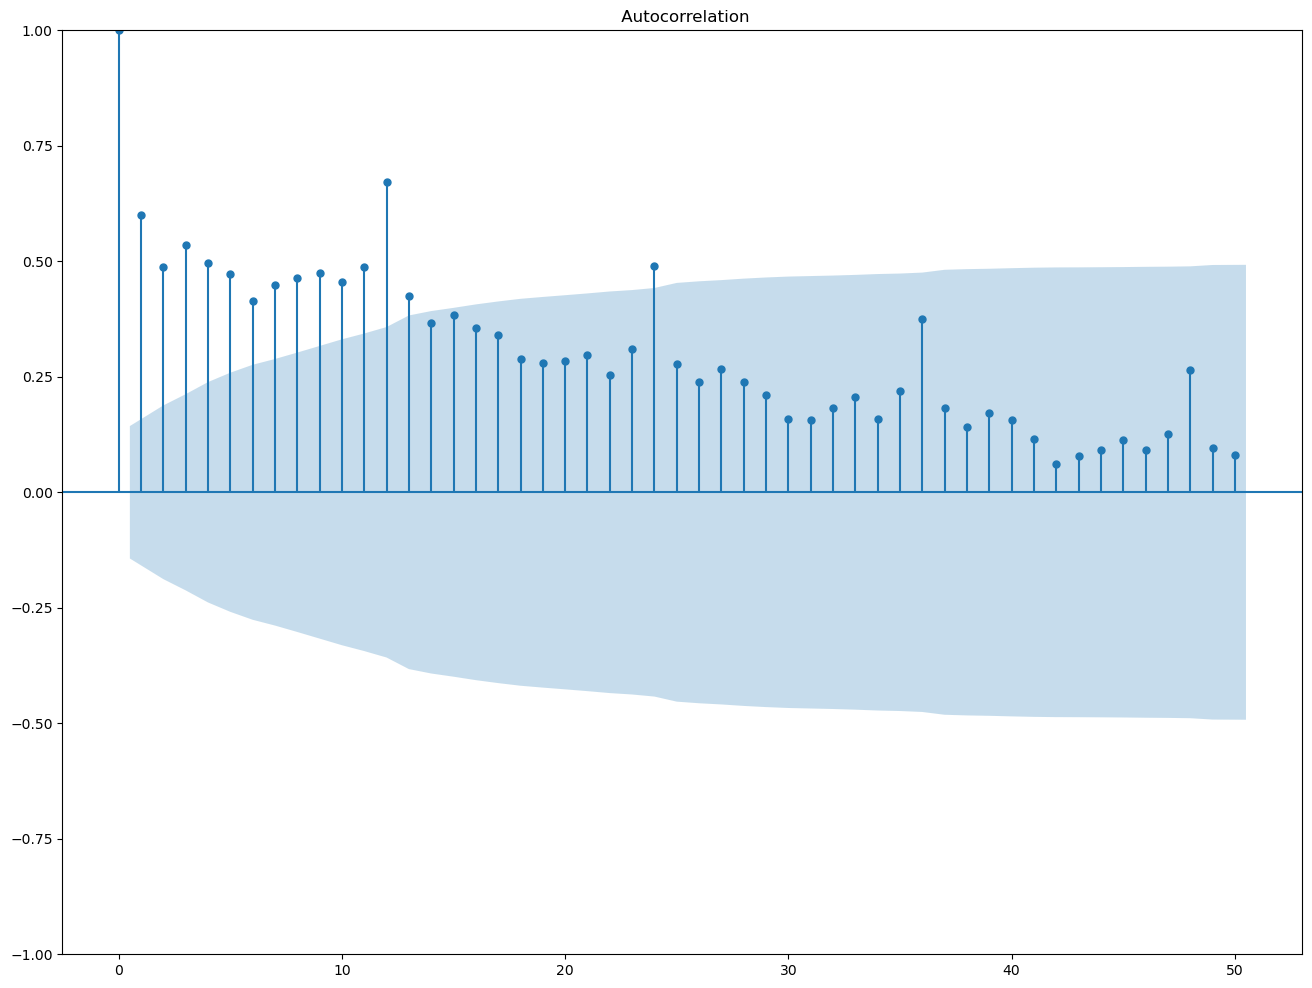

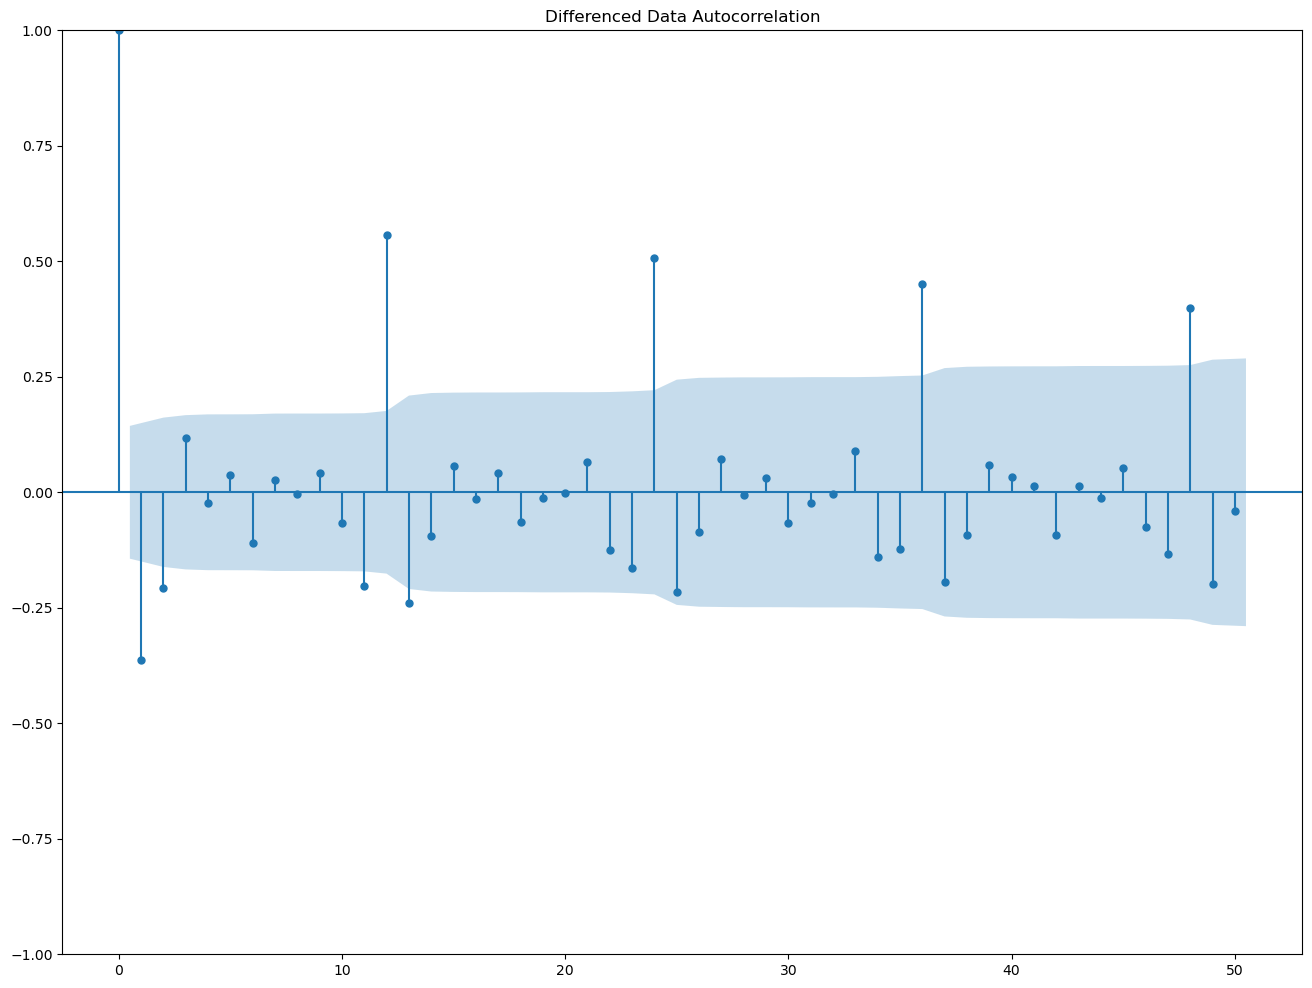

In [389]:
plot_acf(df_Rose1['Rose'],lags=50,title=' Autocorrelation')
plot_acf(df_Rose1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## From the above ACF plot,we can see that there is no significant correlation in the differenced time series after lag 2.Therefore q=2.

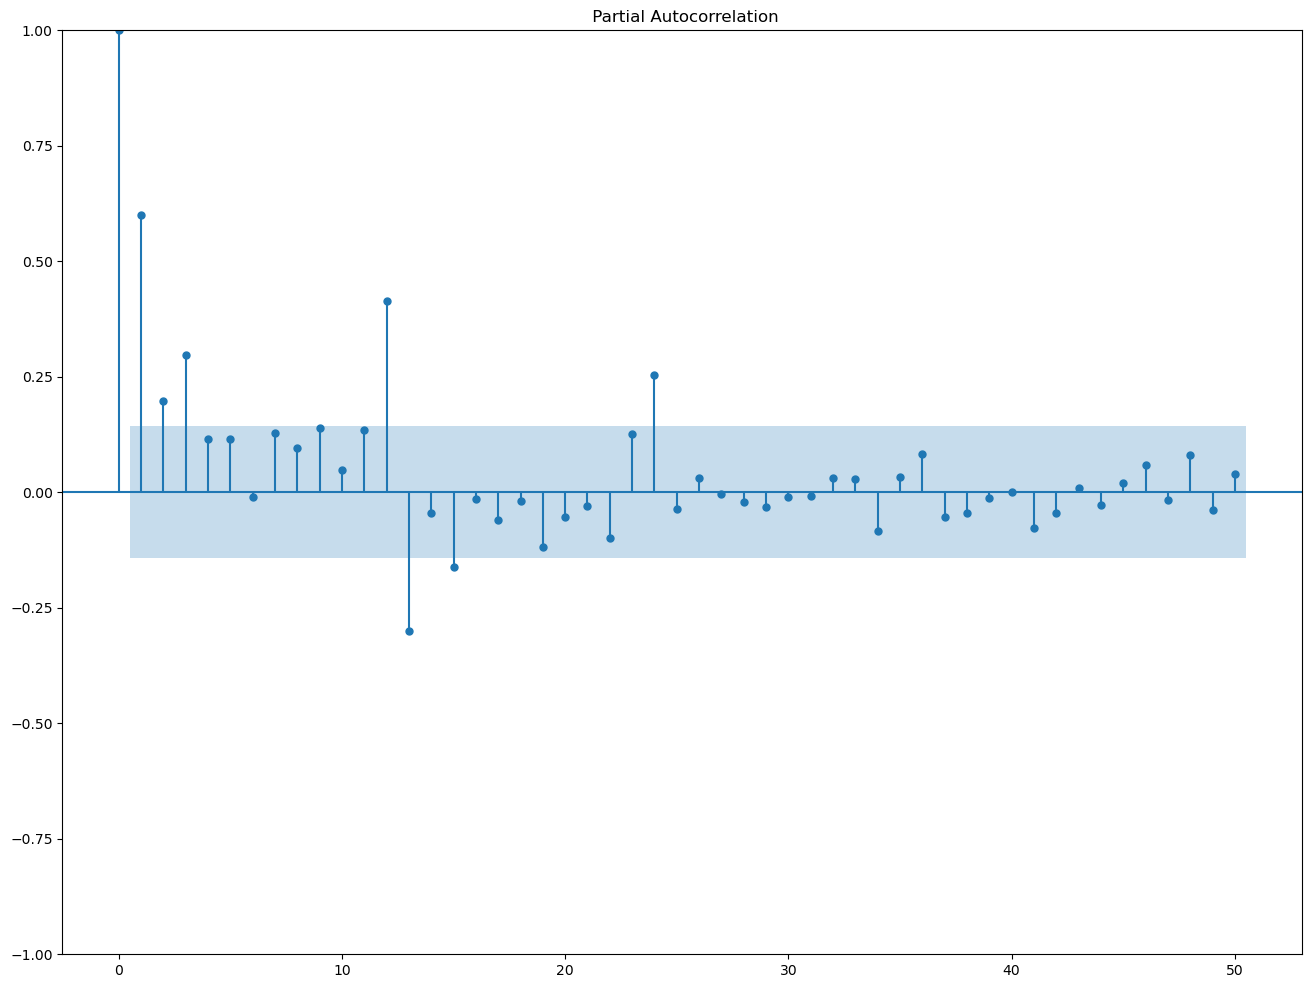

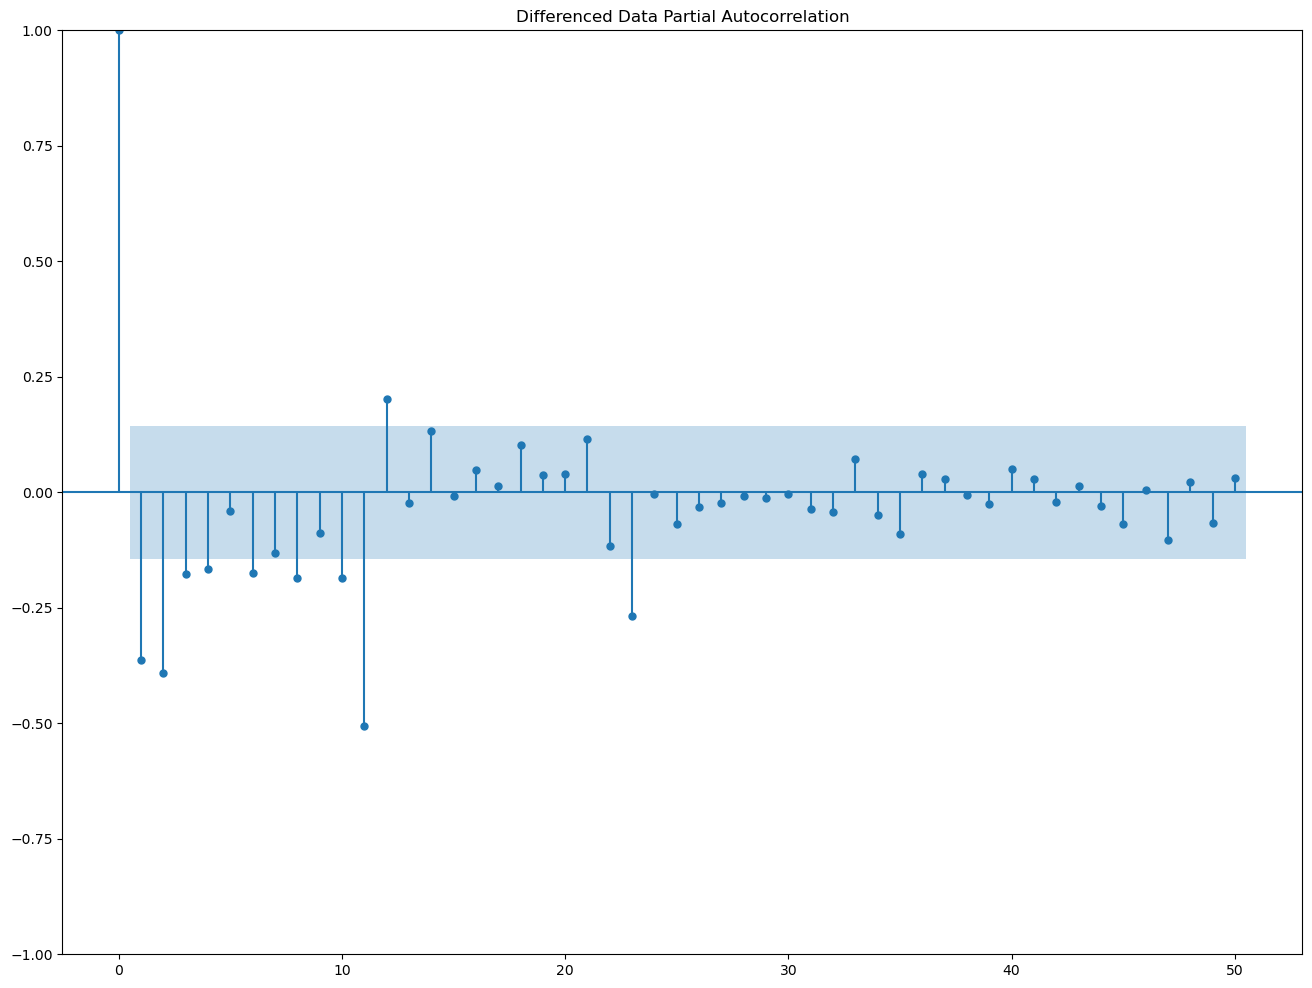

In [390]:
plot_pacf(df_Rose1['Rose'],lags=50,title=' Partial Autocorrelation')
plot_pacf(df_Rose1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show();

## From the above PACF plot,we can see that there is no significant correlation in the differenced time series after lag 3.Therefore p=3.

## ARIMA Model

## Auto ARIMA

In [391]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)


In [392]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [393]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    result = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    ARIMA_AIC = pd.concat([ARIMA_AIC, result], ignore_index=True)


ARIMA(0, 1, 0) - AIC:1449.8349560606734
ARIMA(0, 1, 1) - AIC:1392.0214215455412
ARIMA(0, 1, 2) - AIC:1389.3807941181285
ARIMA(1, 1, 0) - AIC:1432.477510107005
ARIMA(1, 1, 1) - AIC:1390.3696939218062

C:\Users\Abubacker Siddhique\AppData\Local\Temp\ipykernel_18916\3768715884.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ARIMA_AIC = pd.concat([ARIMA_AIC, result], ignore_index=True)



ARIMA(1, 1, 2) - AIC:1389.0724042533102
ARIMA(2, 1, 0) - AIC:1411.0057252750594
ARIMA(2, 1, 1) - AIC:1390.9690788442617
ARIMA(2, 1, 2) - AIC:1391.0621731233878
ARIMA(3, 1, 0) - AIC:1409.3876106696816
ARIMA(3, 1, 1) - AIC:1391.8842211961728
ARIMA(3, 1, 2) - AIC:1392.9526800317617


C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [394]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5   (1, 1, 2)  1389.072404
2   (0, 1, 2)  1389.380794
4   (1, 1, 1)  1390.369694
7   (2, 1, 1)  1390.969079
8   (2, 1, 2)  1391.062173
10  (3, 1, 1)  1391.884221
1   (0, 1, 1)  1392.021422
11  (3, 1, 2)  1392.952680
9   (3, 1, 0)  1409.387611
6   (2, 1, 0)  1411.005725
3   (1, 1, 0)  1432.477510
0   (0, 1, 0)  1449.834956

In [395]:
Auto_ARIMA = ARIMA(train_rose['Rose'].values, order=(1,1,2))

results_auto_ARIMA = Auto_ARIMA .fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -690.536
Date:                Fri, 31 May 2024   AIC                           1389.072
Time:                        21:15:50   BIC                           1400.924
Sample:                             0   HQIC                          1393.888
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4739      0.244     -1.942      0.052      -0.952       0.004
ma.L1         -0.2368      0.224     -1.057      0.290      -0.676       0.202
ma.L2         -0.6124      0.185     -3.318      0.0

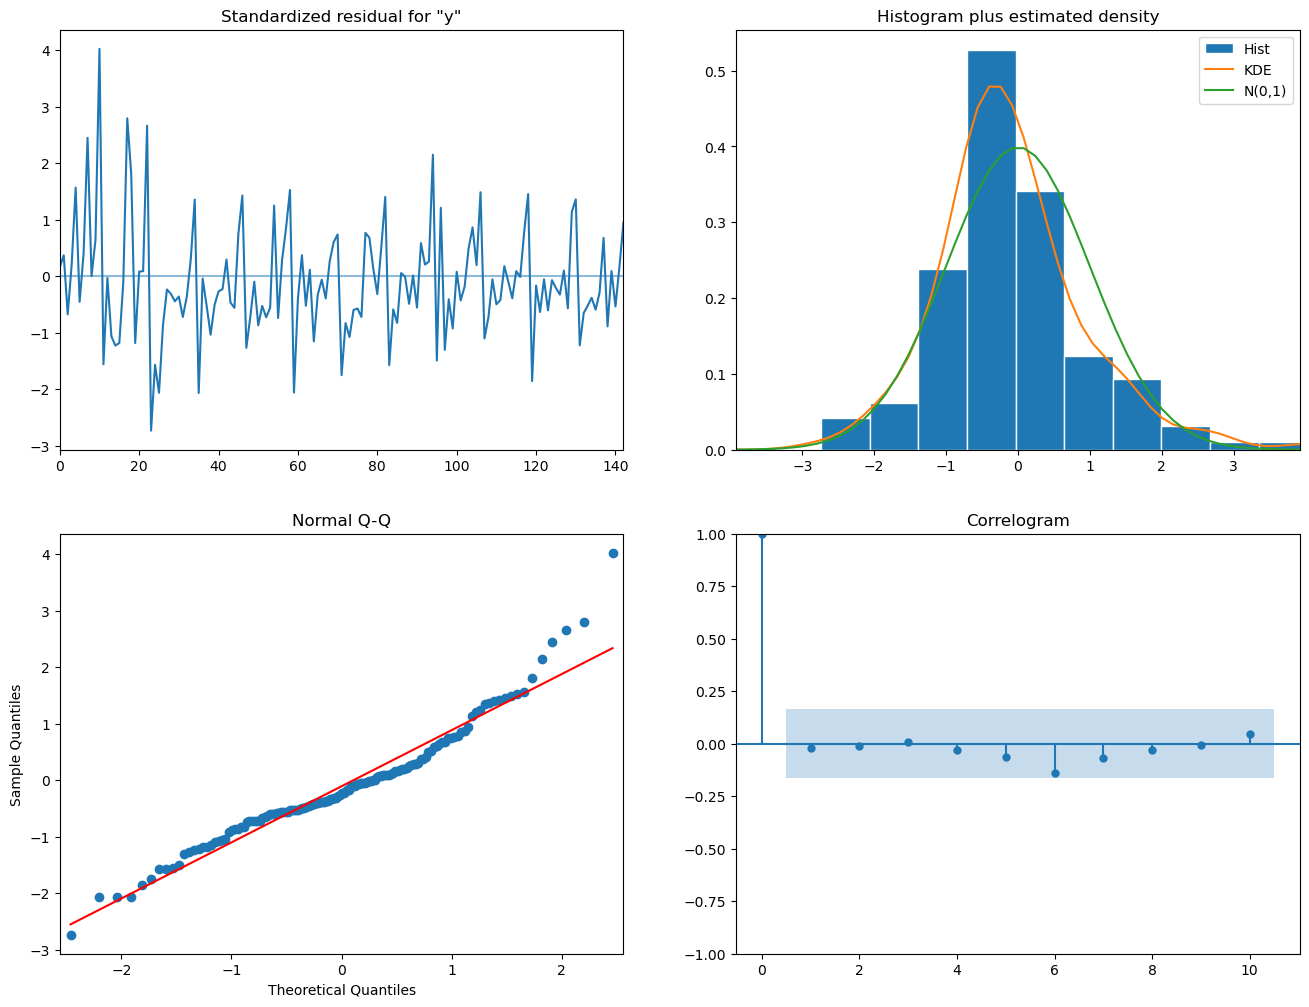

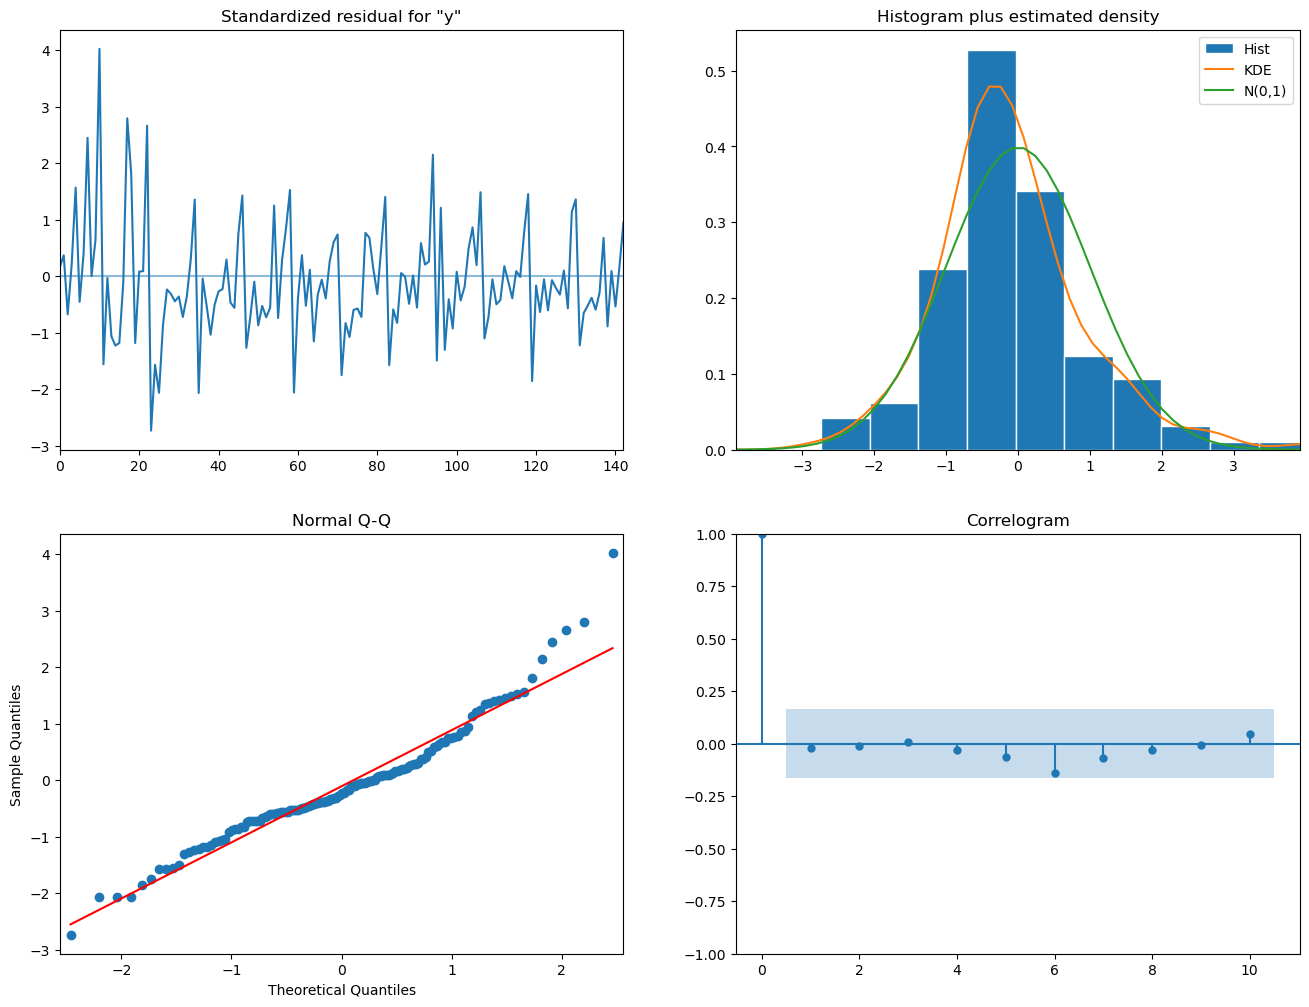

In [396]:
results_auto_ARIMA.plot_diagnostics()

In [397]:
predicted_Auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose))

In [398]:
RMSE_Auto_ARIMA=metrics.root_mean_squared_error(test_rose['Rose'],predicted_Auto_ARIMA)
print(RMSE_Auto_ARIMA)

30.634776377528798


In [399]:
resultsDf_7=pd.DataFrame({'Test RMSE':[RMSE_Auto_ARIMA]},index=['Auto_ARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   14.920524
Simple Average Model                                53.979005
2pointTrailingMovingAverage                         10.477689
4pointTrailingMovingAverage                         13.009639
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =0.099 Simple Exponential Smoothing           30.089953
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768
Auto_ARIMA                                          30.634776

##  Manual ARIMA

In [400]:
Manual_ARIMA = ARIMA(train_rose['Rose'], order=(3,1,2),freq=train_rose.index.inferred_freq)

results_Manual_ARIMA = Manual_ARIMA.fit()

print(results_Manual_ARIMA.summary())

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  144
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -690.476
Date:                Fri, 31 May 2024   AIC                           1392.953
Time:                        21:15:52   BIC                           1410.730
Sample:                    01-01-1980   HQIC                          1400.176
                         - 12-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4241      0.459     -0.924      0.356      -1.324       0.476
ar.L2         -0.0029      0.147     -0.020      0.984      -0.292       0.286
ar.L3          0.0340      0.105      0.325      0.7

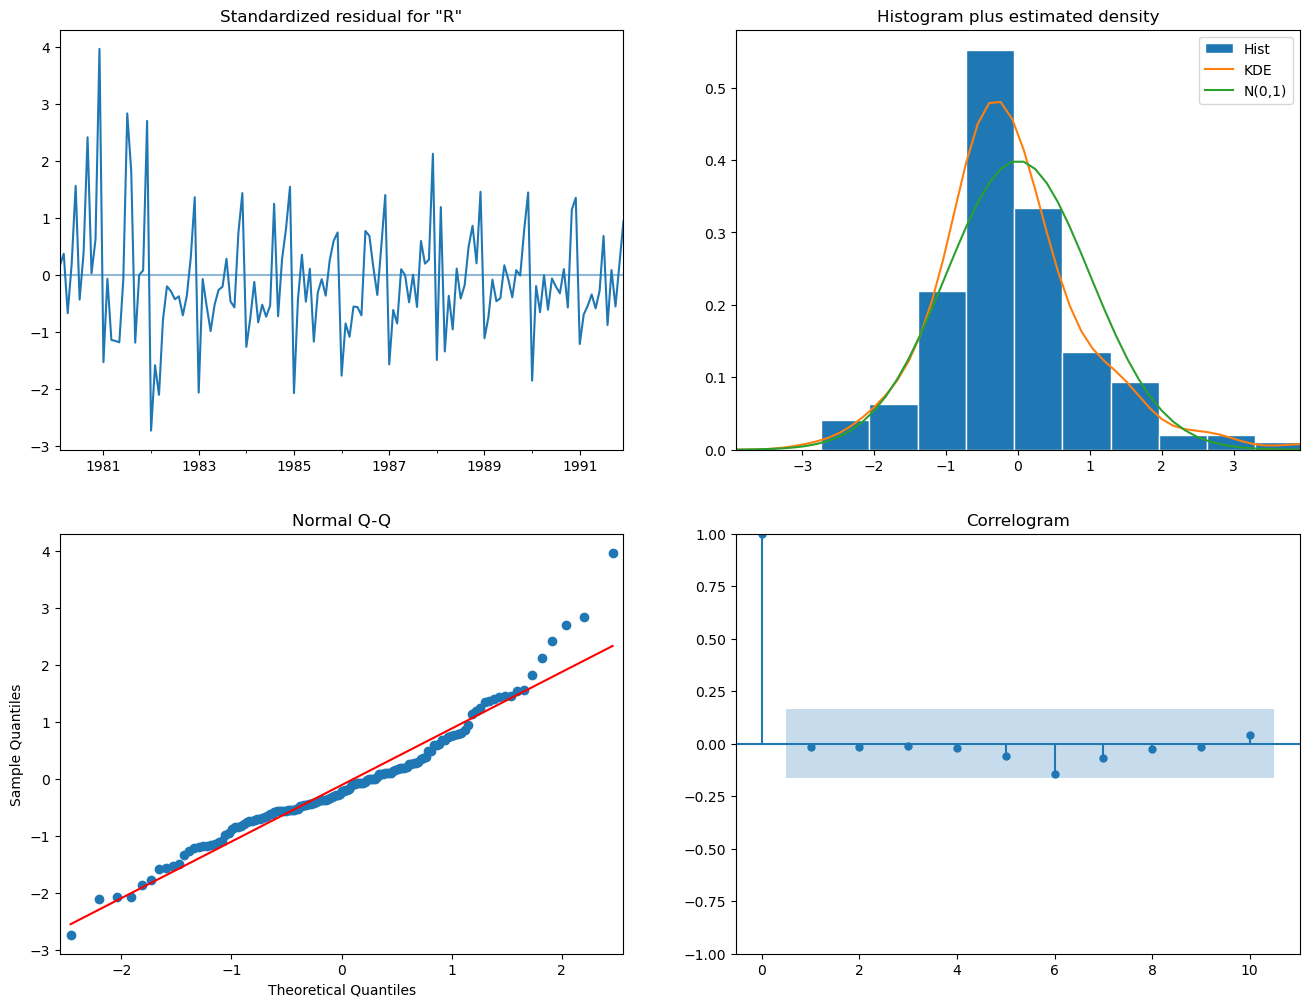

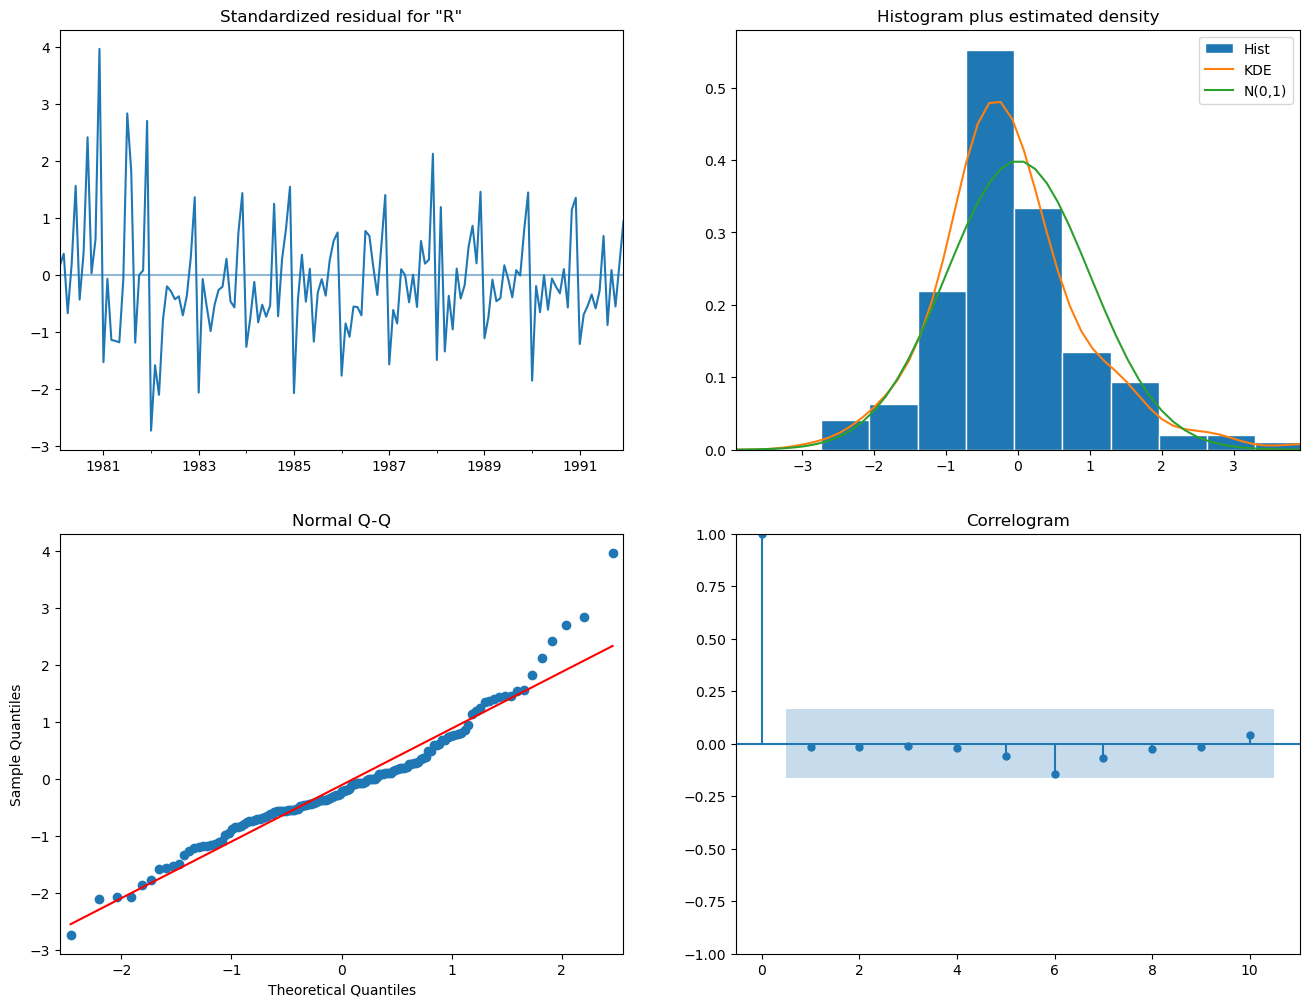

In [401]:
results_Manual_ARIMA.plot_diagnostics()

In [402]:
predicted_Manual_ARIMA = results_Manual_ARIMA.forecast(steps=len(test_rose))

In [403]:
RMSE_Manual_ARIMA=metrics.root_mean_squared_error(test_rose['Rose'],predicted_Manual_ARIMA)
print(RMSE_Manual_ARIMA)

30.752779722801396


In [404]:
resultsDf_8=pd.DataFrame({'Test RMSE':[RMSE_Manual_ARIMA]},index=['Manual_ARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   14.920524
Simple Average Model                                53.979005
2pointTrailingMovingAverage                         10.477689
4pointTrailingMovingAverage                         13.009639
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =0.099 Simple Exponential Smoothing           30.089953
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768
Auto_ARIMA                                          30.634776
Manual_ARIMA                                        30.752780

# Auto SARIMA

### From the ACF plot,it is clear that for every 12 months there is a significant change.Therefore seasonality =12

### To find the D for SARIMA Model

In [405]:
First_diff = df_Rose1['Rose'].diff().dropna()
Seasonal_diff = First_diff - First_diff.shift(12)

In [406]:
seasonal_df=adfuller(Seasonal_diff.dropna())
print('DF test statistic is %3.3f' %seasonal_df[0])
print('DF test p-value is %1.4f' %seasonal_df[1])      
      

DF test statistic is -4.605
DF test p-value is 0.0001


### Since p value is less than 0.05 after first order seasonal differencing,we are proceeding with D=1

In [407]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)


In [408]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [409]:


for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_auto = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model_auto.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],
                                                             'seasonal': [param_seasonal],
                                                             'AIC': [results_SARIMA.aic]})],
                                   ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1440.6822601332783
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1255.749031733397


C:\Users\Abubacker Siddhique\AppData\Local\Temp\ipykernel_18916\2665105092.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1083.3821025232285
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1281.4433845203862
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1067.2154579209405
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:947.2655545937292
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1247.071302397068
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1222.4232978424639
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1072.6435897908202
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1085.1322698045492
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1077.8059352251978
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:949.1253369447005
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1062.985965014912
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1064.9856379721869
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1057.466826001184


C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:960.5759214590922
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:954.1163900783207
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:943.8655393087836
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:952.1450324553001
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:952.3519626824827
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:951.8848842596989
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:853.6594123677189
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:849.1133263425525
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:850.3394577837685
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1373.3154406067088
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1202.4049894836699
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1020.4529778073734
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1218.2622961555066
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1012.1908575075541
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:887.0471972561317
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1196.8457117783219
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1152.7530478983258
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1016.4056460061307
SARIMA(0, 1, 1)x(1, 

In [410]:
SARIMA_AIC.sort_values(by='AIC',ascending=True)

param       seasonal          AIC
262  (3, 1, 1)  (3, 1, 1, 12)   778.555044
286  (3, 1, 2)  (3, 1, 1, 12)   779.147418
263  (3, 1, 1)  (3, 1, 2, 12)   779.448586
287  (3, 1, 2)  (3, 1, 2, 12)   780.189164
190  (2, 1, 1)  (3, 1, 1, 12)   784.670223
..         ...            ...          ...
24   (0, 1, 1)  (0, 0, 0, 12)  1373.315441
216  (3, 1, 0)  (0, 0, 0, 12)  1381.817920
144  (2, 1, 0)  (0, 0, 0, 12)  1392.720452
72   (1, 1, 0)  (0, 0, 0, 12)  1423.324811
0    (0, 1, 0)  (0, 0, 0, 12)  1440.682260

[288 rows x 3 columns]

In [411]:
SARIMA_model_auto1 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = SARIMA_model_auto1.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -380.278
Date:                            Fri, 31 May 2024   AIC                            778.555
Time:                                    21:24:57   BIC                            801.251
Sample:                                         0   HQIC                           787.715
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0355      0.138      0.257      0.797      -0.235       0.306
ar.L2         -0.0303      0.131   

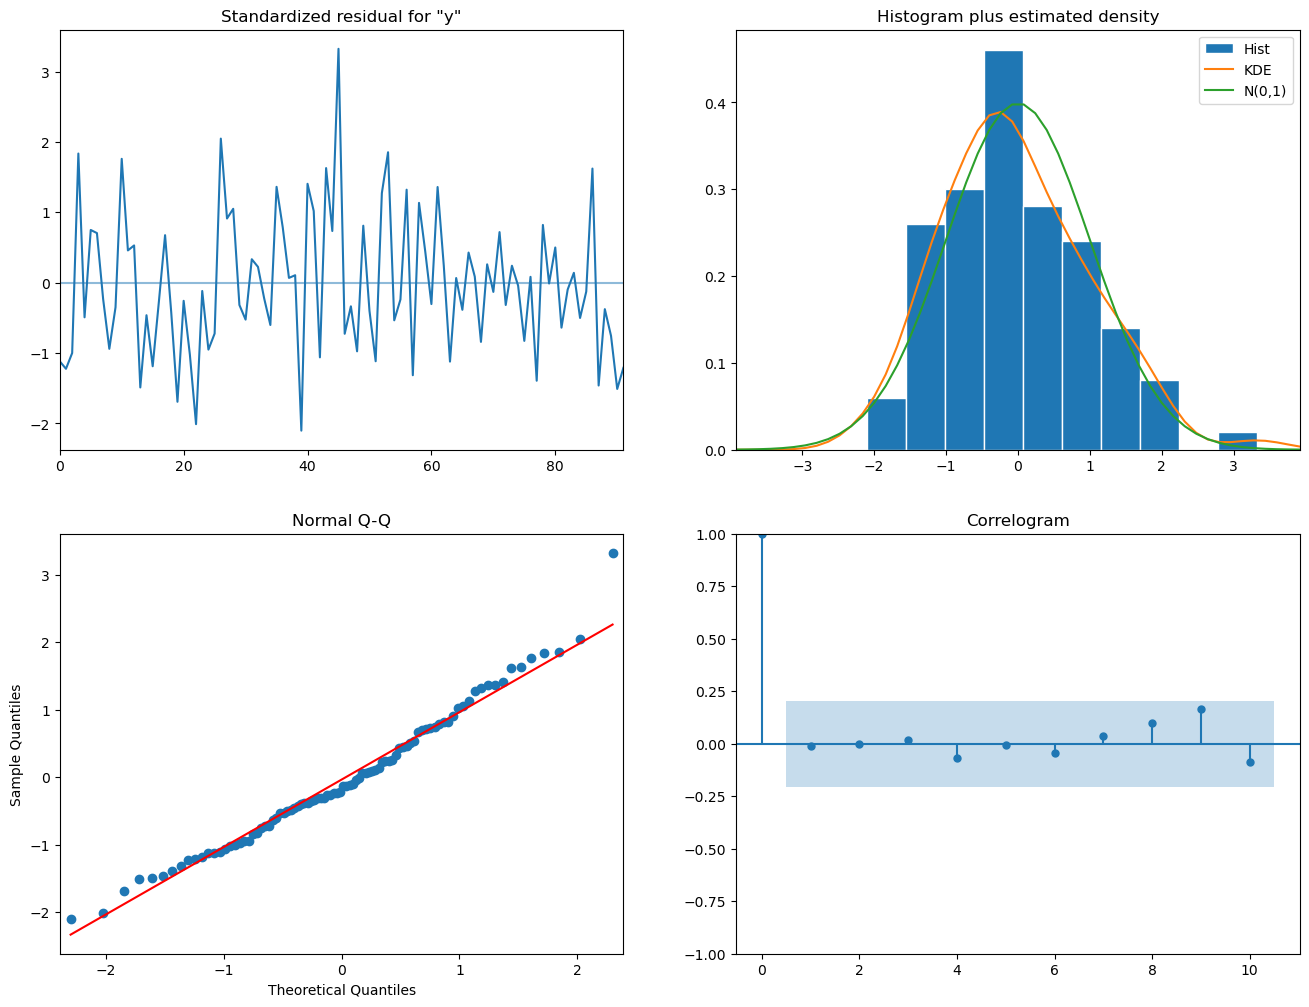

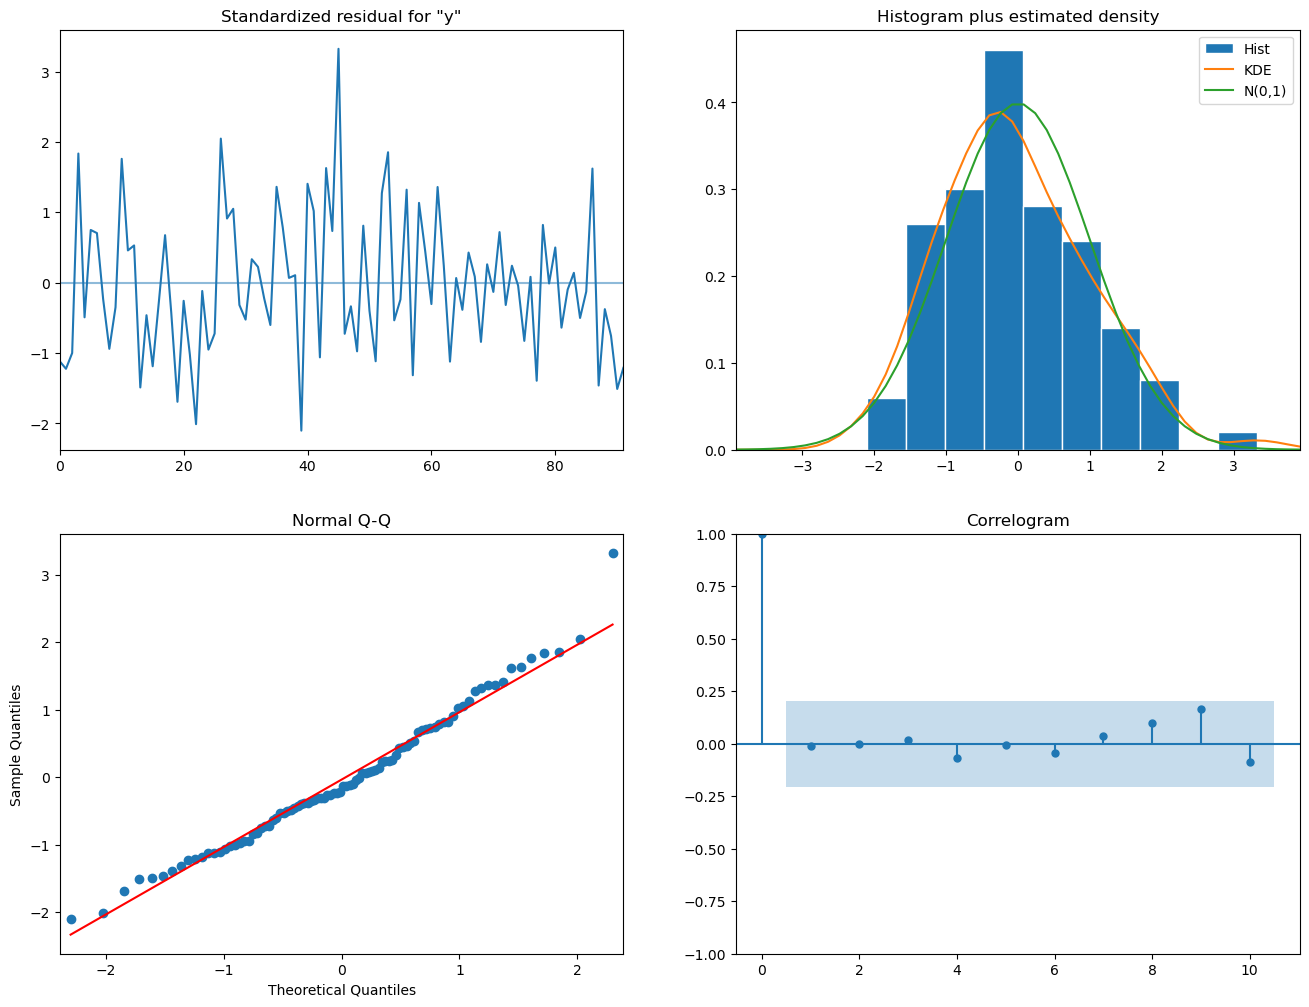

In [412]:
results_auto_SARIMA.plot_diagnostics()

In [413]:
predicted_Auto_SARIMA = results_auto_SARIMA.forecast(steps=len(test_rose))
RMSE_Auto_SARIMA=metrics.root_mean_squared_error(test_rose['Rose'],predicted_Auto_SARIMA)
print(RMSE_Auto_SARIMA)

11.891193433921021


In [414]:
resultsDf_10=pd.DataFrame({'Test RMSE':[RMSE_Auto_SARIMA]},index=['Auto_SARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_10])
resultsDf

Test RMSE
Linear Regression                                   14.920524
Simple Average Model                                53.979005
2pointTrailingMovingAverage                         10.477689
4pointTrailingMovingAverage                         13.009639
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =0.099 Simple Exponential Smoothing           30.089953
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768
Auto_ARIMA                                          30.634776
Manual_ARIMA                                        30.752780
Auto_SARIMA                                         11.891193

## Manual SARIMA

### Finding optimal P,Q values from PACF & ACF Plots

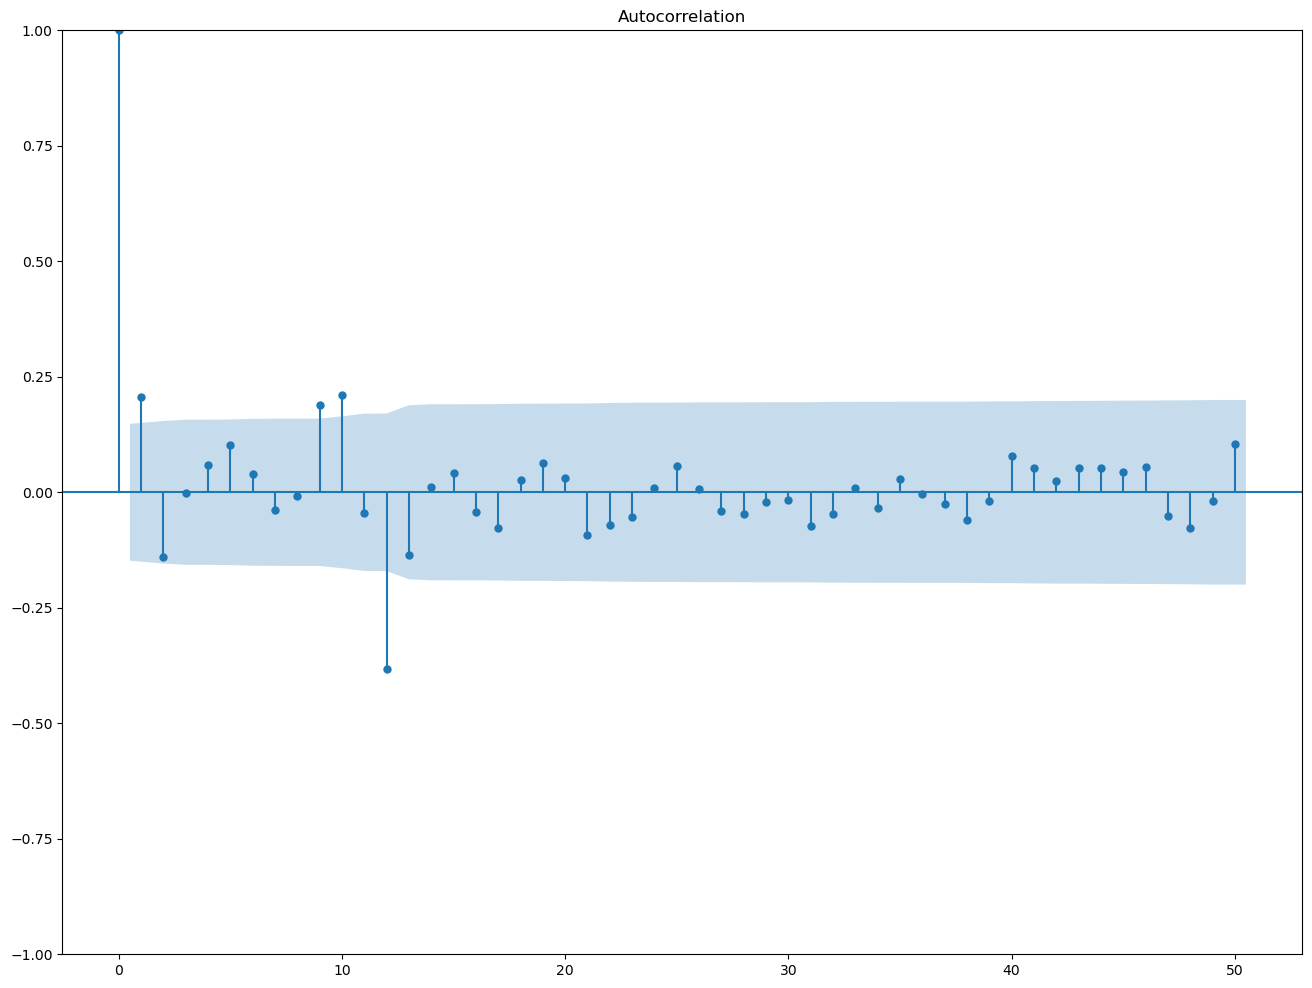

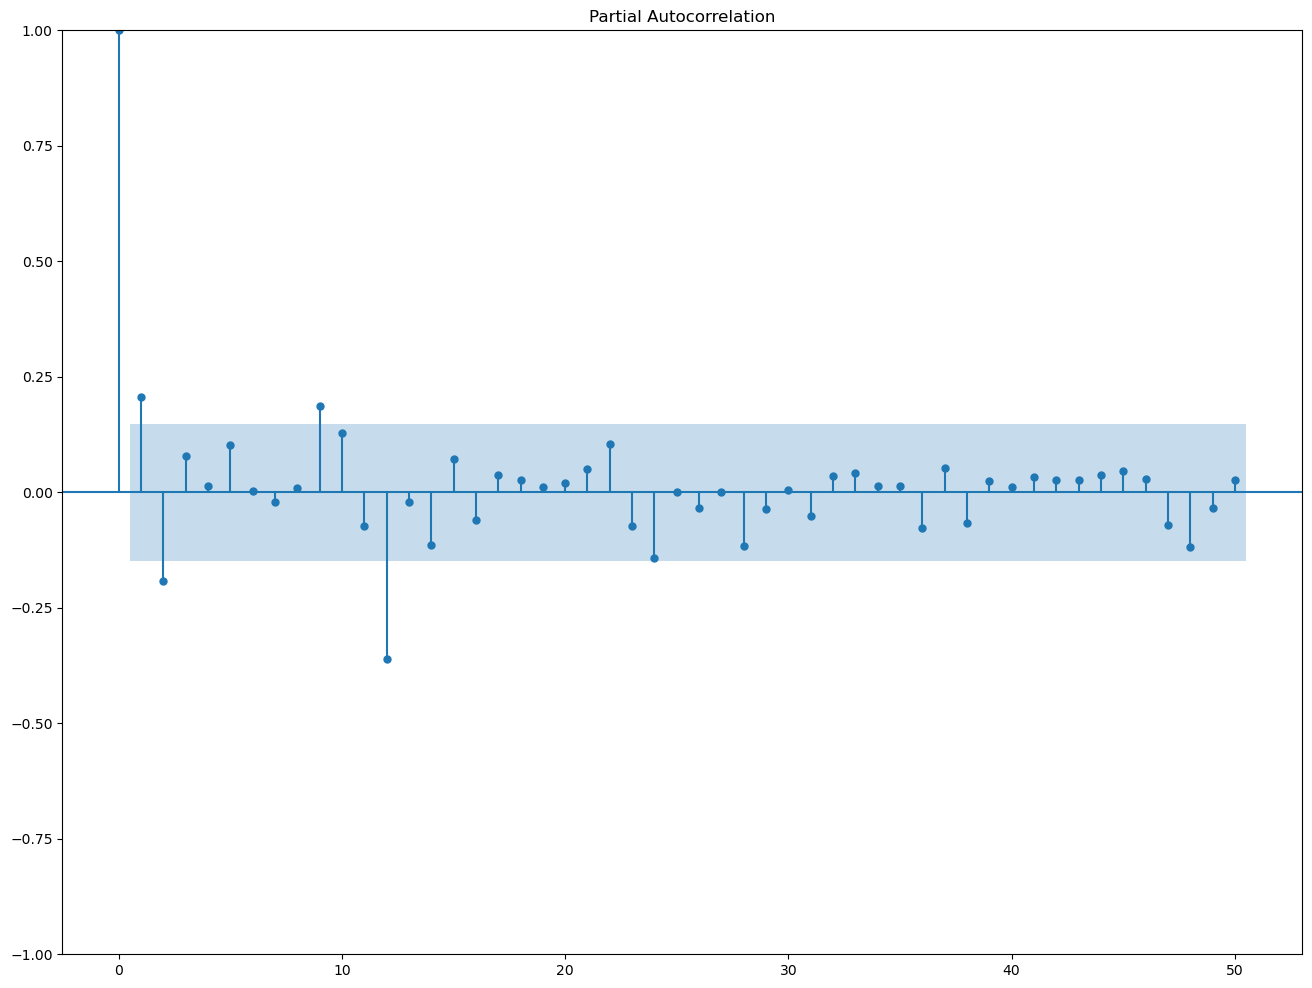

In [415]:
plot_acf((df_Rose1['Rose'].diff(12).dropna()),lags=50)
plot_pacf((df_Rose1['Rose'].diff(12).dropna()),lags=50);

### From the plot there is no significant correlation after Q=1,P=2

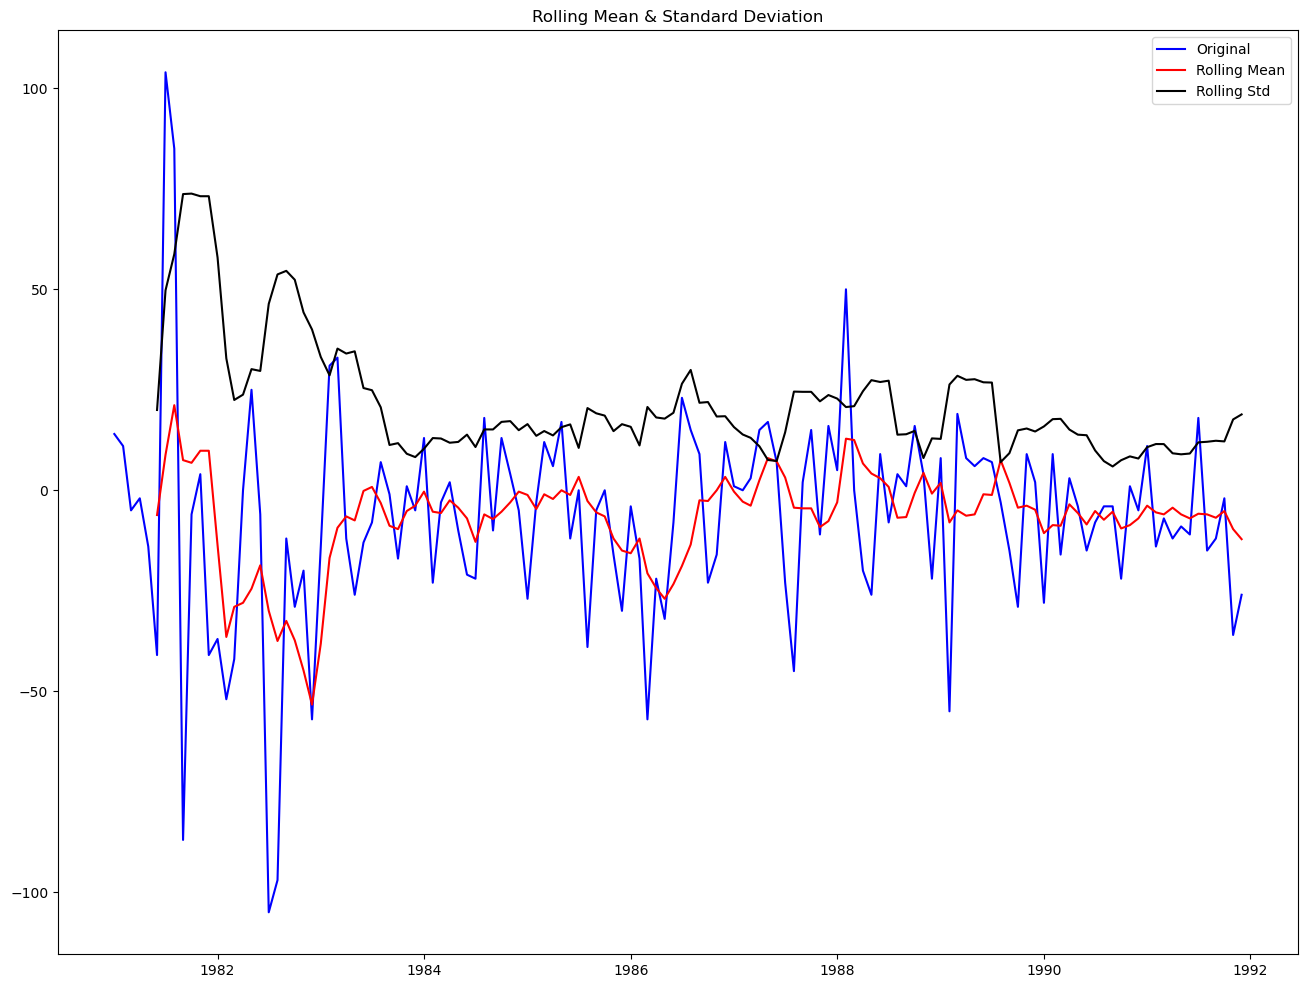

Results of Dickey-Fuller Test:
Test Statistic                  -3.813895
p-value                          0.002768
#Lags Used                      11.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [416]:
test_stationarity((train_rose['Rose'].diff(12).dropna()))

### D=1

In [417]:
SARIMA_model_Manual = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(3,1,2),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_Manual_SARIMA = SARIMA_model_Manual.fit(maxiter=1000)
print(results_Manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -427.696
Date:                              Fri, 31 May 2024   AIC                            873.392
Time:                                      21:25:07   BIC                            897.192
Sample:                                           0   HQIC                           883.034
                                              - 144                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5912      0.446      1.325      0.185      -0.283       1.466
ar.L2         -0.07

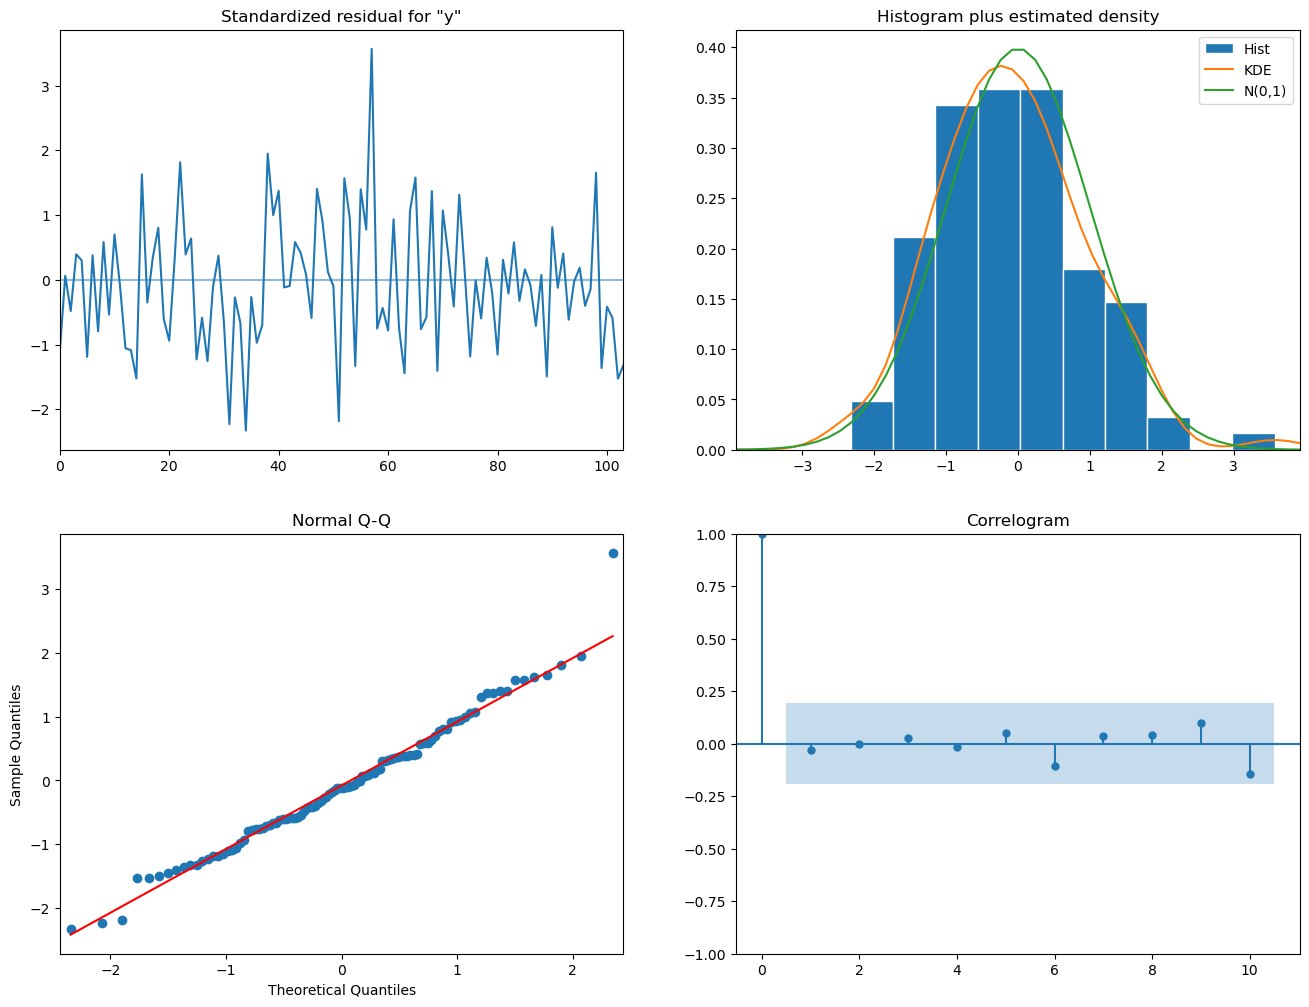

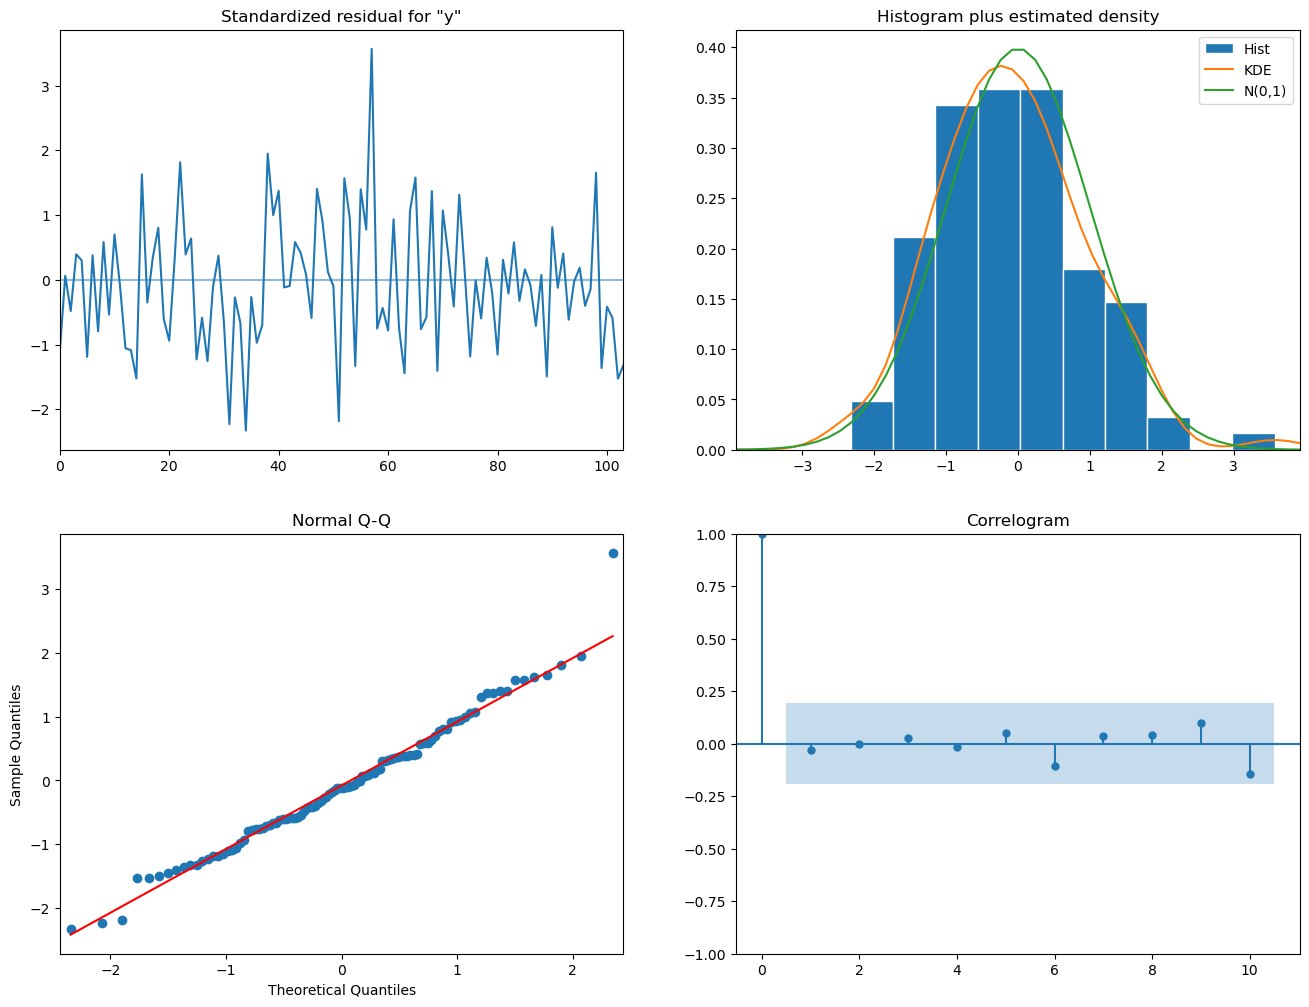

In [418]:
results_Manual_SARIMA.plot_diagnostics()

In [419]:
predicted_Manual_SARIMA = results_Manual_SARIMA.forecast(steps=len(test_rose))
RMSE_Manual_SARIMA=metrics.root_mean_squared_error(test_rose['Rose'],predicted_Manual_SARIMA)
print(RMSE_Manual_SARIMA)

10.083369637577743


In [420]:
resultsDf_11=pd.DataFrame({'Test RMSE':[RMSE_Manual_SARIMA]},index=['Manual_SARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_11])
resultsDf

Test RMSE
Linear Regression                                   14.920524
Simple Average Model                                53.979005
2pointTrailingMovingAverage                         10.477689
4pointTrailingMovingAverage                         13.009639
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =0.099 Simple Exponential Smoothing           30.089953
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768
Auto_ARIMA                                          30.634776
Manual_ARIMA                                        30.752780
Auto_SARIMA                                         11.891193
Manual_SARIMA                                       10.083370

In [421]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

Test RMSE
Alpha =0.09,Beta = 0.0003 and Gamma = 1.09e-06 ...   8.452768
Manual_SARIMA                                       10.083370
2pointTrailingMovingAverage                         10.477689
Auto_SARIMA                                         11.891193
4pointTrailingMovingAverage                         13.009639
Alpha =0.088,Beta = 3.79e-07 and Gamma = 3.66e-...  13.088792
6pointTrailingMovingAverage                         13.179114
8pointTrailingMovingAverage                         13.722744
10pointTrailingMovingAverage                        13.856958
Alpha =1.49e-08 and Beta = 3.59e-09                 14.920522
Linear Regression                                   14.920524
Alpha =0.099 Simple Exponential Smoothing           30.089953
Auto_ARIMA                                          30.634776
Manual_ARIMA                                        30.752780
Simple Average Model                                53.979005

## Among the various model,the triple exponential smoothening with multiplicative seasonality has the least RMSE

## Building model on the whole dataset

In [422]:
fullmodel= ExponentialSmoothing(df_Rose1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.099584045122691211,
                                                                 smoothing_trend=0.00032437894139750585,
                                                                 smoothing_seasonal=1.0941135737395778e-06)


C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [423]:
print(fullmodel.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          48488.030
Optimized:                         True   AIC                           1071.339
Trend:                         Additive   BIC                           1123.037
Seasonal:                Multiplicative   AICC                          1075.411
Seasonal Periods:                    12   Date:                 Fri, 31 May 2024
Box-Cox:                          False   Time:                         21:25:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0995840                alpha                False
smoothing_trend          

In [424]:
fullmodel_prediction_= fullmodel.forecast(steps=12)

In [425]:
RMSE_fullmodel = metrics.root_mean_squared_error(df_Rose1['Rose'],fullmodel.fittedvalues)

print('RMSE:',RMSE_fullmodel)

RMSE: 16.102617122483803


In [426]:
pred_df = pd.DataFrame({'lower_CI':fullmodel_prediction_ - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':fullmodel_prediction_,
                          'upper_ci': fullmodel_prediction_ + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_df.head()

lower_CI  prediction   upper_ci
1995-08-01  15.467826   47.113637  78.759448
1995-09-01  12.284619   43.930430  75.576241
1995-10-01  11.161267   42.807078  74.452889
1995-11-01  17.372446   49.018257  80.664068
1995-12-01  34.987706   66.633517  98.279328

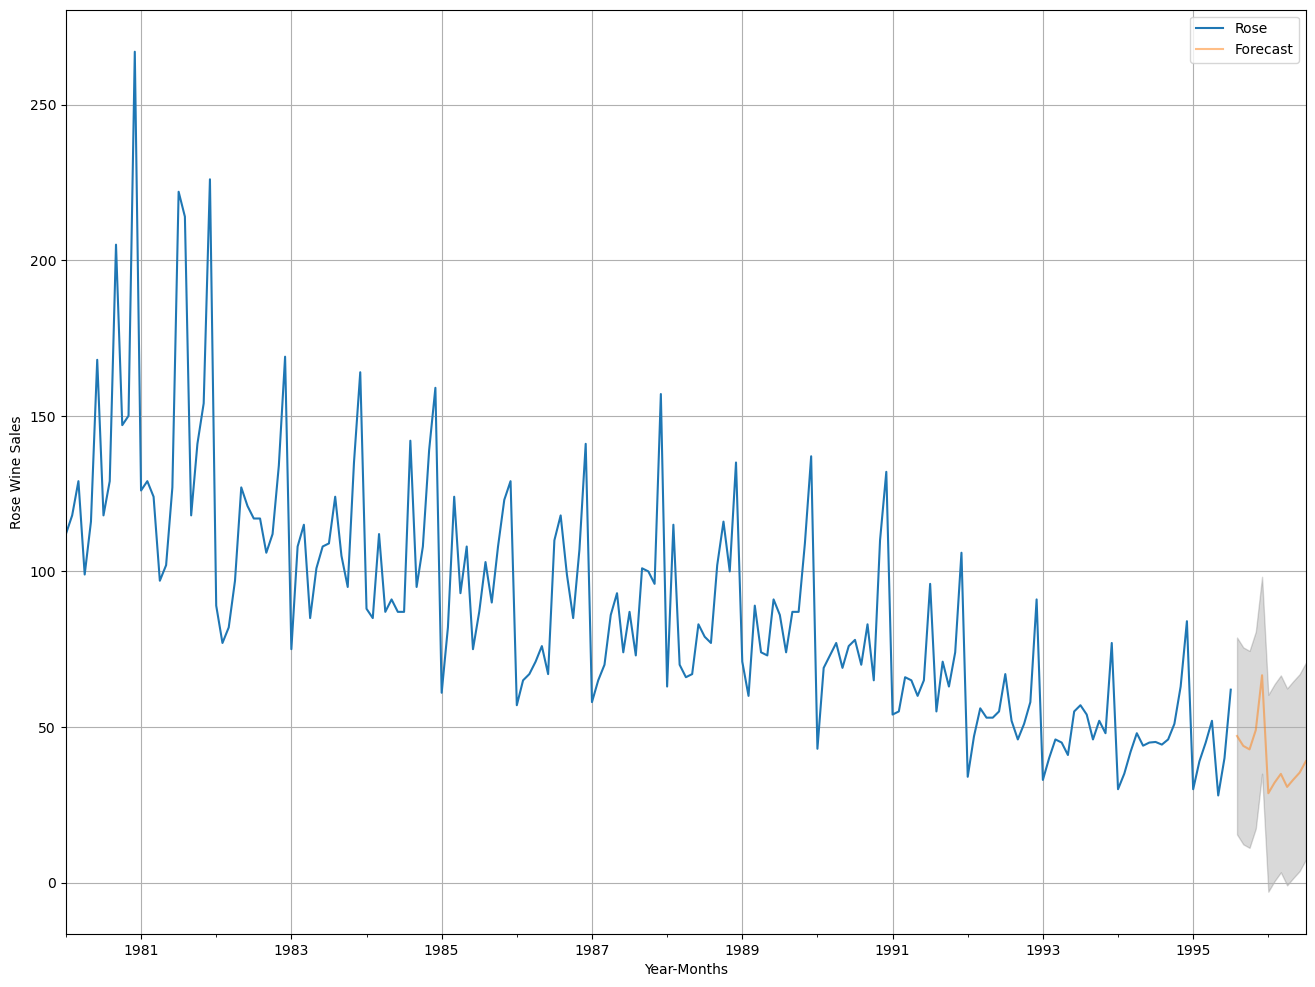

In [427]:
axis = df_Rose1.plot(label='Actual',figsize=(16,12))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.grid()
plt.show()